In [14]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import poisson,norm

In [4]:
df_biketrips = pd.read_csv('biketrips2011.csv')
df_biketrips['StartTime'] = df_biketrips['StartTime'].astype('datetime64')
df_biketrips['EndTime'] = df_biketrips['EndTime'].astype('datetime64')
df_biketrips['StartNum'] = df_biketrips['StartNum'].astype(int)
df_biketrips['EndNum'] = df_biketrips['EndNum'].astype(int)

In [5]:
list_holidays = pd.read_csv('days_holidays.csv')['datetime'].values.tolist()
list_workdays = pd.read_csv('days_workingdays.csv')['datetime'].values.tolist()

In [6]:
# new features - to help group by hour
df_dhcombo_out = pd.DataFrame({
    'Day': df_biketrips['StartTime'].dt.date,
    'Hour': df_biketrips['StartTime'].dt.hour,
})

df_dhcombo_in = pd.DataFrame({
    'Day': df_biketrips['EndTime'].dt.date,
    'Hour': df_biketrips['EndTime'].dt.hour,
})

df_biketrips['StartHour'] = pd.to_datetime(df_dhcombo_out.Day) + pd.to_timedelta(df_dhcombo_out.Hour, unit='h')
df_biketrips['EndHour'] = pd.to_datetime(df_dhcombo_in.Day) + pd.to_timedelta(df_dhcombo_in.Hour, unit='h')

In [7]:
df_hourly_start = df_biketrips.pivot_table(values='count',index='StartHour',columns='StartNum',aggfunc='sum',fill_value=None)
df_hourly_end = df_biketrips.pivot_table(values='count',index='EndHour',columns='EndNum',aggfunc='sum',fill_value=None)

In [8]:
df_hourly_start['hourofday'] = df_hourly_start.index.hour
df_hourly_start['dayofweek'] = df_hourly_start.index.dayofweek
df_hourly_start['workday'] = df_hourly_start.index.isin(list_workdays)

df_hourly_end['hourofday'] = df_hourly_end.index.hour
df_hourly_end['dayofweek'] = df_hourly_end.index.dayofweek
df_hourly_end['workday'] = df_hourly_end.index.isin(list_workdays)

In [9]:
# take off last 3 columns (added features above)
sites = df_hourly_start.columns[0:len(df_hourly_start.columns)-3]

In [10]:
df_hourly_start['sum_all'] = df_hourly_start[sites].sum(axis=1)
df_hourly_end['sum_all'] = df_hourly_end[sites].sum(axis=1)

#NEW CODE starts here
df_hourly_start['weekofyear'] = df_hourly_start.index.weekofyear
df_hourly_end['weekofyear'] = df_hourly_end.index.weekofyear


In [11]:
sample_sites = [31103,31200]
#sample_sites = [31007,31100,31103,31200,31215]

31103


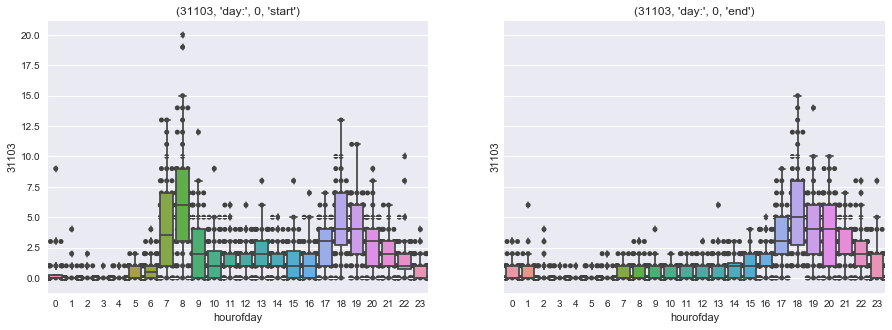

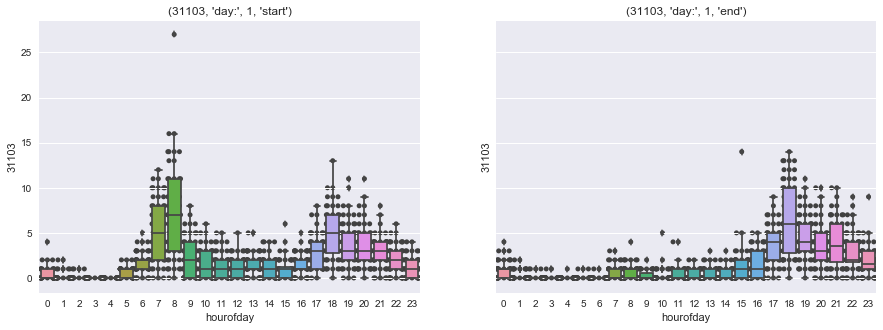

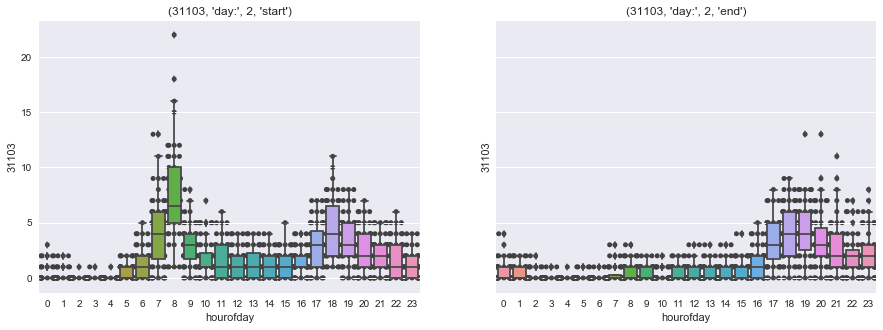

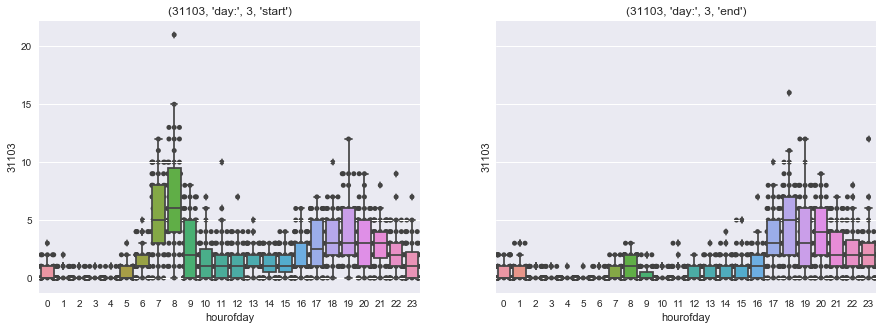

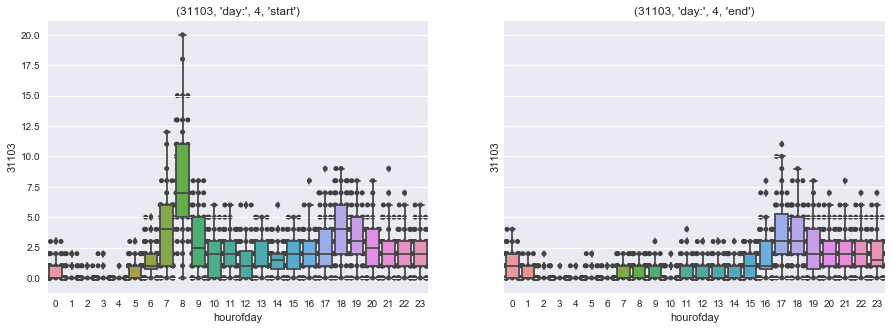

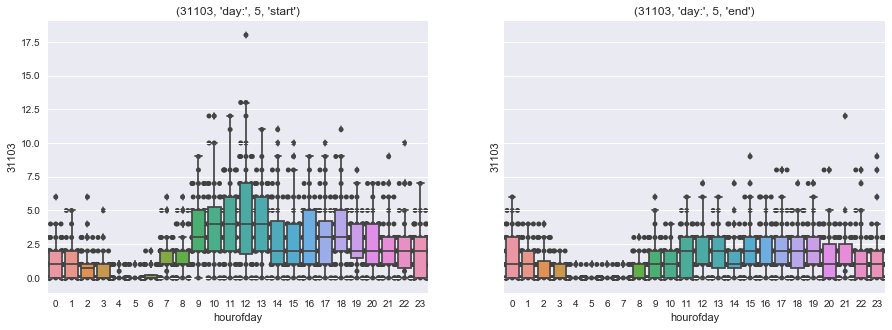

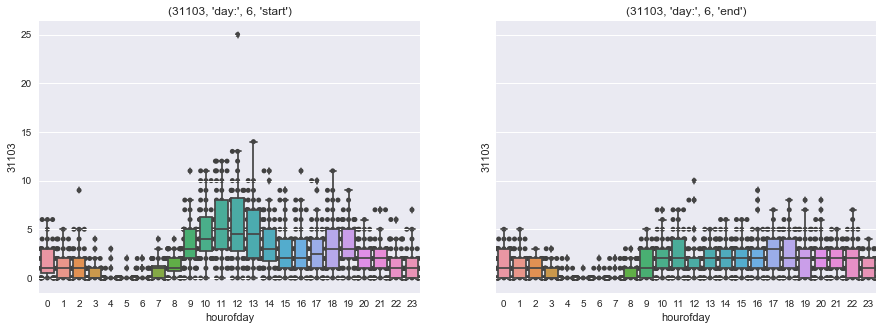

31200


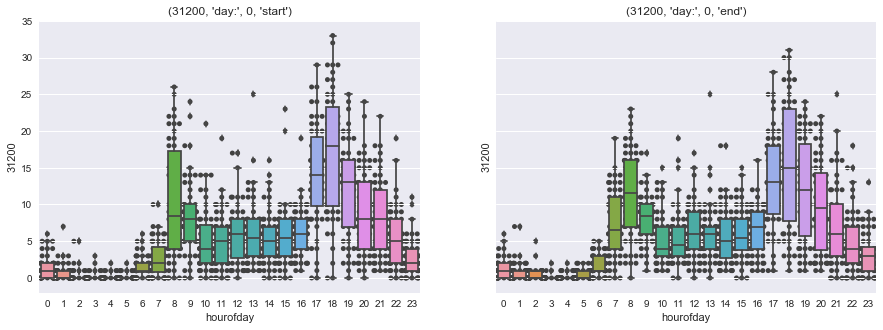

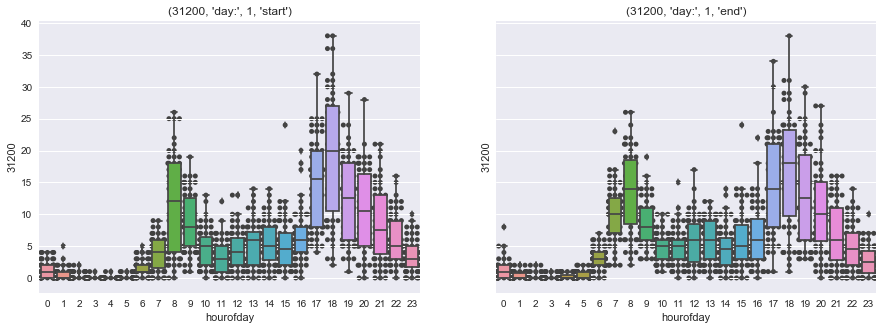

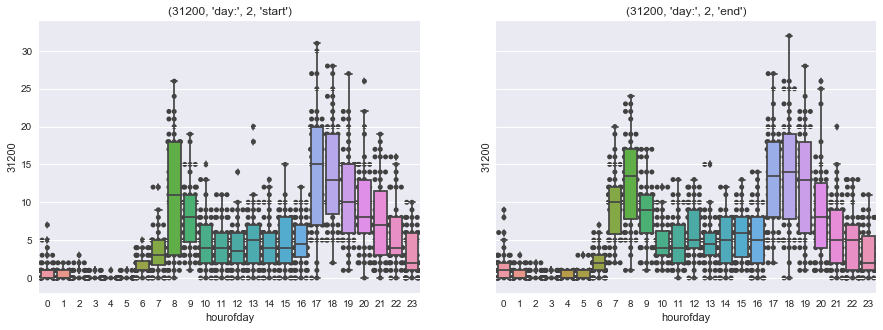

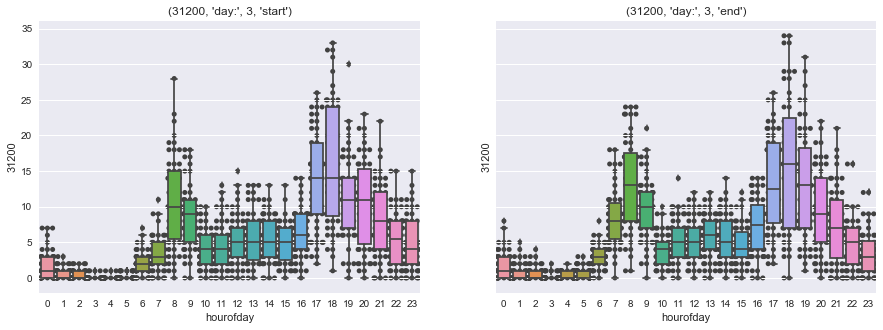

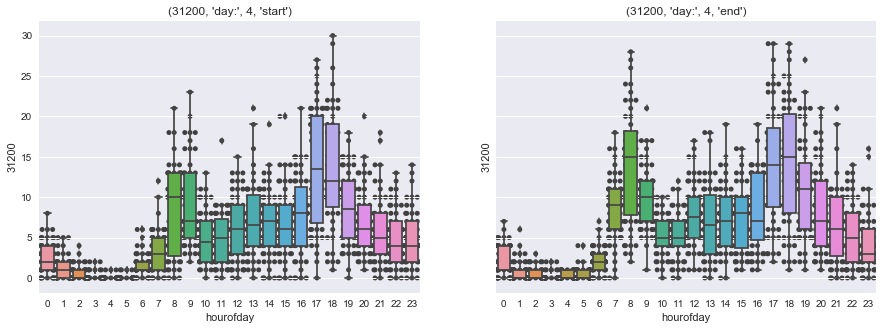

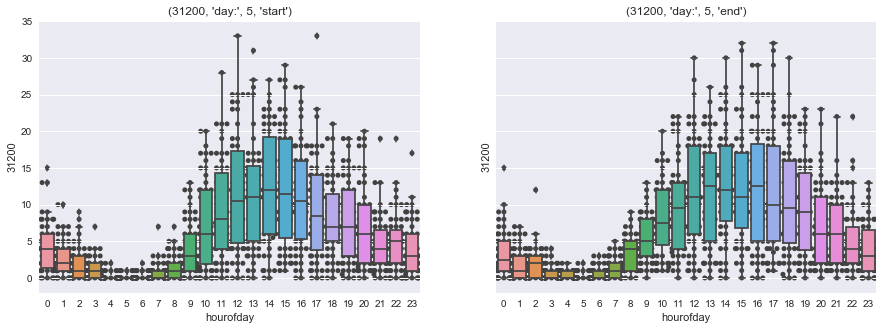

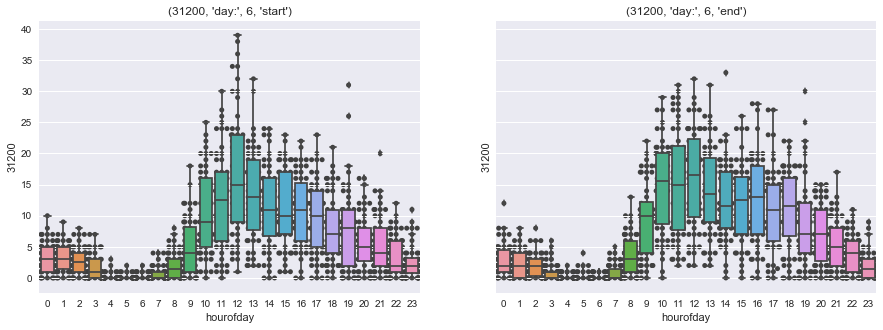

In [10]:
# boxplots per site/day of week
flierprops = dict(marker='o', markerfacecolor='blue', markersize=5,
                  linestyle='none')

for site in sample_sites: 
    group_site_start_day = df_hourly_start[[site,'hourofday','dayofweek','weekofyear']].fillna(0).groupby('dayofweek')
    group_site_end_day = df_hourly_end[[site,'hourofday','dayofweek','weekofyear']].fillna(0).groupby('dayofweek')
    print(site)
    for idx,group in group_site_start_day:
        group_end = group_site_end_day.get_group(idx)
        
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,5))

        df_start_site_day = group.pivot_table(values=site,index=['weekofyear','hourofday'],fill_value=0).reset_index()
        df_end_site_day = group_end.pivot_table(values=site,index=['weekofyear','hourofday'],fill_value=0).reset_index()
        
        sns.swarmplot(x='hourofday',y=site,data=df_start_site_day,color=".25",zorder=0.5,ax=ax1)
        sns.boxplot(x='hourofday',y=site,data=df_start_site_day,ax=ax1)
        ax1.set_title((site,'day:',idx,'start'))
        
        sns.swarmplot(x='hourofday',y=site,data=df_end_site_day,color=".25",zorder=0.5,ax=ax2)
        sns.boxplot(x='hourofday',y=site,data=df_end_site_day,ax=ax2)
        ax2.set_title((site,'day:',idx,'end'))
        plt.show()


31103
start mean: 0.5192307692307693
end mean: 0.5576923076923077


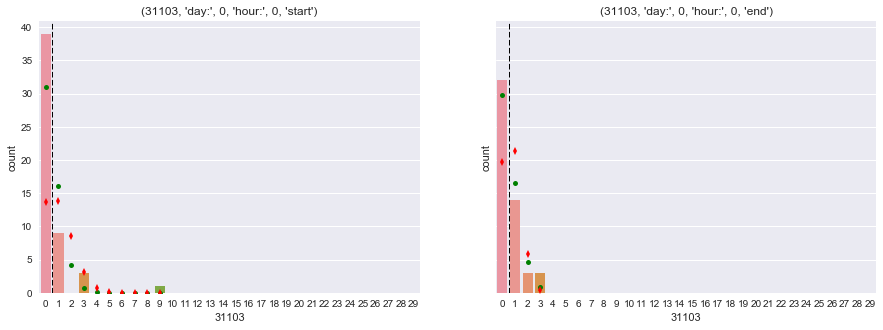

start mean: 0.17307692307692307
end mean: 0.45098039215686275


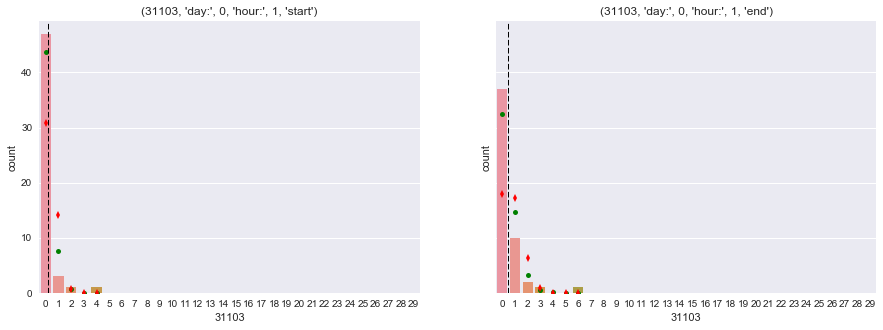

start mean: 0.1276595744680851
end mean: 0.3333333333333333


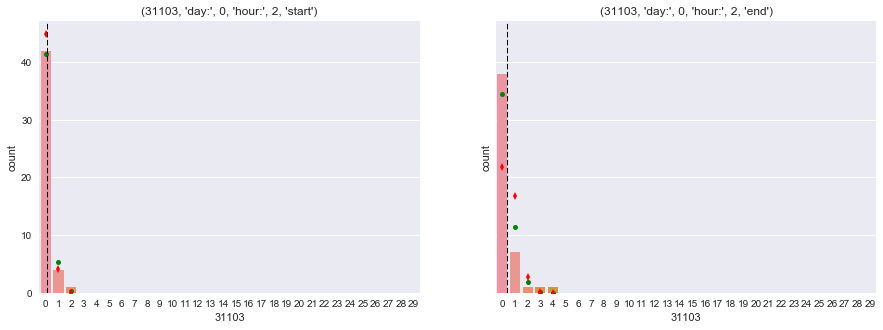

start mean: 0.020833333333333332
end mean: 0.08333333333333333


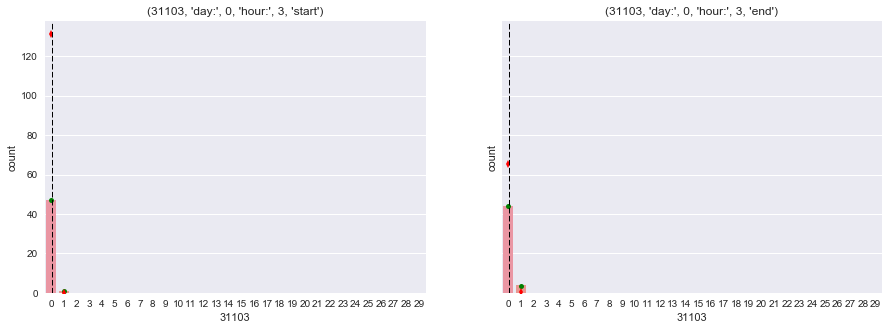

start mean: 0.08333333333333333
end mean: 0.0425531914893617


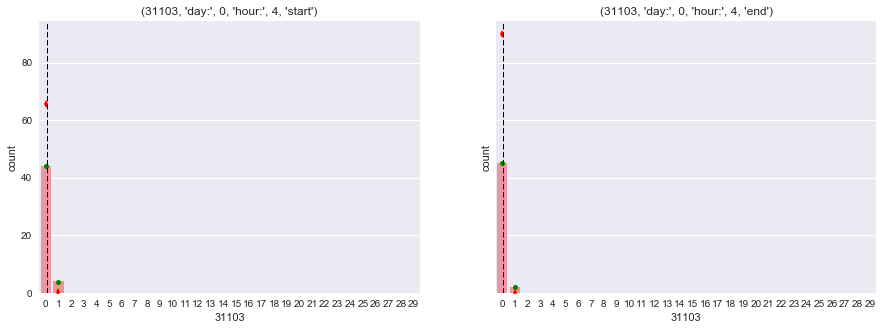

start mean: 0.4807692307692308
end mean: 0.11764705882352941


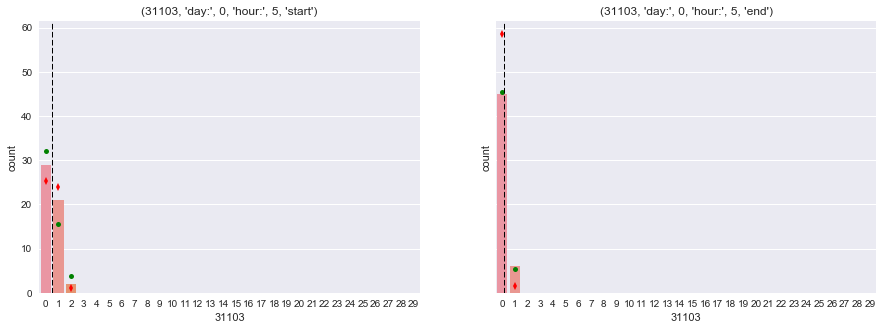

start mean: 0.7884615384615384
end mean: 0.15384615384615385


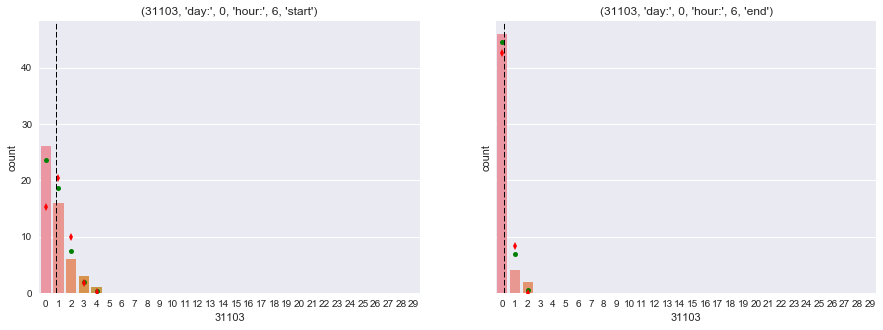

start mean: 4.4423076923076925
end mean: 0.34615384615384615


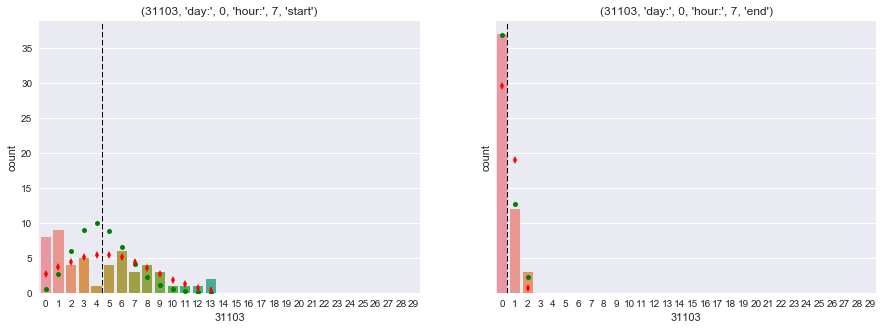

start mean: 6.5
end mean: 0.6346153846153846


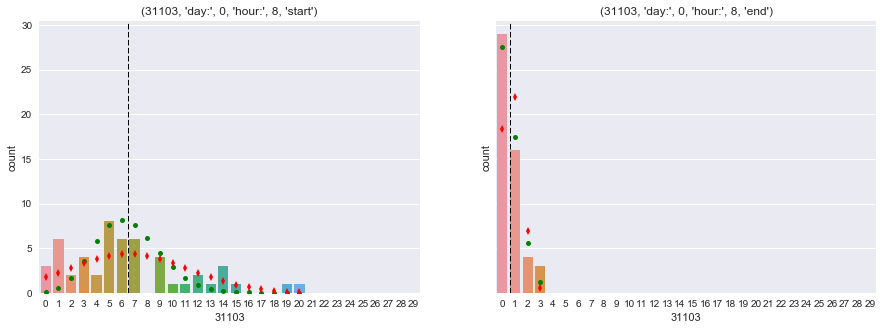

start mean: 2.519230769230769
end mean: 0.4230769230769231


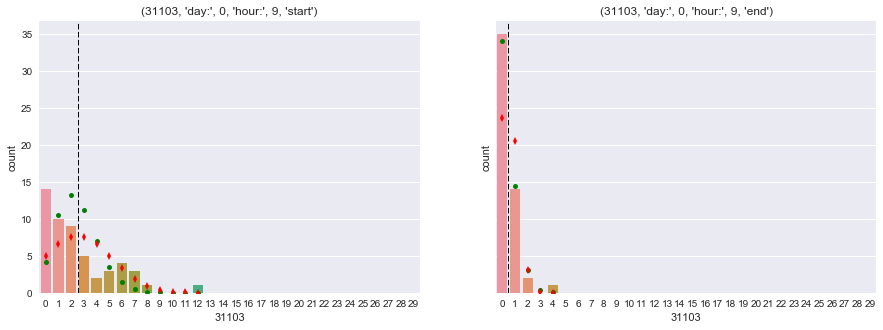

start mean: 1.6153846153846154
end mean: 0.34615384615384615


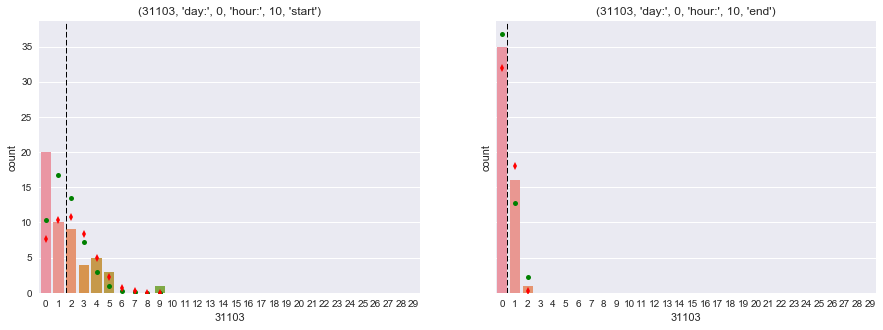

start mean: 1.7115384615384615
end mean: 0.4807692307692308


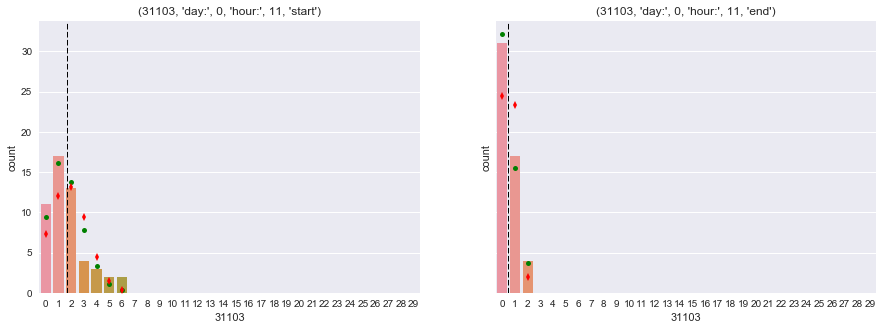

start mean: 1.6153846153846154
end mean: 0.5


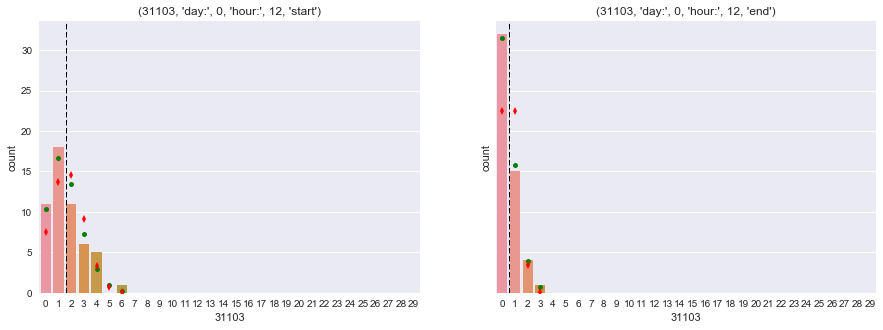

start mean: 1.9038461538461537
end mean: 0.8269230769230769


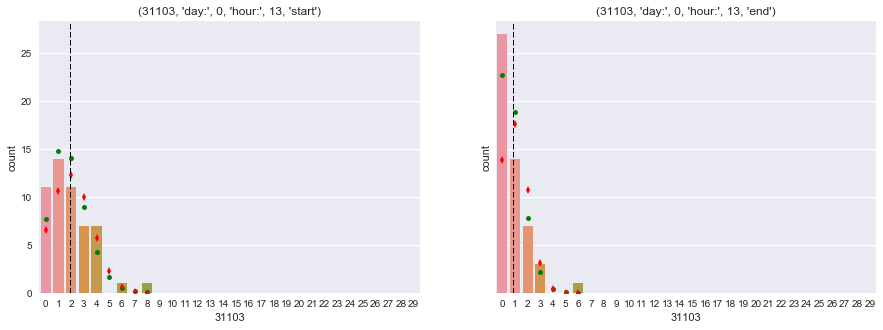

start mean: 1.4230769230769231
end mean: 0.8846153846153846


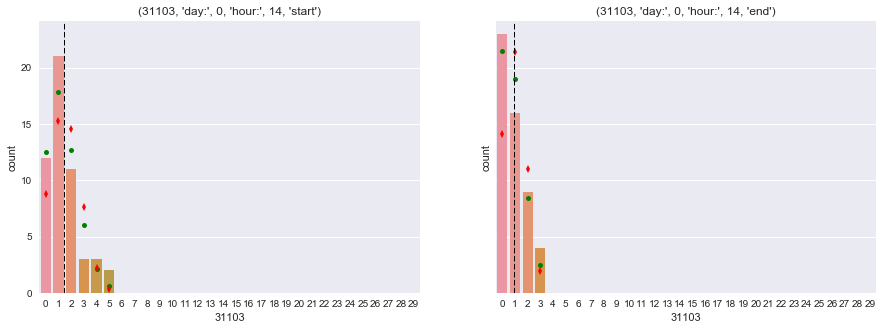

start mean: 1.5
end mean: 1.0769230769230769


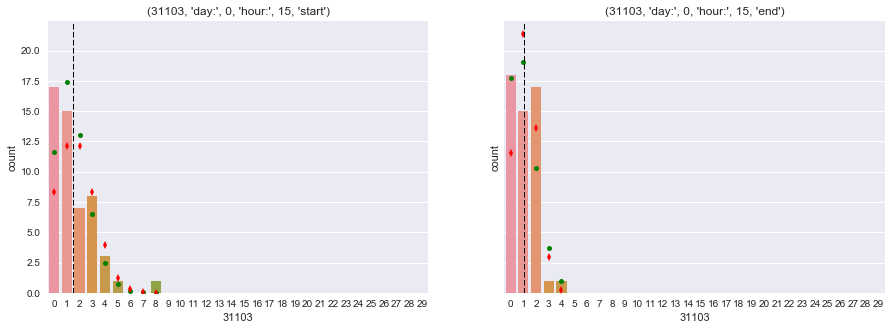

start mean: 1.3461538461538463
end mean: 1.4423076923076923


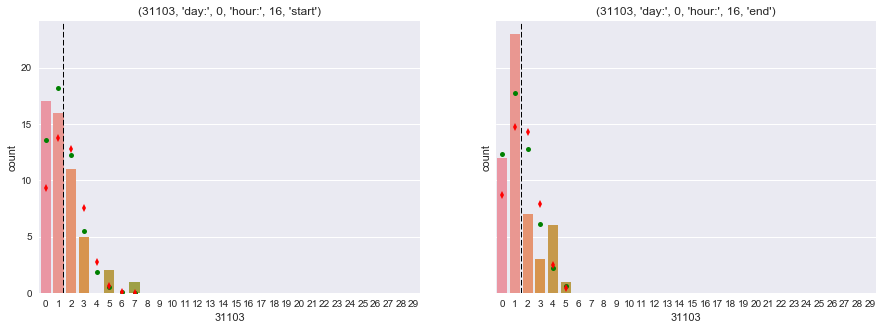

start mean: 2.7115384615384617
end mean: 3.5384615384615383


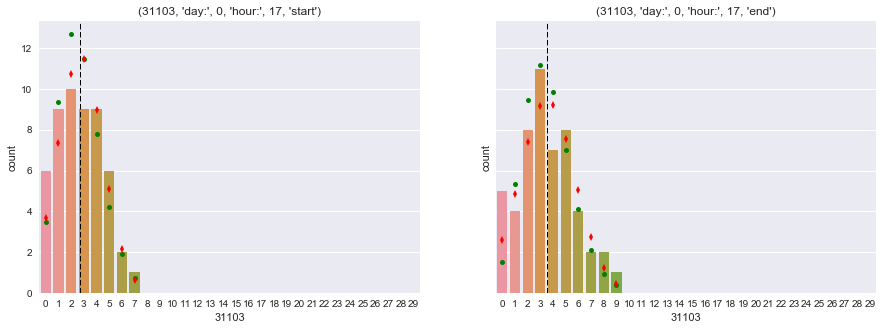

start mean: 4.711538461538462
end mean: 5.634615384615385


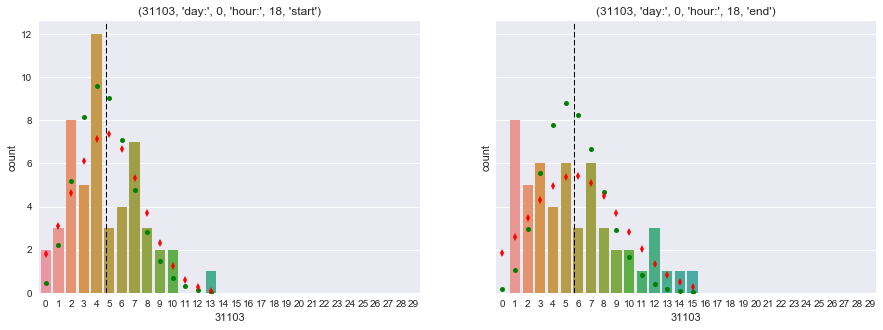

start mean: 4.0576923076923075
end mean: 4.115384615384615


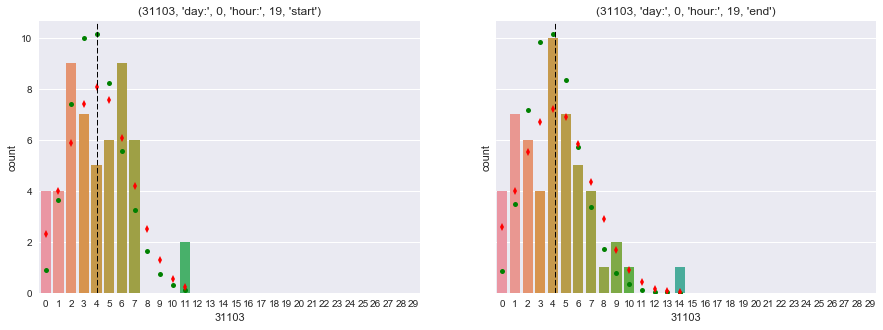

start mean: 2.923076923076923
end mean: 3.8846153846153846


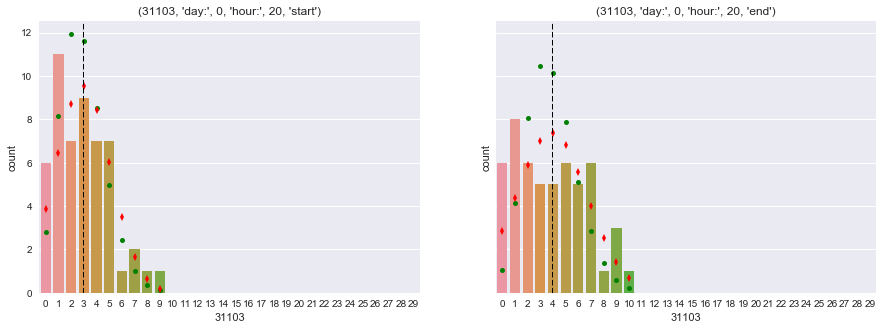

start mean: 2.0
end mean: 2.673076923076923


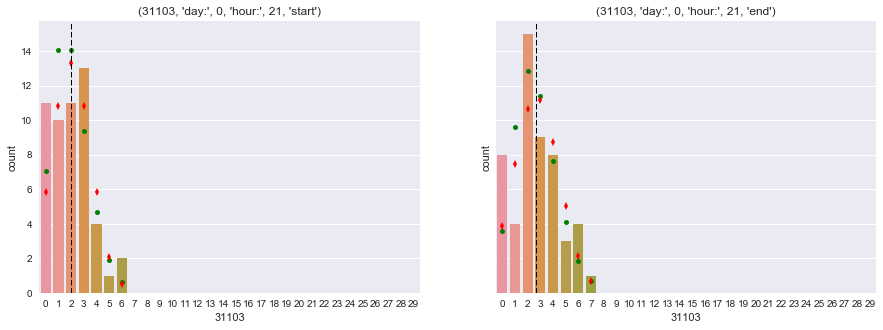

start mean: 1.7307692307692308
end mean: 2.5


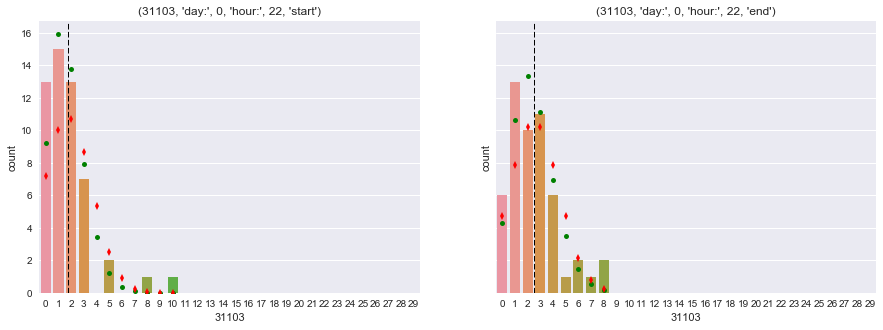

start mean: 0.9615384615384616
end mean: 1.0961538461538463


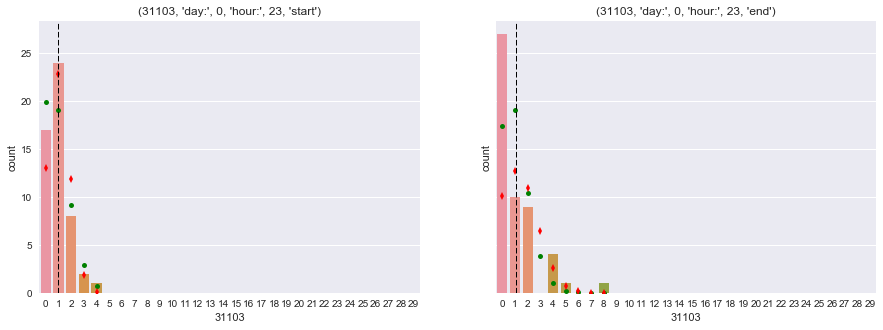

start mean: 0.4
end mean: 0.8431372549019608


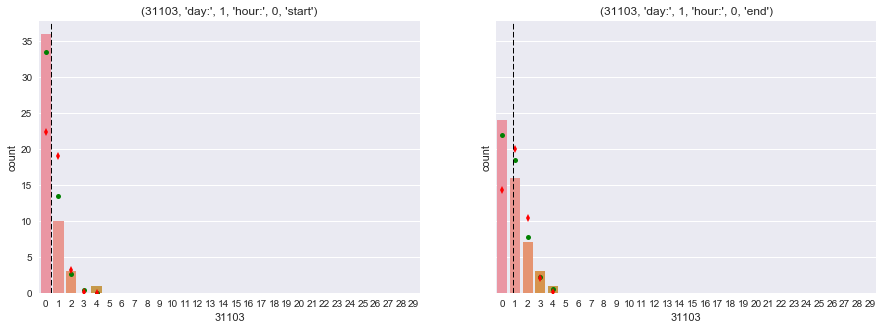

start mean: 0.1836734693877551
end mean: 0.28


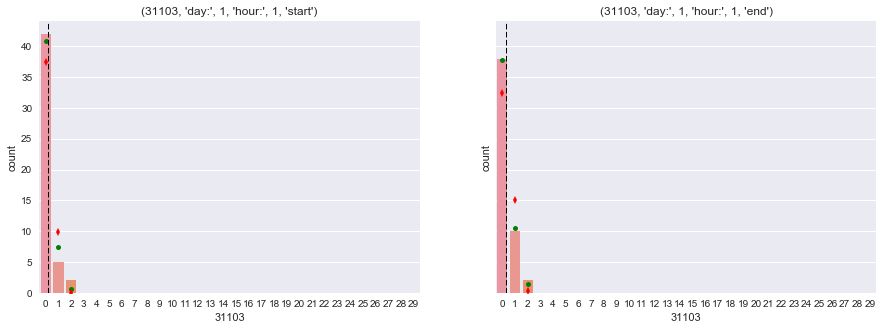

start mean: 0.08
end mean: 0.08163265306122448


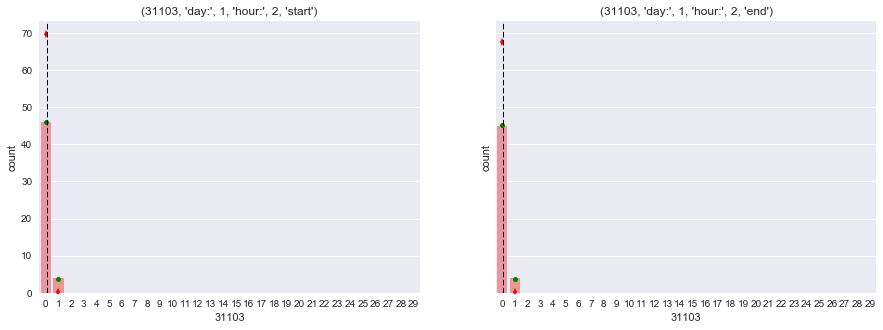

start mean: 0.0
end mean: 0.043478260869565216


/Users/Derek/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1645: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


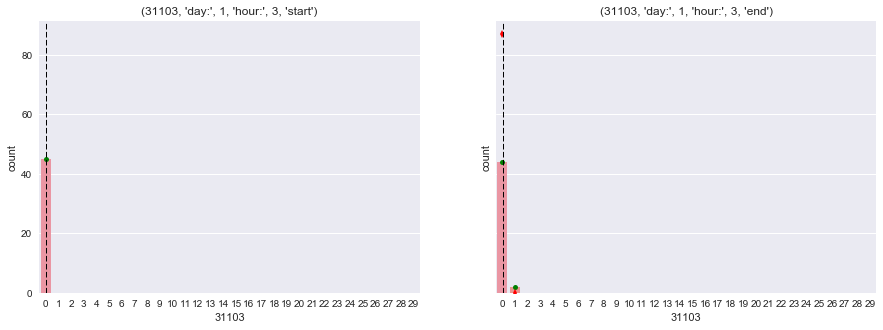

start mean: 0.0
end mean: 0.02127659574468085


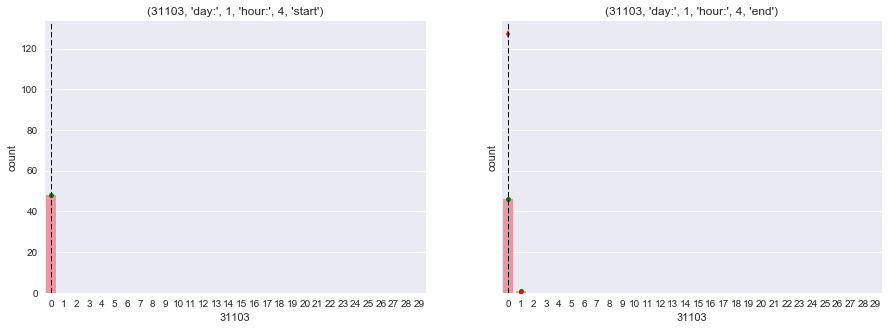

start mean: 0.64
end mean: 0.06


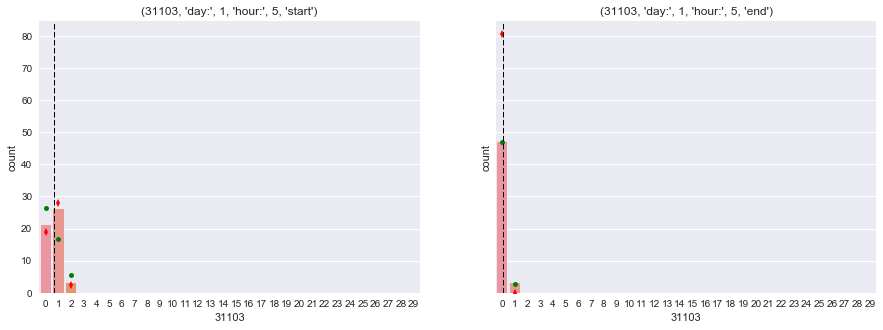

start mean: 1.7058823529411764
end mean: 0.0392156862745098


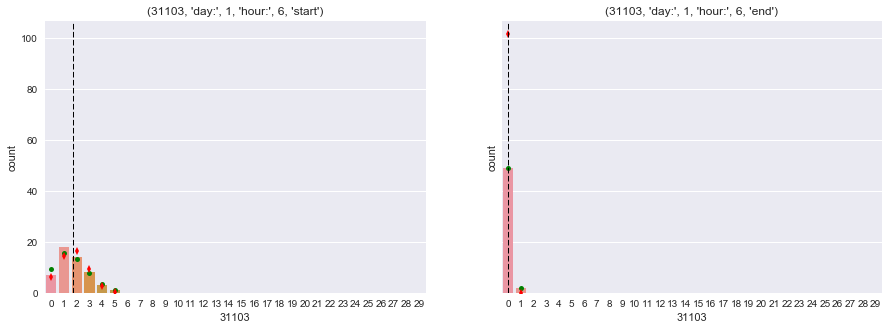

start mean: 5.333333333333333
end mean: 0.5294117647058824


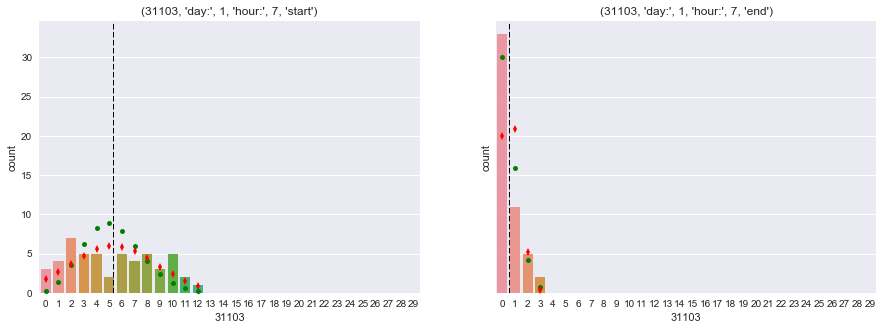

start mean: 7.235294117647059
end mean: 0.7450980392156863


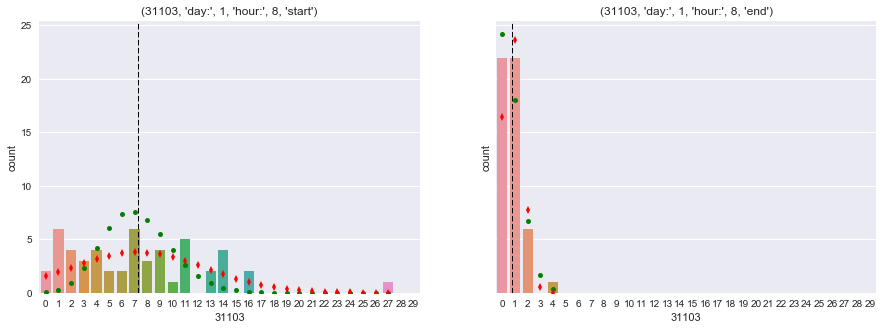

start mean: 2.2549019607843137
end mean: 0.27450980392156865


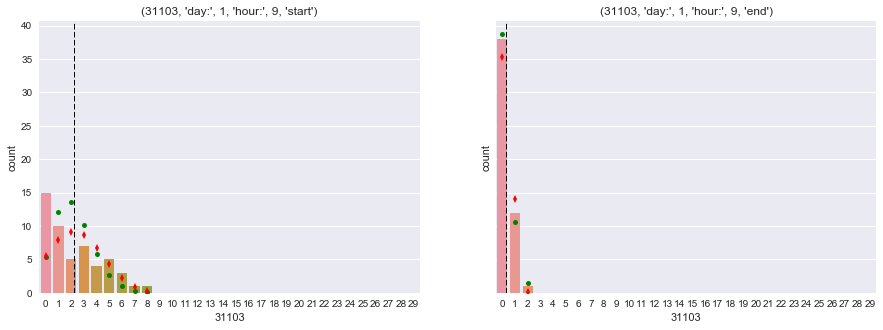

start mean: 1.5686274509803921
end mean: 0.29411764705882354


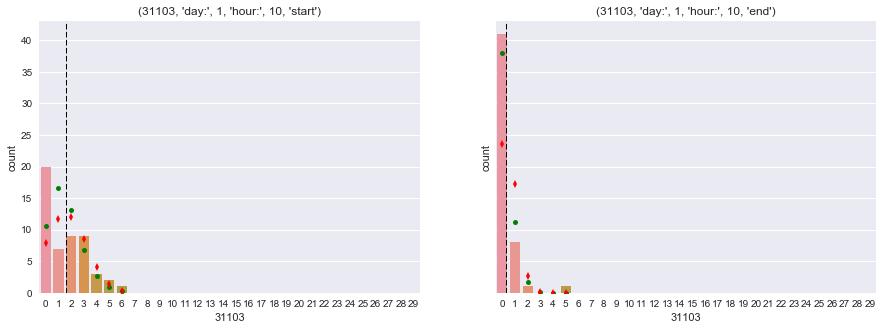

start mean: 1.3529411764705883
end mean: 0.43137254901960786


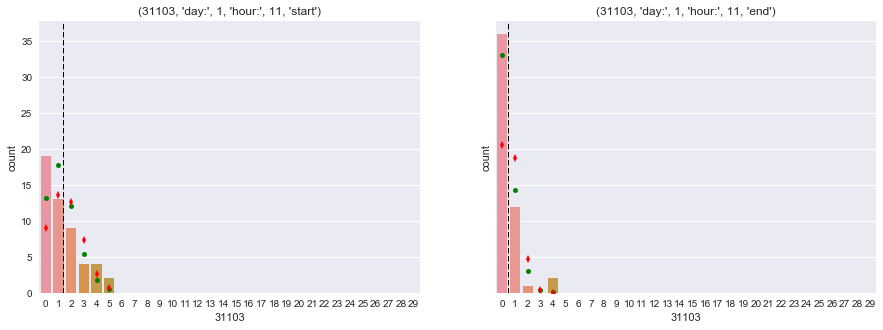

start mean: 1.25
end mean: 0.3333333333333333


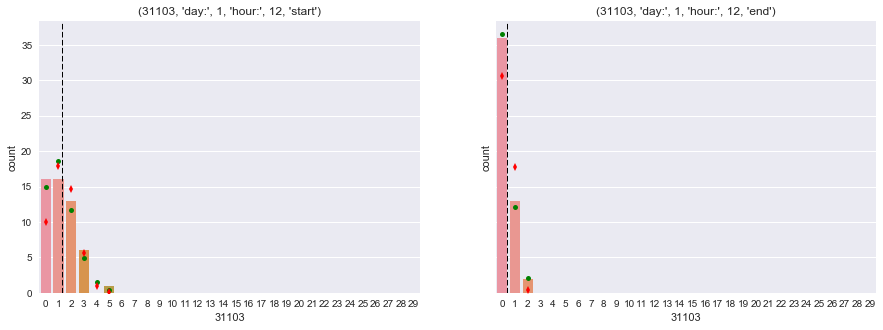

start mean: 1.5192307692307692
end mean: 0.4807692307692308


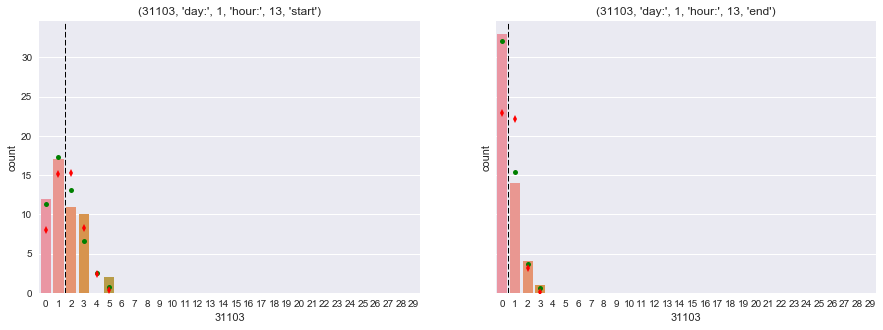

start mean: 1.1346153846153846
end mean: 0.5576923076923077


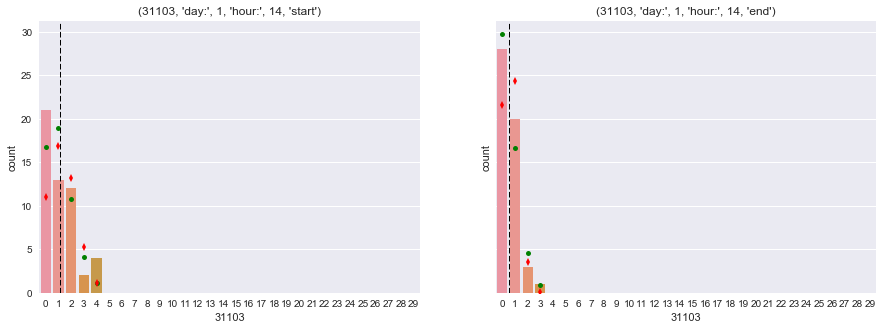

start mean: 1.0961538461538463
end mean: 1.4038461538461537


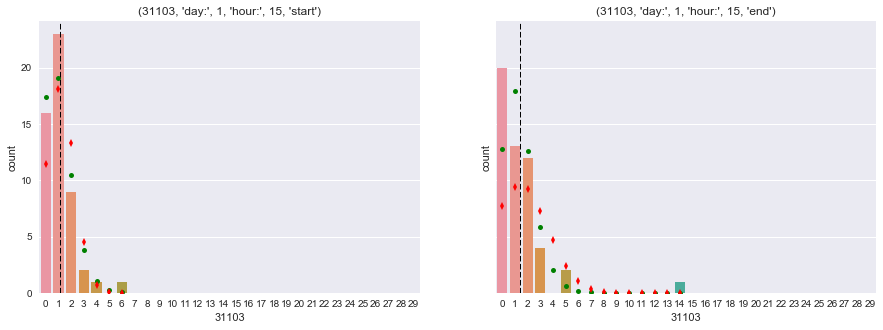

start mean: 1.5384615384615385
end mean: 1.6538461538461537


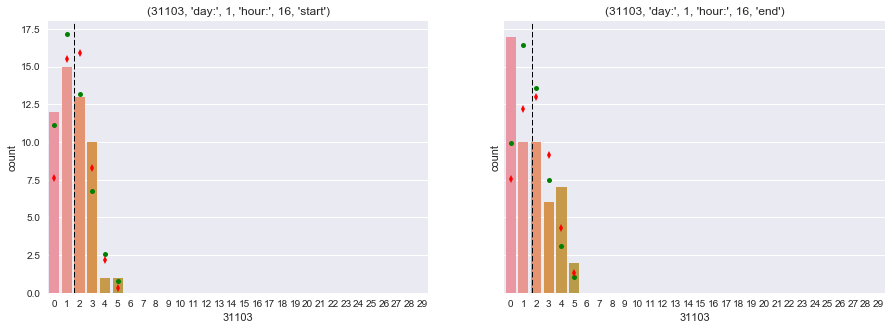

start mean: 2.9038461538461537
end mean: 3.730769230769231


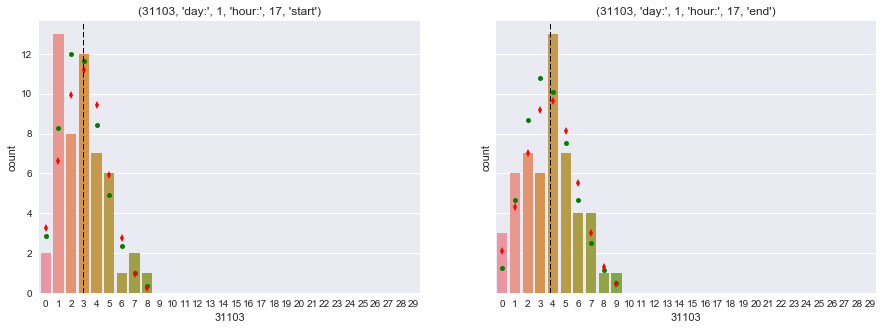

start mean: 4.9423076923076925
end mean: 6.576923076923077


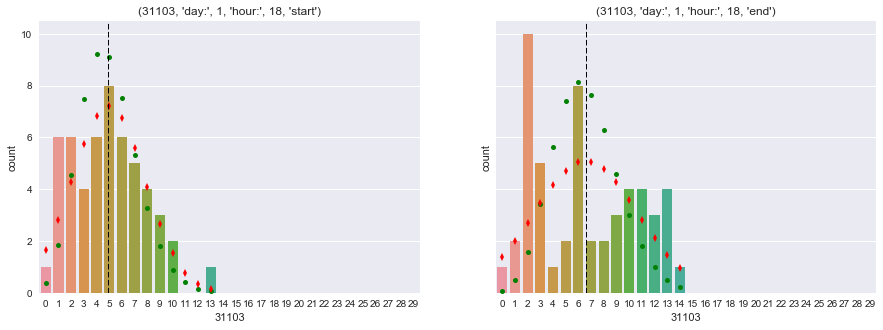

start mean: 3.7884615384615383
end mean: 4.423076923076923


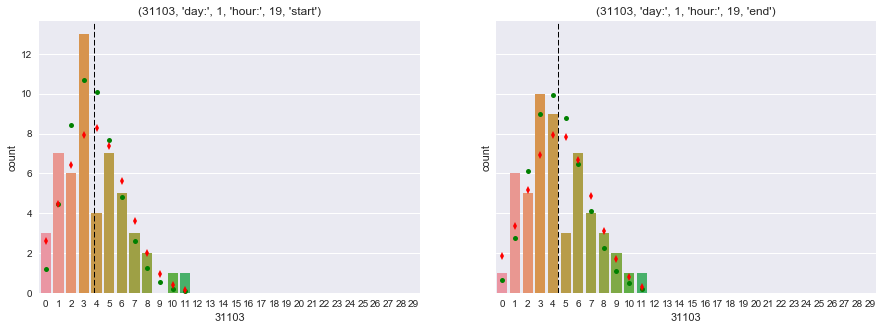

start mean: 3.519230769230769
end mean: 3.5384615384615383


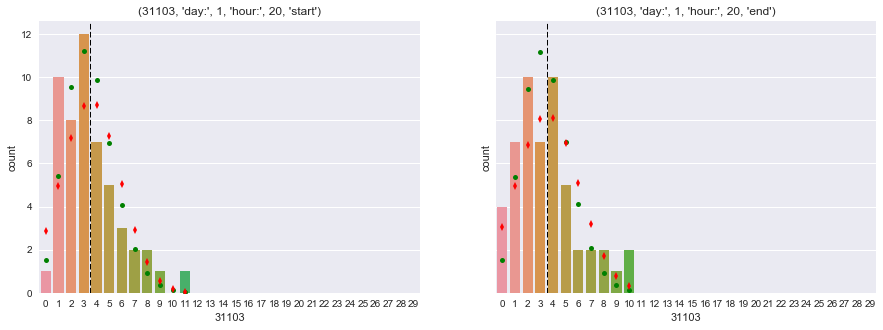

start mean: 2.75
end mean: 3.75


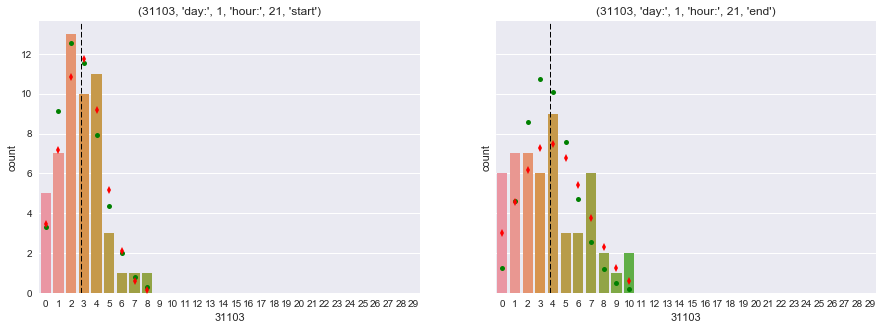

start mean: 1.8846153846153846
end mean: 3.0384615384615383


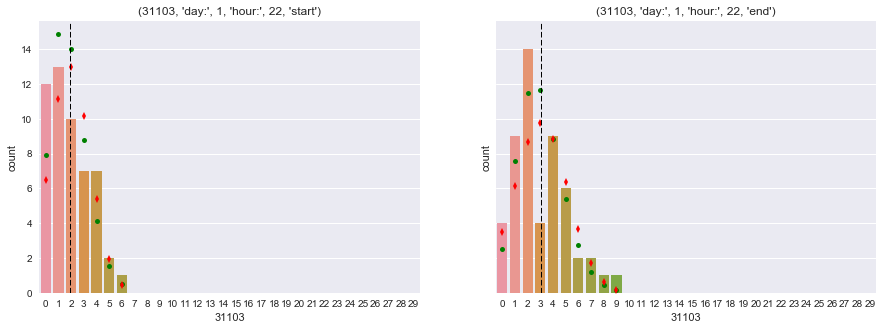

start mean: 1.1730769230769231
end mean: 1.7884615384615385


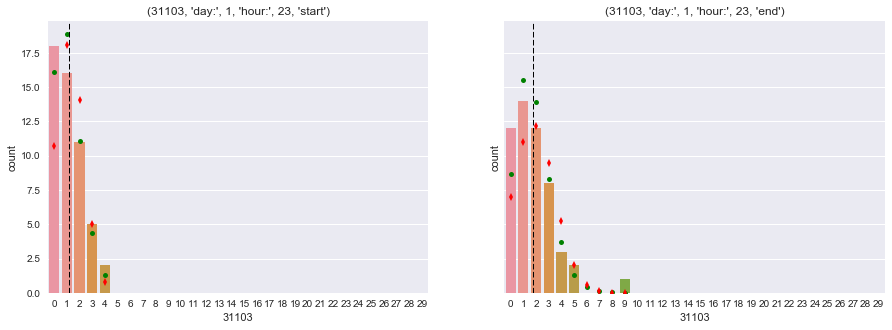

start mean: 0.36538461538461536
end mean: 0.6923076923076923


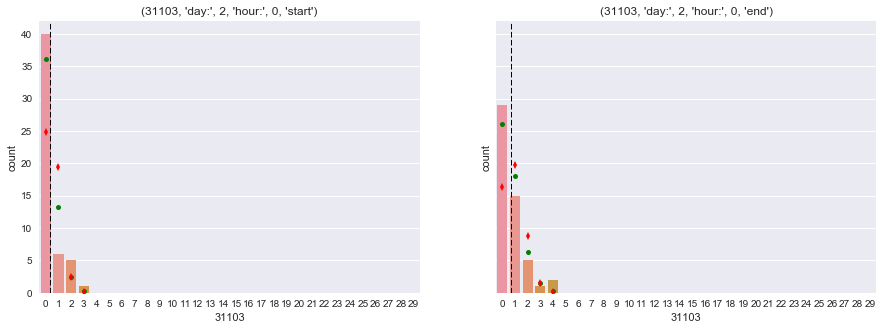

start mean: 0.23076923076923078
end mean: 0.40384615384615385


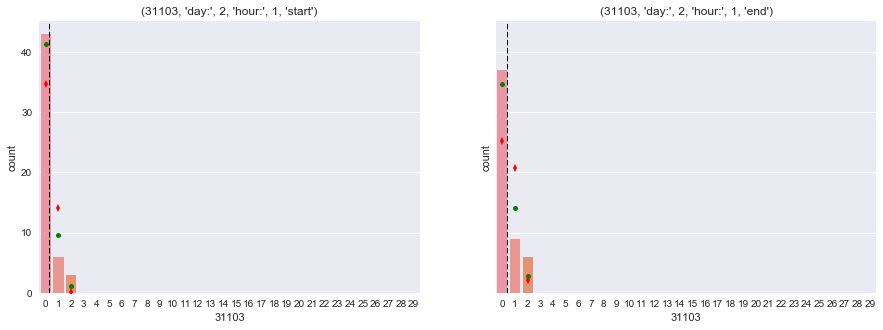

start mean: 0.02
end mean: 0.19607843137254902


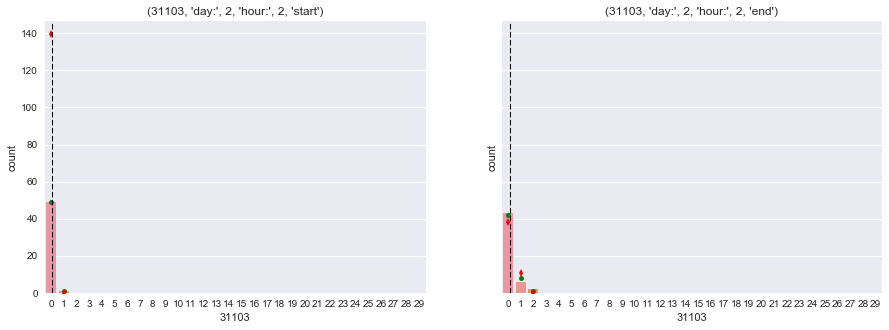

start mean: 0.0425531914893617
end mean: 0.06382978723404255


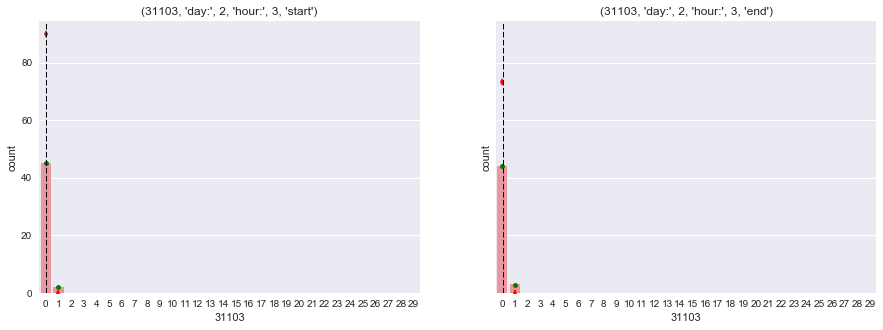

start mean: 0.021739130434782608
end mean: 0.022727272727272728


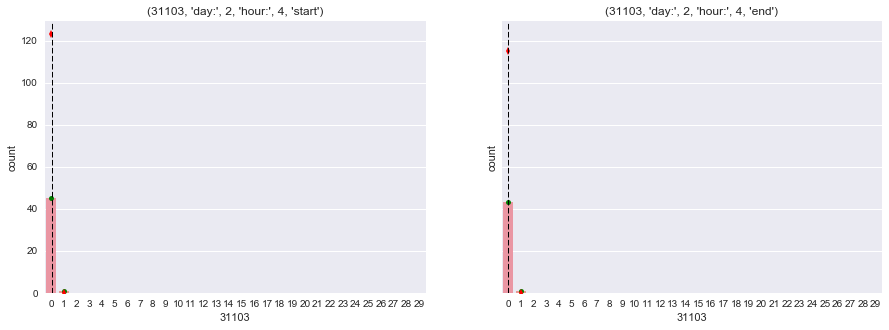

start mean: 0.6153846153846154
end mean: 0.09615384615384616


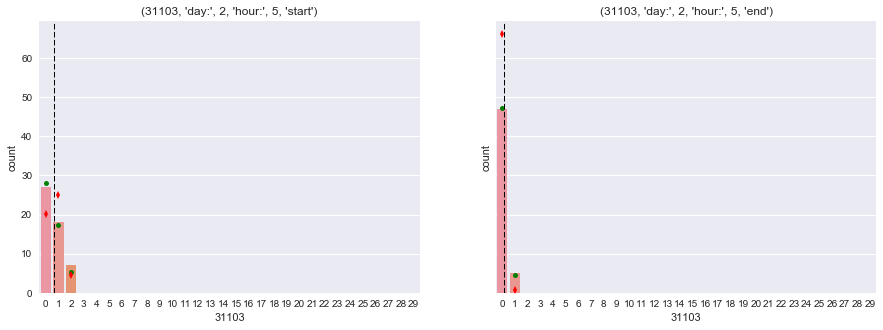

start mean: 1.3461538461538463
end mean: 0.057692307692307696


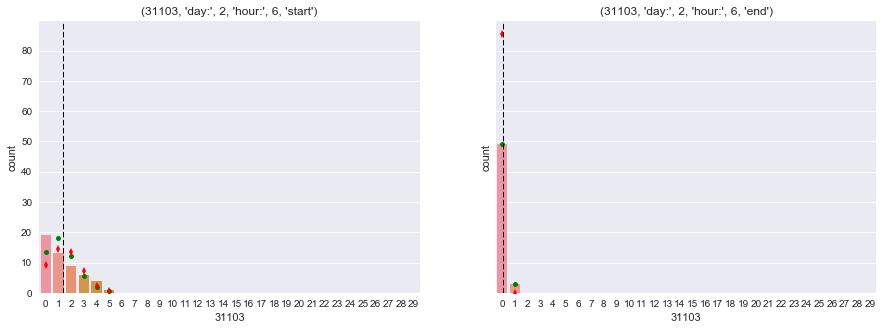

start mean: 4.25
end mean: 0.38461538461538464


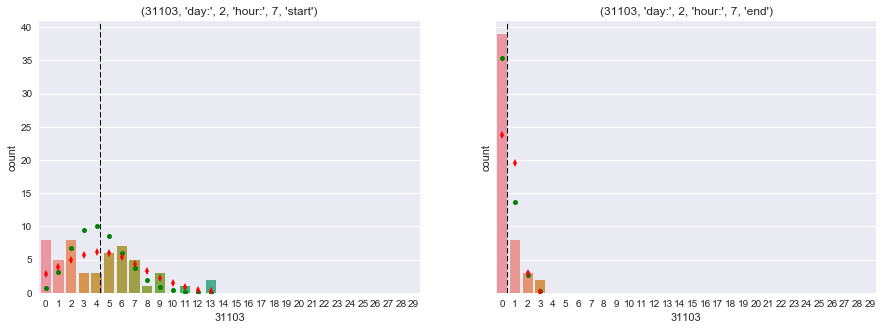

start mean: 7.634615384615385
end mean: 0.6923076923076923


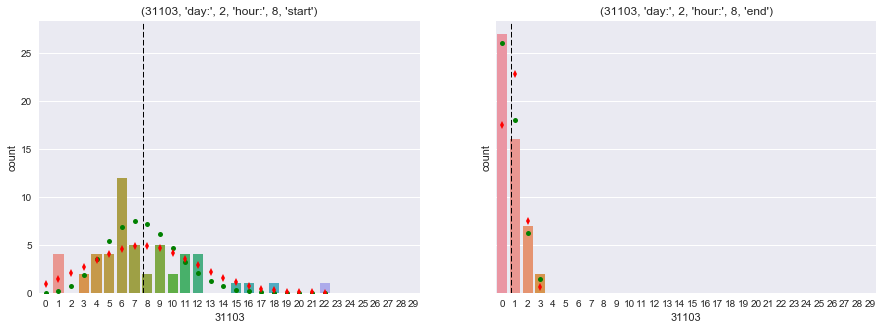

start mean: 2.8846153846153846
end mean: 0.4230769230769231


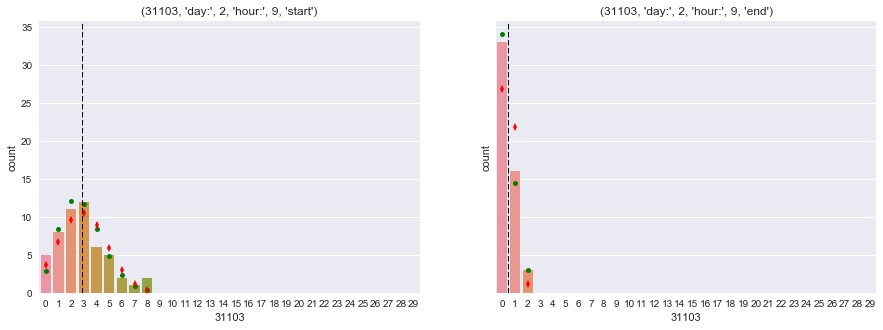

start mean: 1.8461538461538463
end mean: 0.23076923076923078


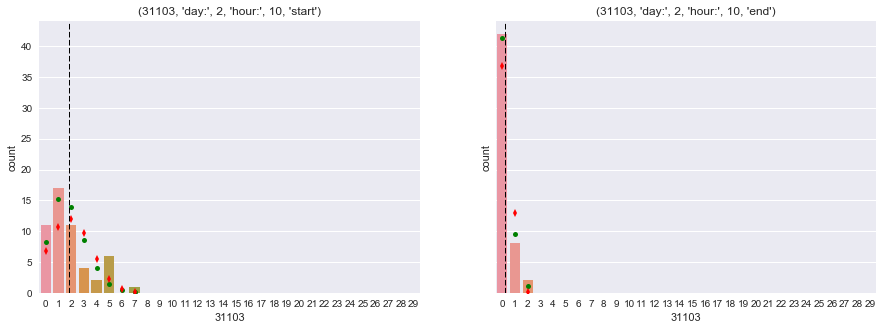

start mean: 1.5769230769230769
end mean: 0.5


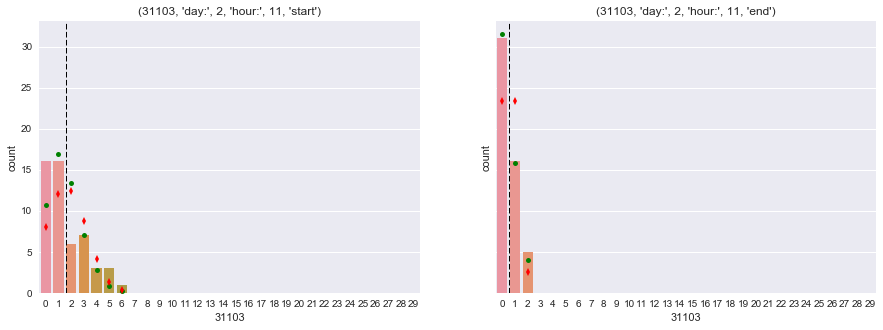

start mean: 1.2884615384615385
end mean: 0.5384615384615384


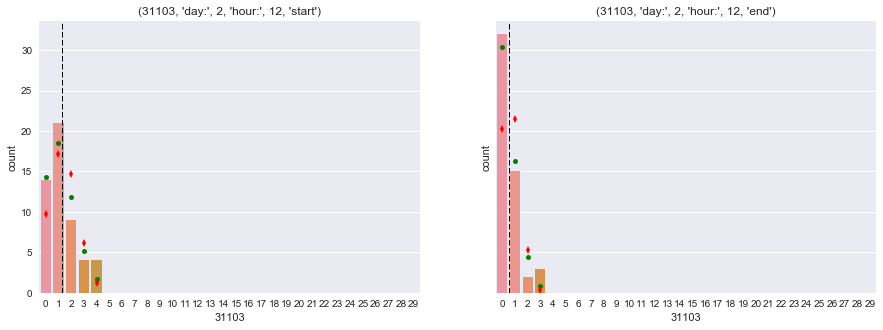

start mean: 1.5
end mean: 0.46153846153846156


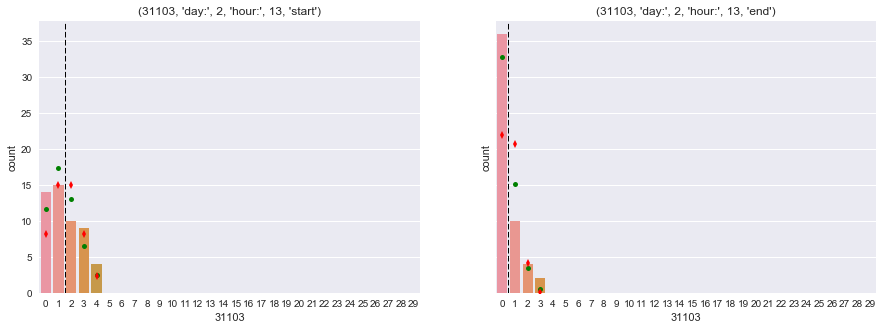

start mean: 0.9807692307692307
end mean: 0.5576923076923077


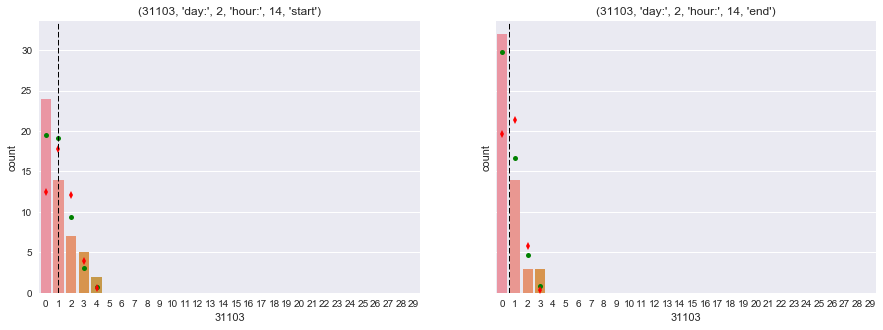

start mean: 1.3461538461538463
end mean: 0.8461538461538461


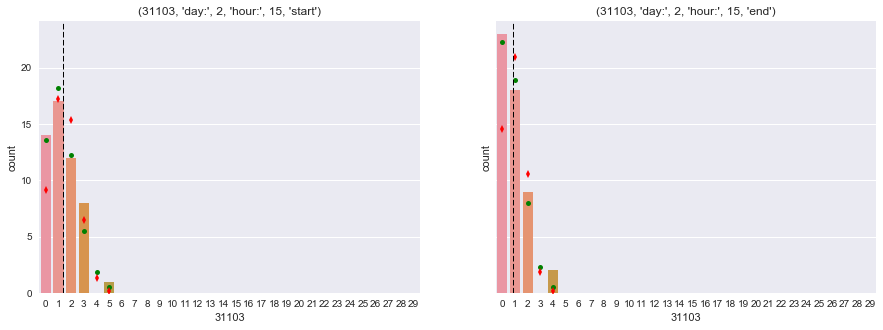

start mean: 1.4615384615384615
end mean: 1.4230769230769231


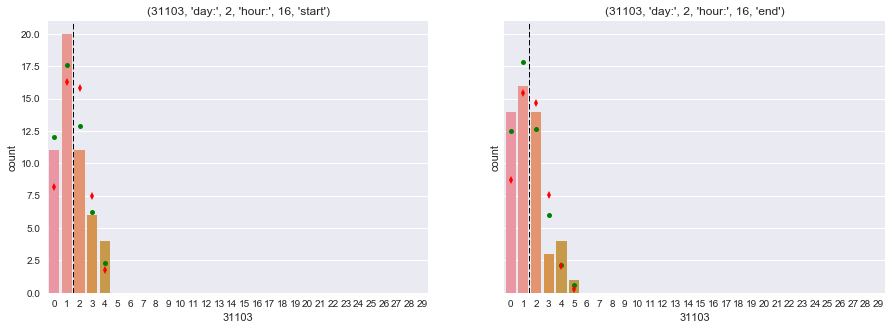

start mean: 2.8846153846153846
end mean: 3.25


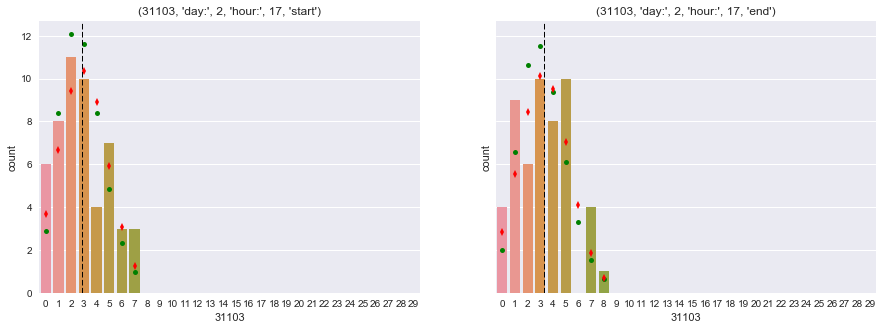

start mean: 4.588235294117647
end mean: 4.3076923076923075


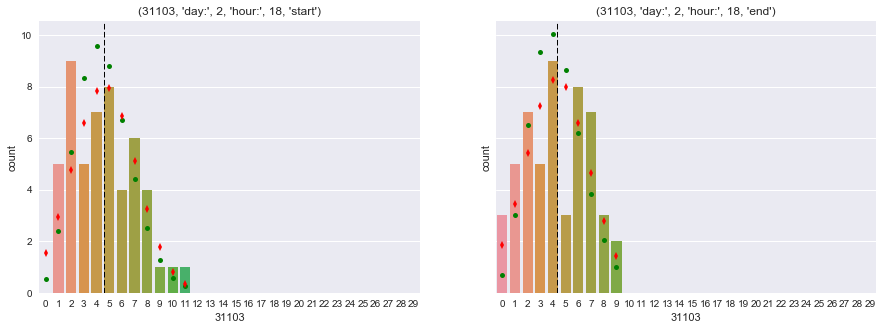

start mean: 3.4901960784313726
end mean: 4.294117647058823


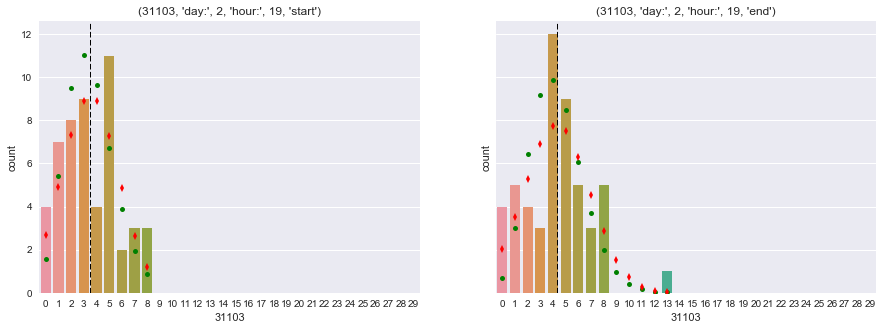

start mean: 2.4901960784313726
end mean: 3.4313725490196076


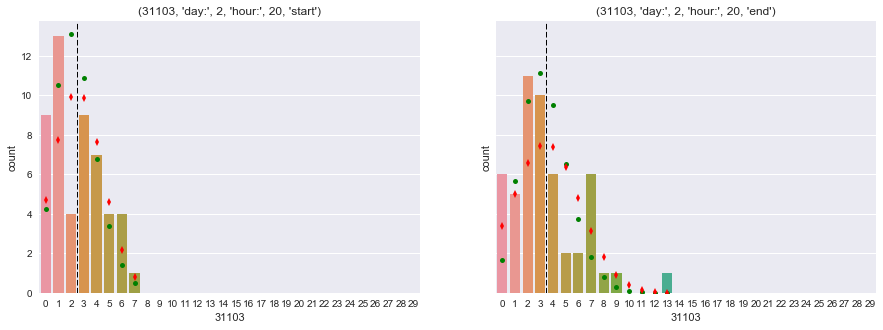

start mean: 2.176470588235294
end mean: 2.7254901960784315


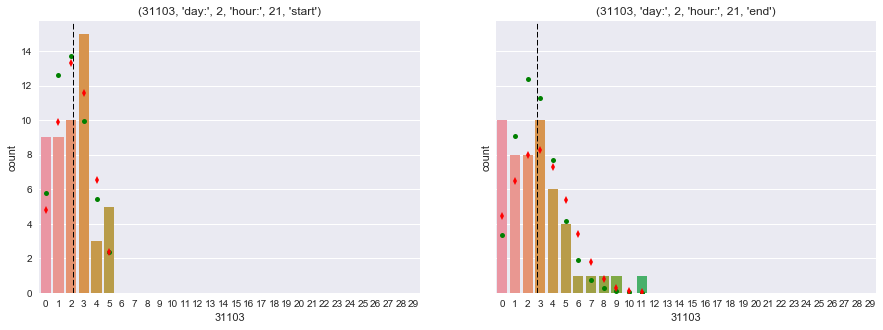

start mean: 1.8235294117647058
end mean: 2.1372549019607843


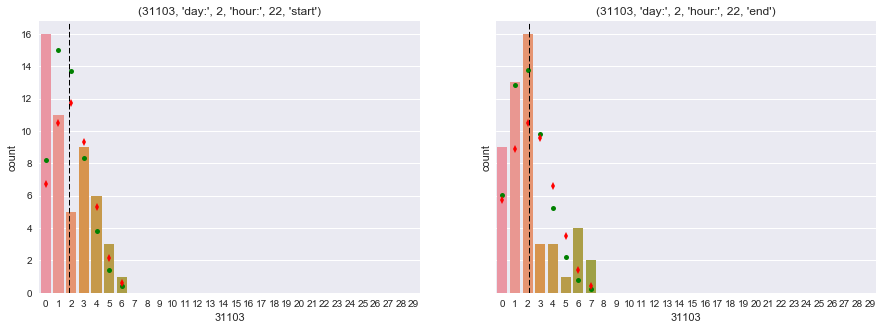

start mean: 1.0980392156862746
end mean: 2.1372549019607843


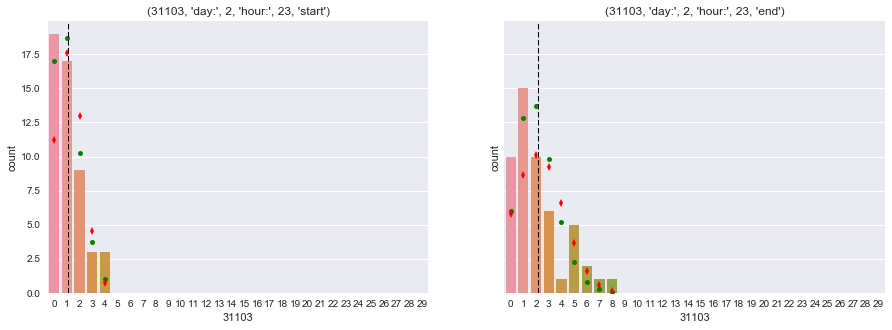

start mean: 0.5098039215686274
end mean: 0.6862745098039216


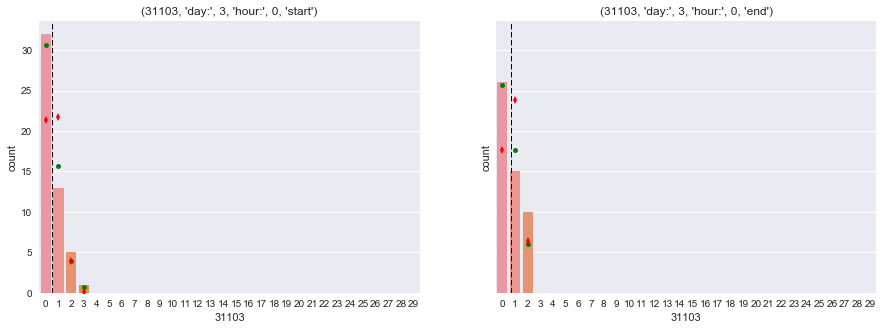

start mean: 0.19607843137254902
end mean: 0.45098039215686275


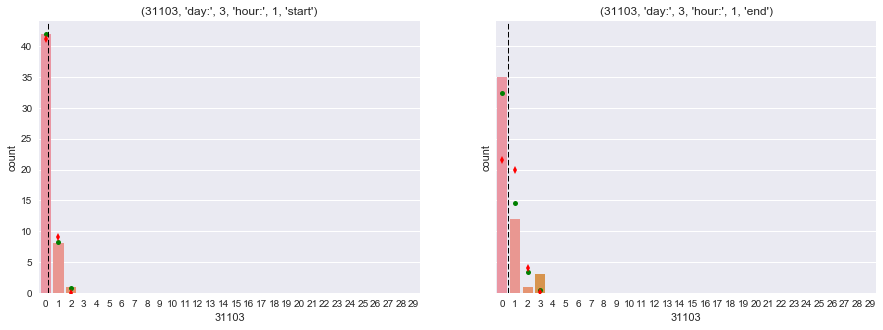

start mean: 0.1
end mean: 0.21568627450980393


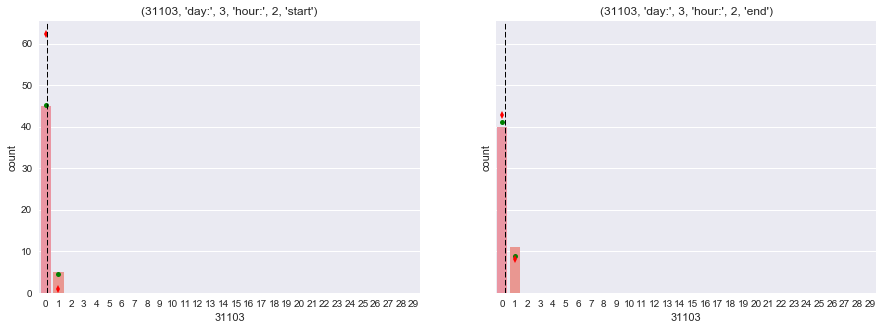

start mean: 0.0625
end mean: 0.0851063829787234


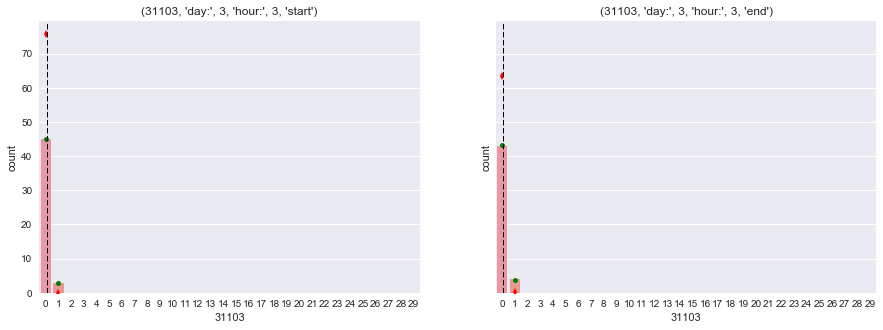

start mean: 0.0625
end mean: 0.02127659574468085


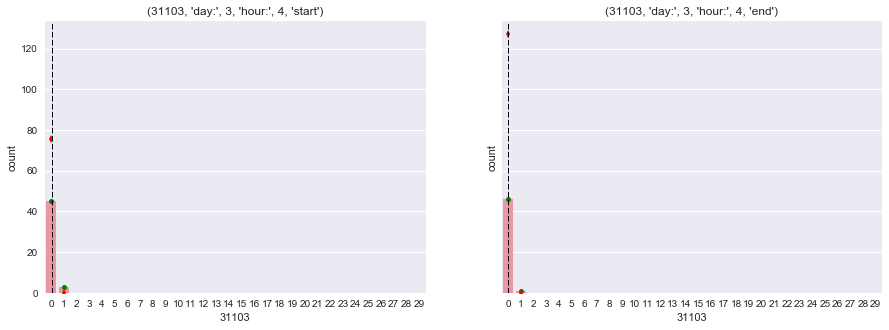

start mean: 0.5686274509803921
end mean: 0.0196078431372549


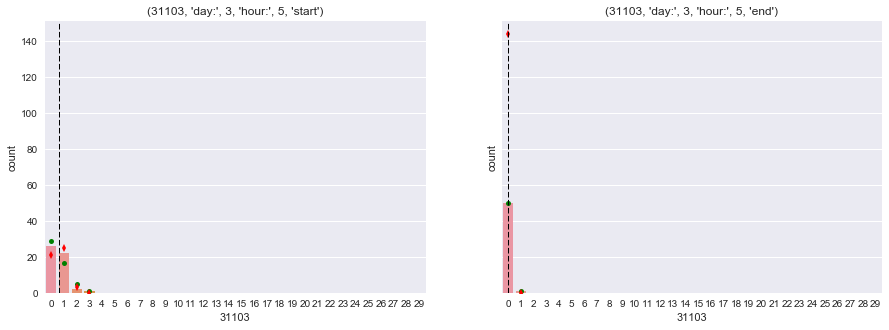

start mean: 1.5490196078431373
end mean: 0.09803921568627451


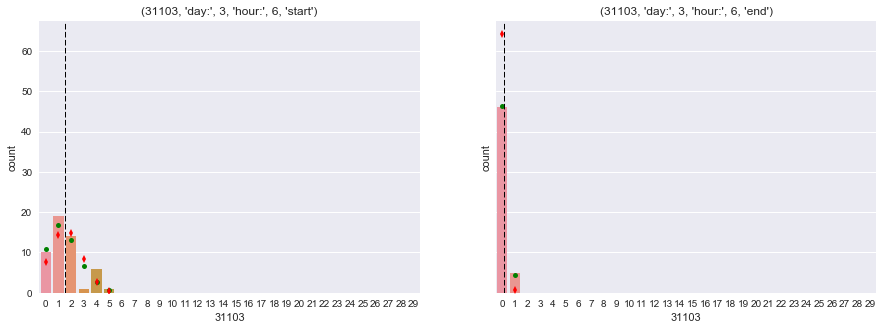

start mean: 5.509803921568627
end mean: 0.3333333333333333


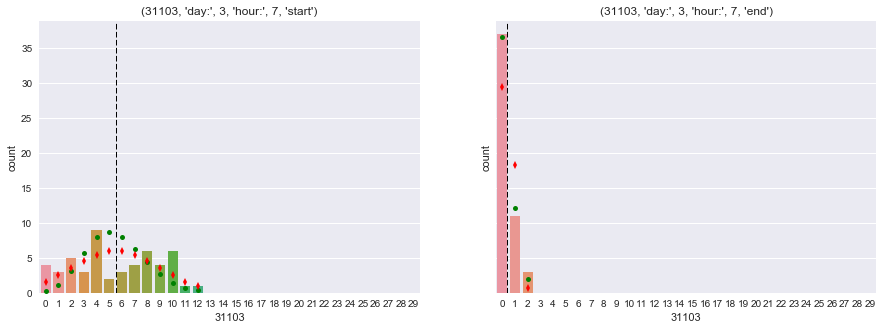

start mean: 6.901960784313726
end mean: 1.0196078431372548


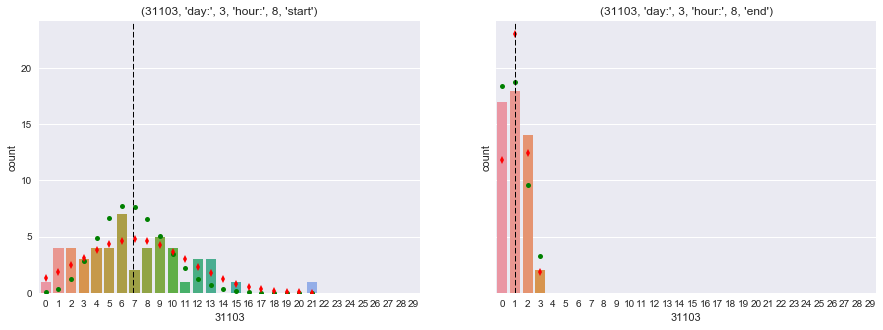

start mean: 2.9019607843137254
end mean: 0.3137254901960784


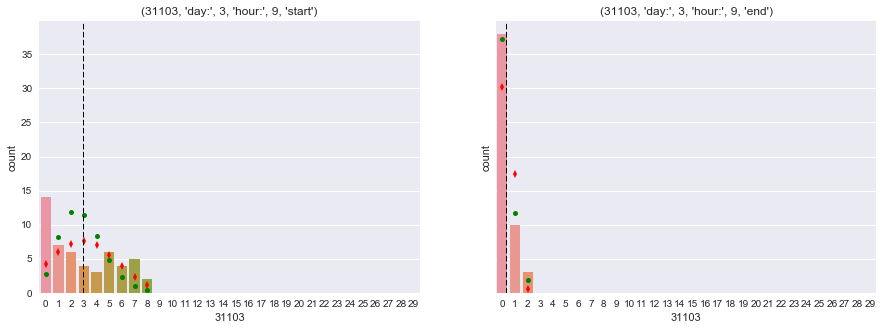

start mean: 1.5490196078431373
end mean: 0.17647058823529413


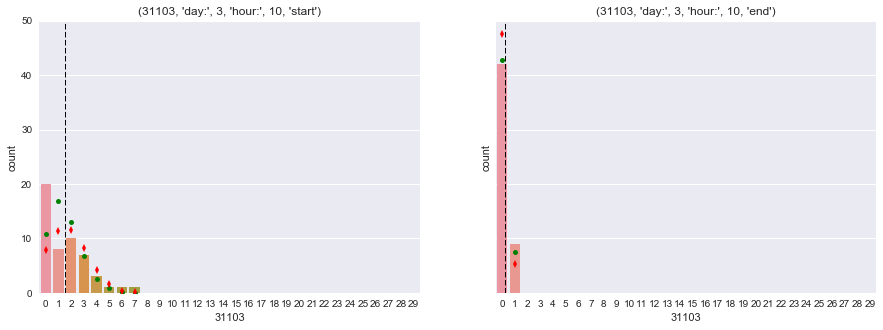

start mean: 1.5294117647058822
end mean: 0.3333333333333333


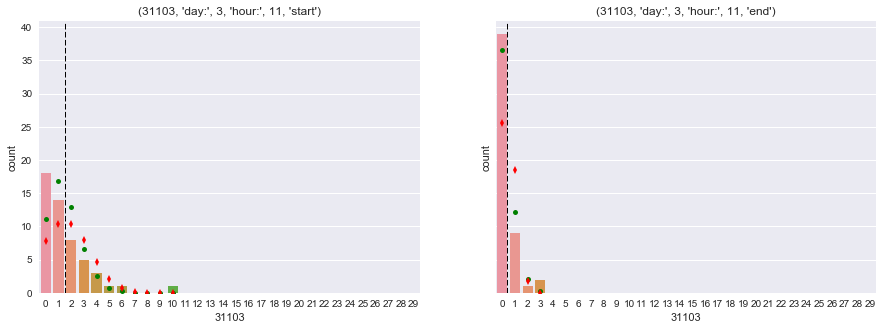

start mean: 1.3137254901960784
end mean: 0.29411764705882354


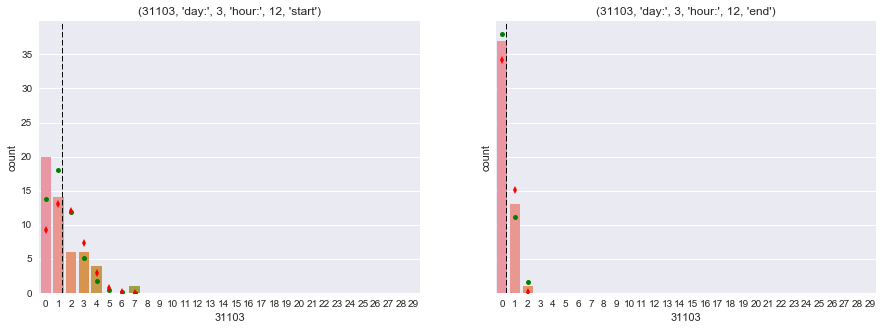

start mean: 1.6274509803921569
end mean: 0.45098039215686275


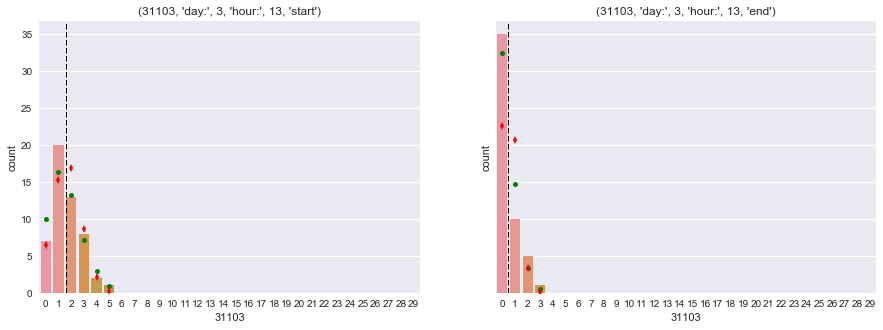

start mean: 1.2549019607843137
end mean: 0.7647058823529411


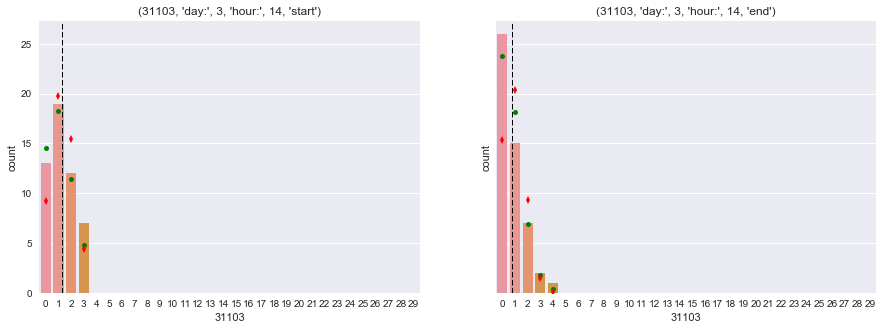

start mean: 1.411764705882353
end mean: 0.9803921568627451


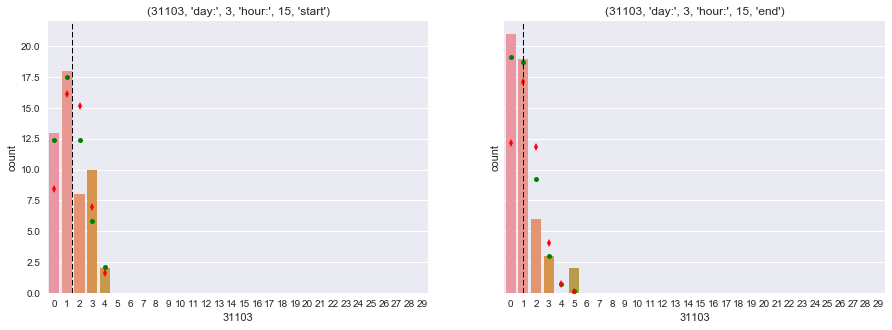

start mean: 1.9230769230769231
end mean: 1.3461538461538463


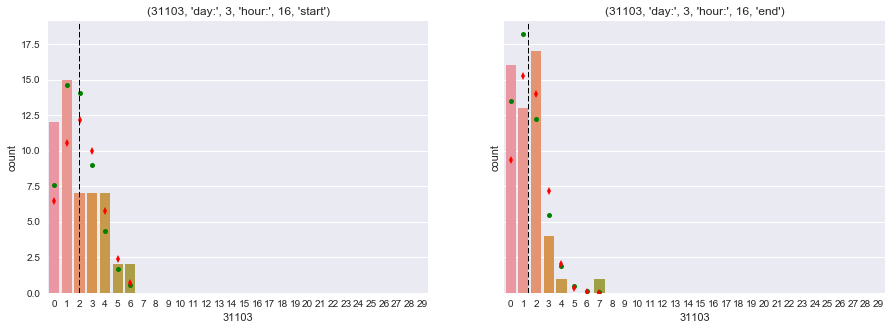

start mean: 2.923076923076923
end mean: 3.4038461538461537


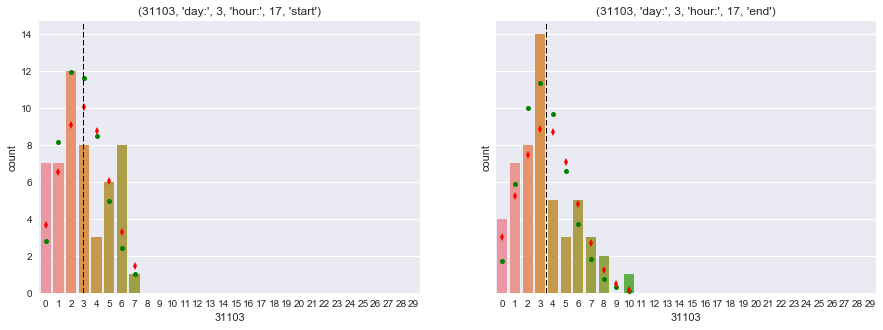

start mean: 3.4423076923076925
end mean: 4.884615384615385


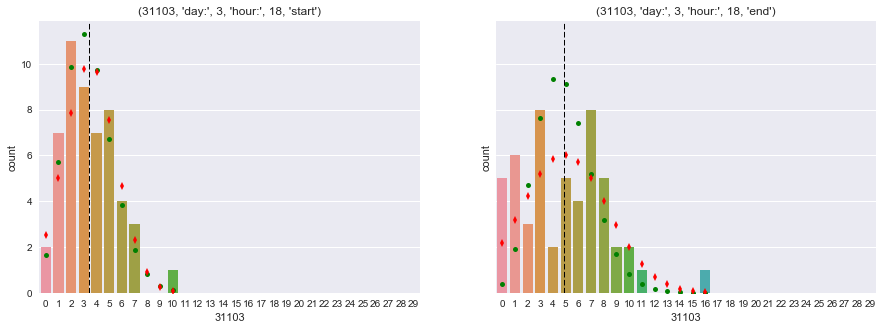

start mean: 4.038461538461538
end mean: 3.9615384615384617


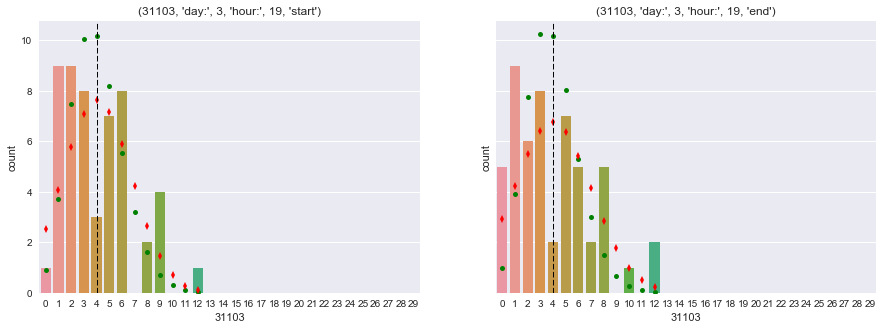

start mean: 3.3846153846153846
end mean: 3.769230769230769


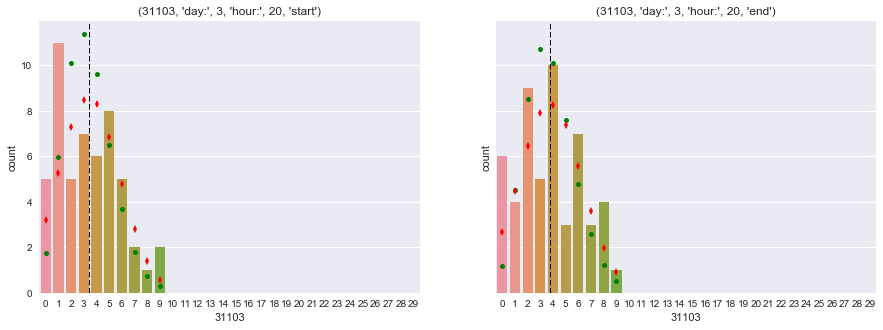

start mean: 2.8461538461538463
end mean: 2.7115384615384617


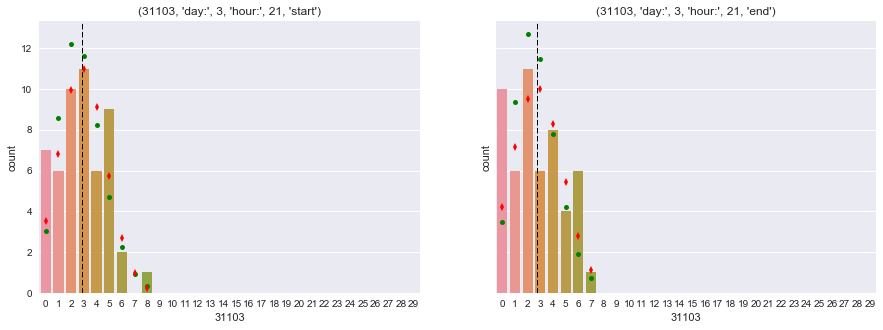

start mean: 2.076923076923077
end mean: 2.519230769230769


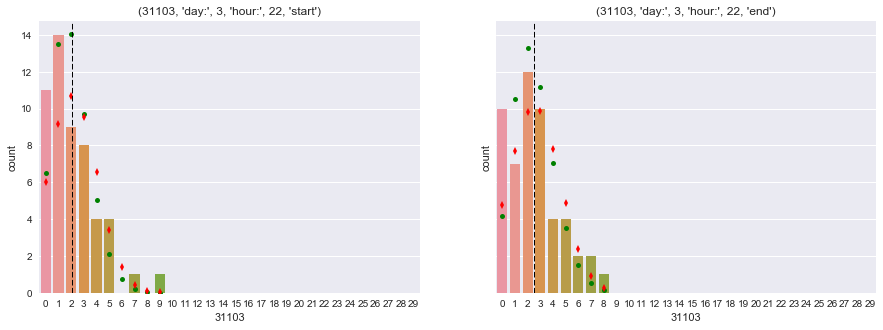

start mean: 1.5961538461538463
end mean: 2.1346153846153846


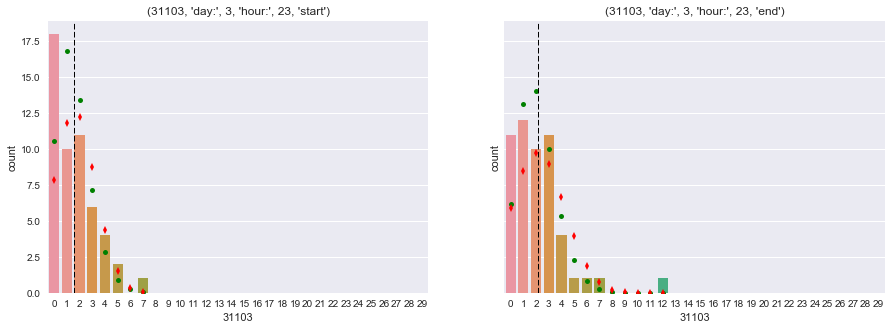

start mean: 0.6346153846153846
end mean: 1.0961538461538463


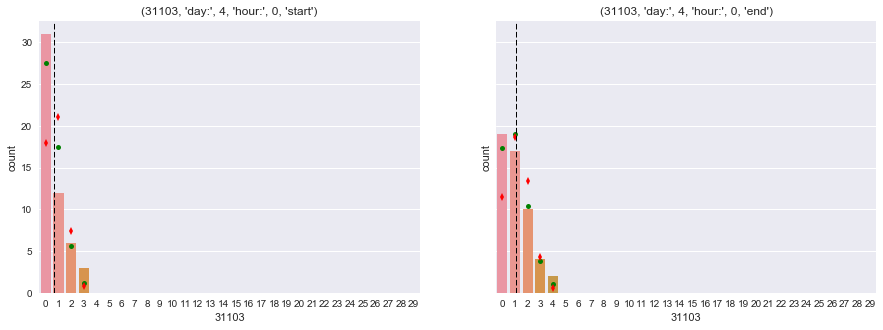

start mean: 0.28846153846153844
end mean: 0.38461538461538464


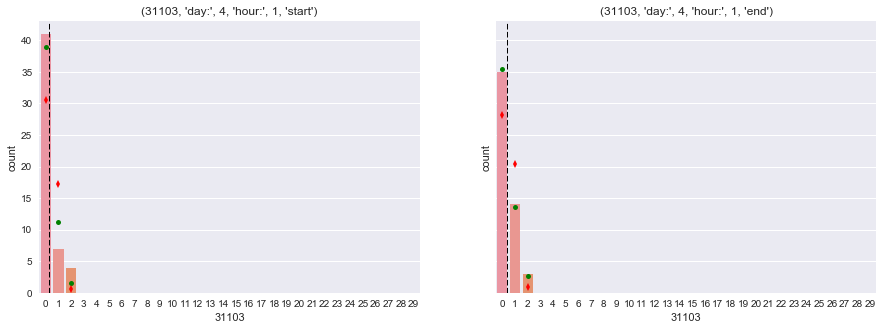

start mean: 0.07692307692307693
end mean: 0.17307692307692307


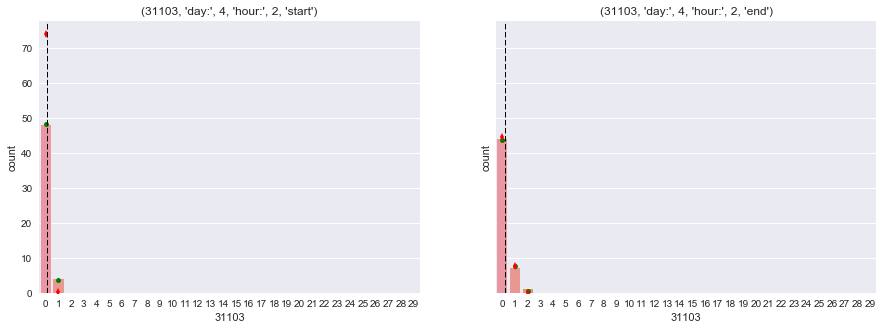

start mean: 0.12
end mean: 0.02040816326530612


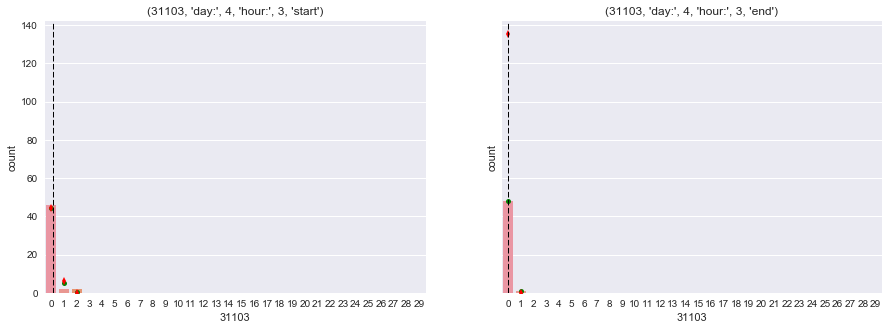

start mean: 0.022222222222222223
end mean: 0.044444444444444446


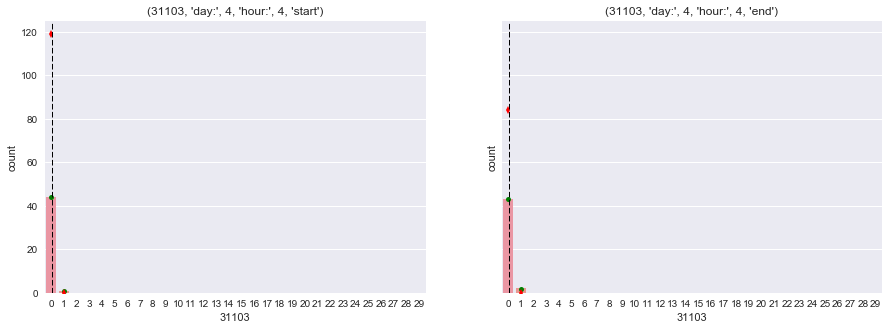

start mean: 0.75
end mean: 0.17307692307692307


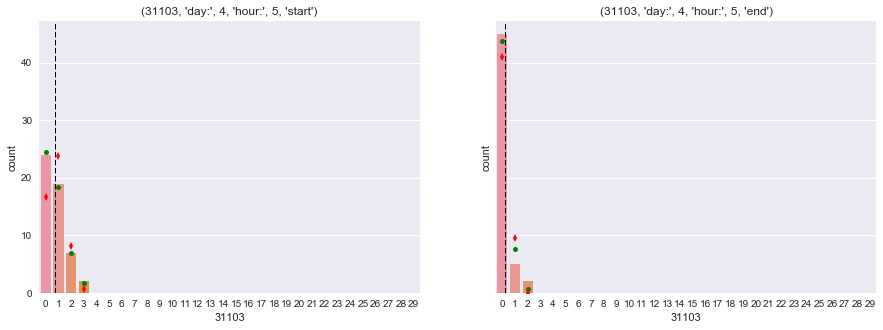

start mean: 1.5769230769230769
end mean: 0.07692307692307693


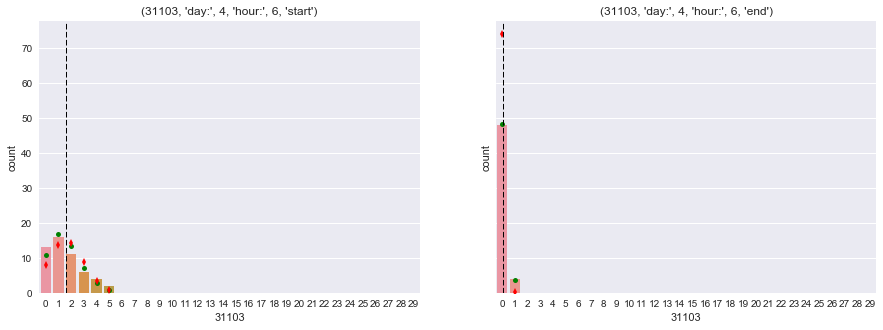

start mean: 3.769230769230769
end mean: 0.4230769230769231


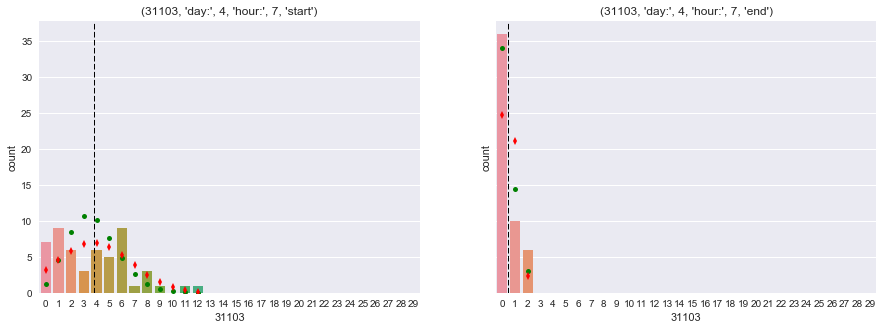

start mean: 8.038461538461538
end mean: 0.8461538461538461


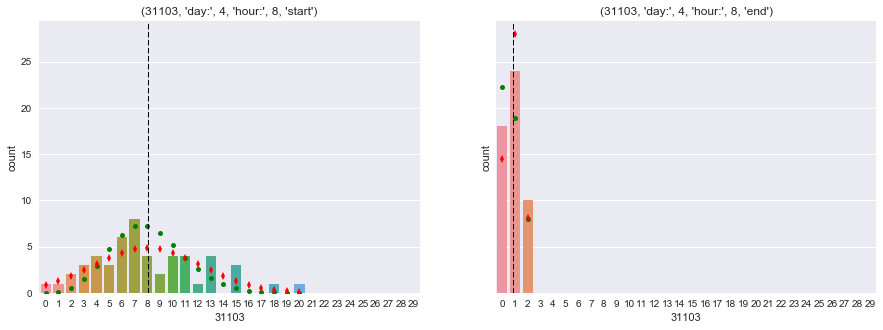

start mean: 3.0
end mean: 0.5384615384615384


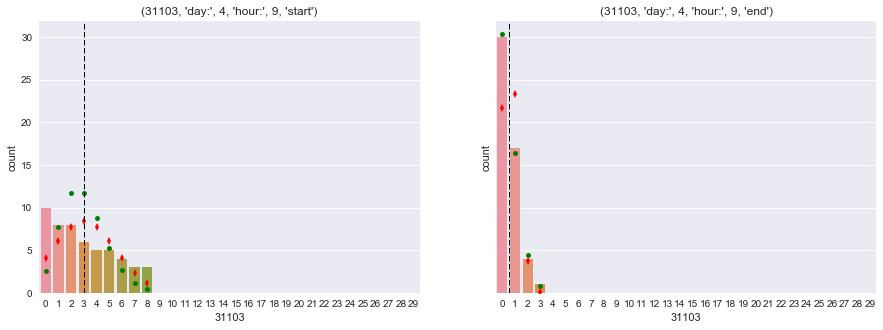

start mean: 1.9807692307692308
end mean: 0.25


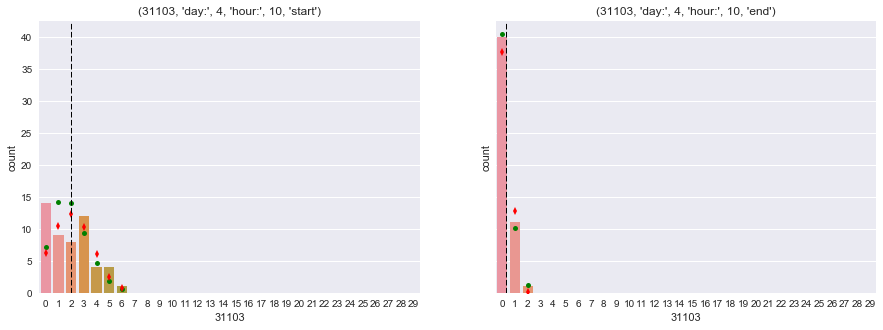

start mean: 2.1346153846153846
end mean: 0.6346153846153846


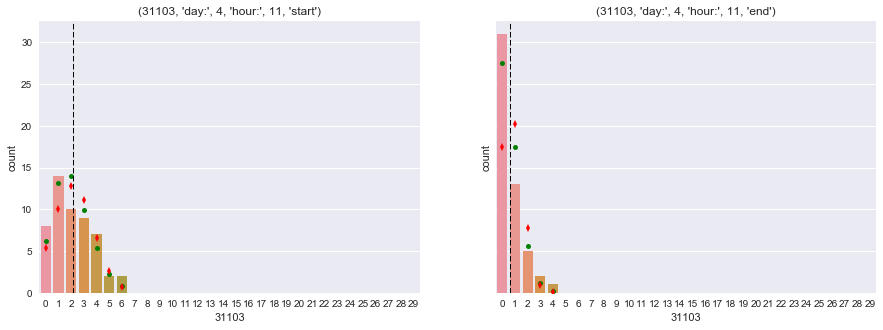

start mean: 1.5192307692307692
end mean: 0.4230769230769231


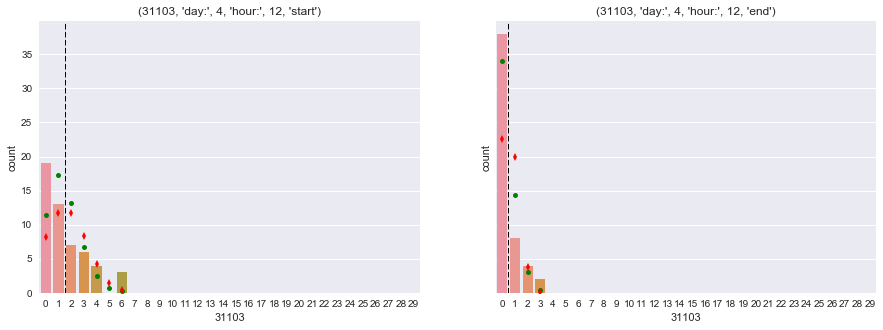

start mean: 1.8653846153846154
end mean: 0.6923076923076923


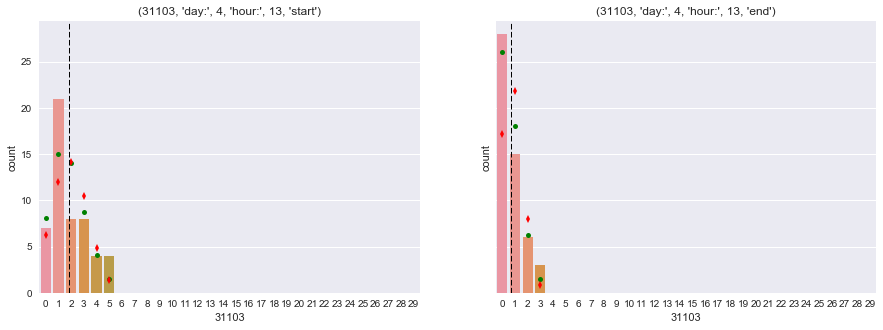

start mean: 1.5961538461538463
end mean: 0.75


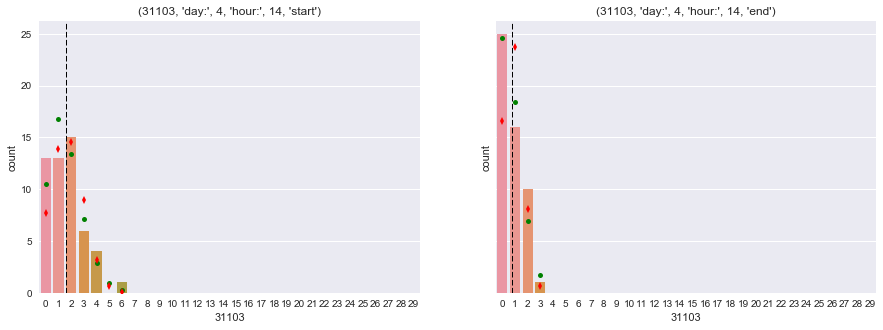

start mean: 1.8269230769230769
end mean: 1.1153846153846154


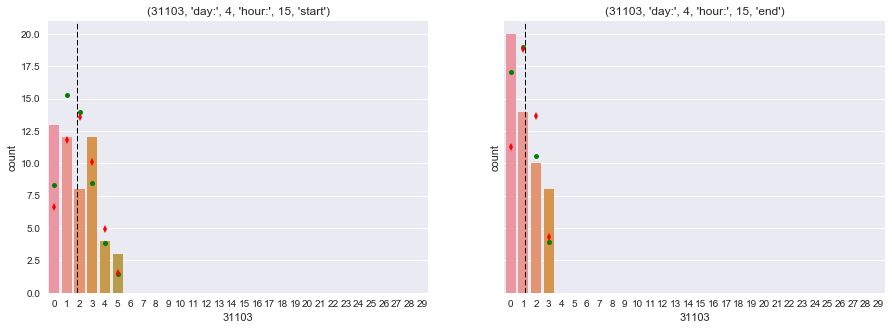

start mean: 2.0576923076923075
end mean: 2.0


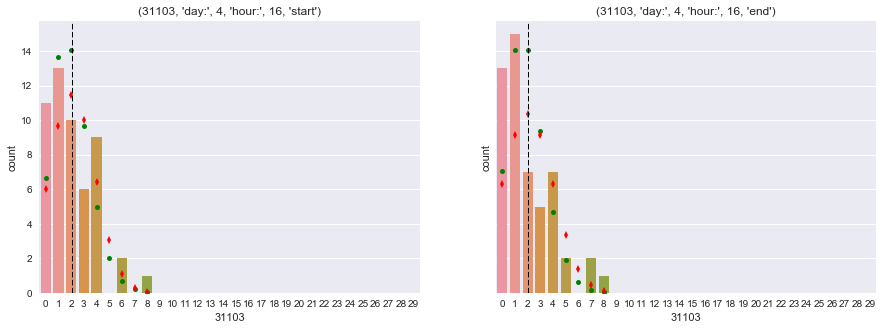

start mean: 2.8653846153846154
end mean: 3.6346153846153846


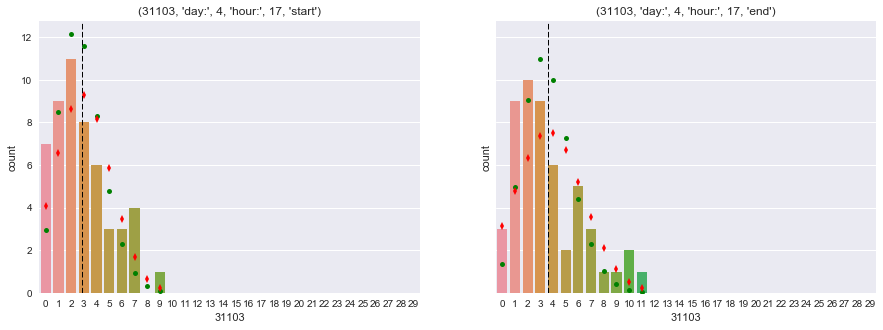

start mean: 4.153846153846154
end mean: 3.3653846153846154


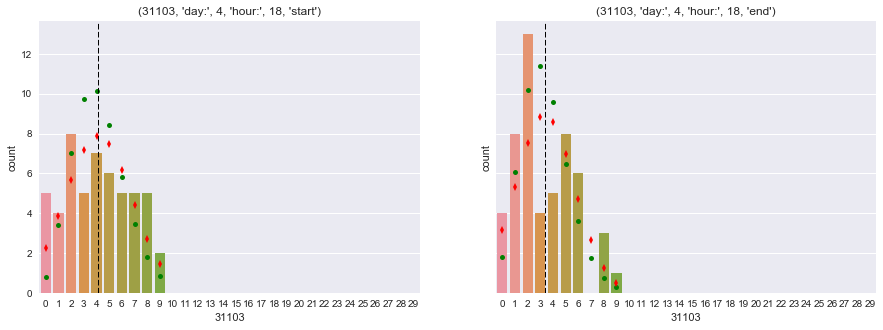

start mean: 3.3846153846153846
end mean: 2.3846153846153846


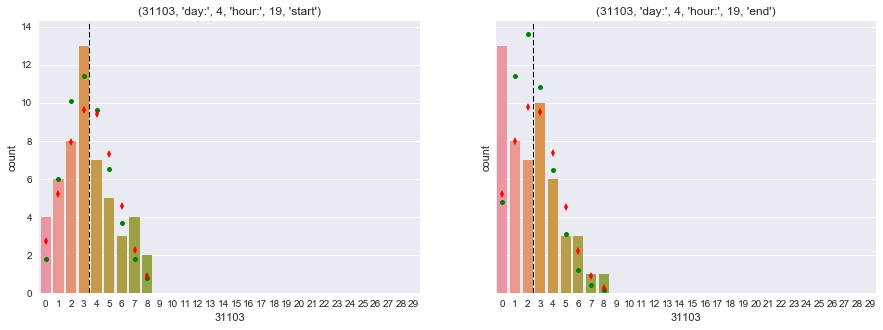

start mean: 2.5576923076923075
end mean: 2.173076923076923


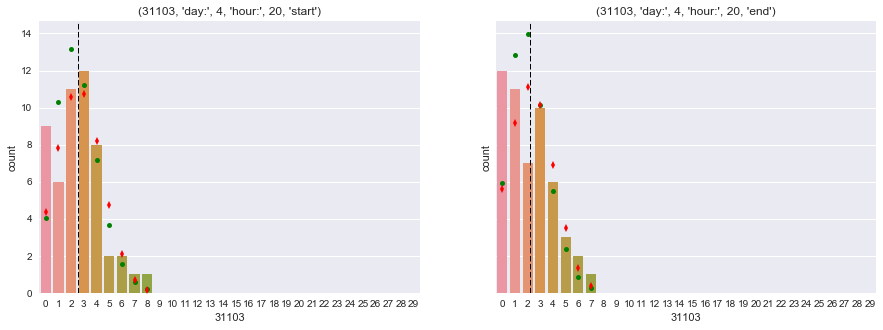

start mean: 2.4423076923076925
end mean: 2.1153846153846154


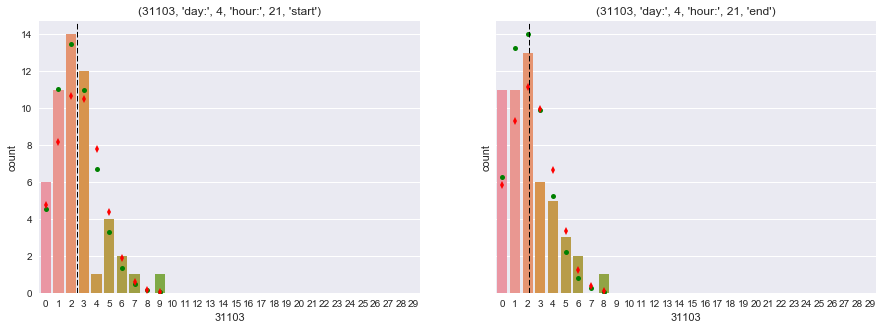

start mean: 2.2115384615384617
end mean: 2.0384615384615383


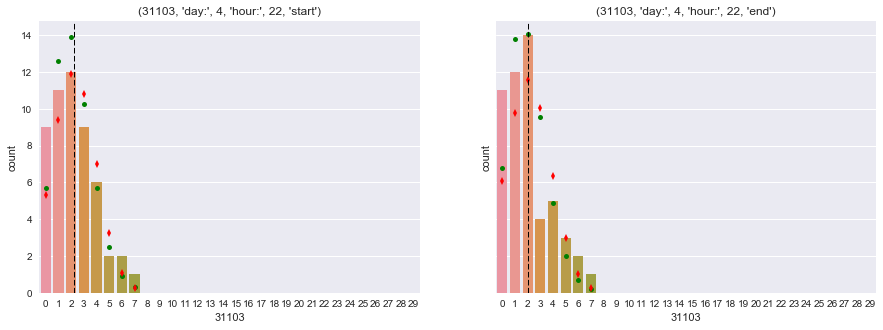

start mean: 2.0576923076923075
end mean: 1.9038461538461537


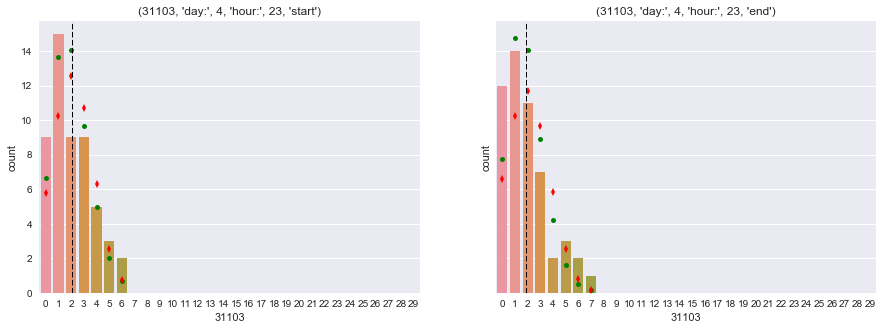

start mean: 1.3942307692307692
end mean: 1.7115384615384615


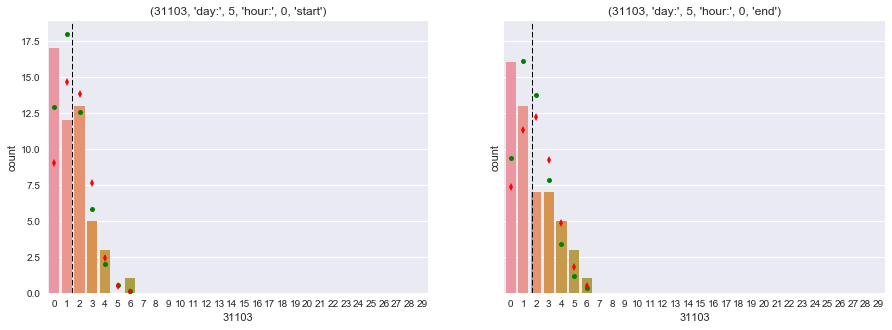

start mean: 1.1346153846153846
end mean: 1.1923076923076923


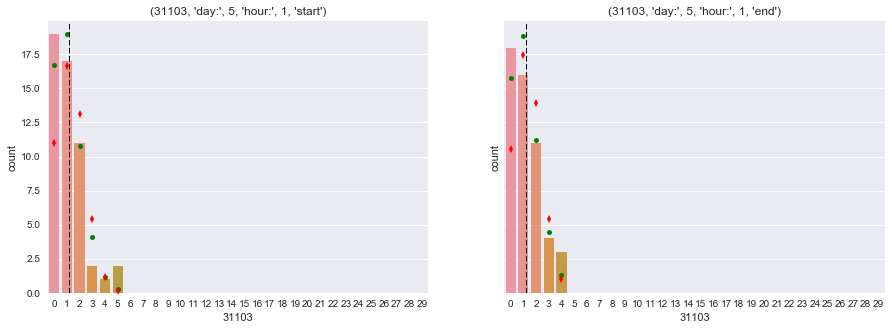

start mean: 0.9326923076923077
end mean: 0.9038461538461539


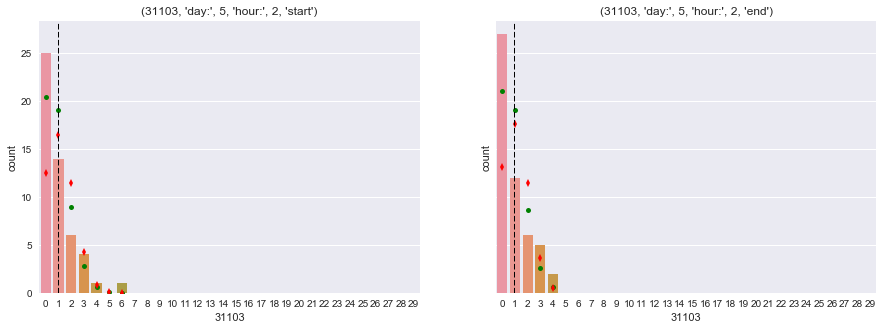

start mean: 0.6057692307692307
end mean: 0.38461538461538464


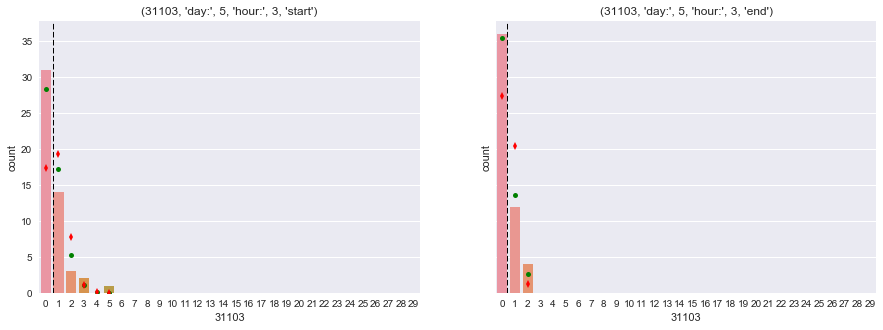

start mean: 0.16346153846153846
end mean: 0.07692307692307693


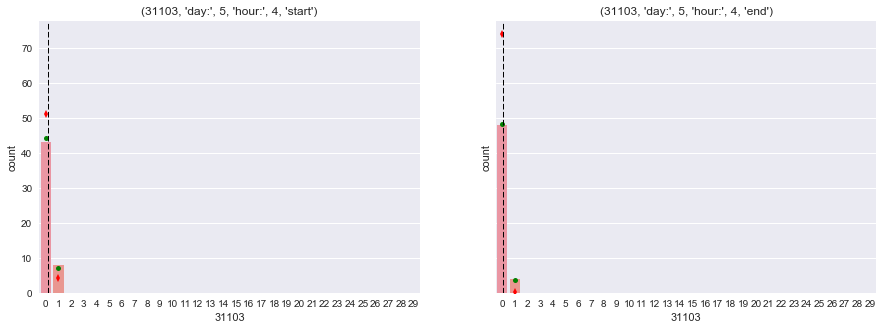

start mean: 0.08
end mean: 0.058823529411764705


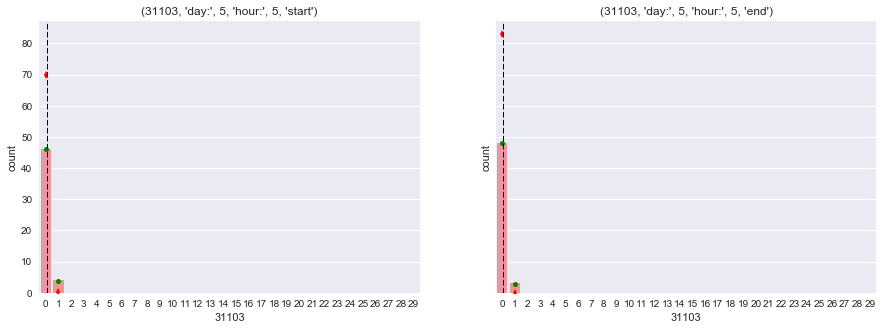

start mean: 0.28846153846153844
end mean: 0.057692307692307696


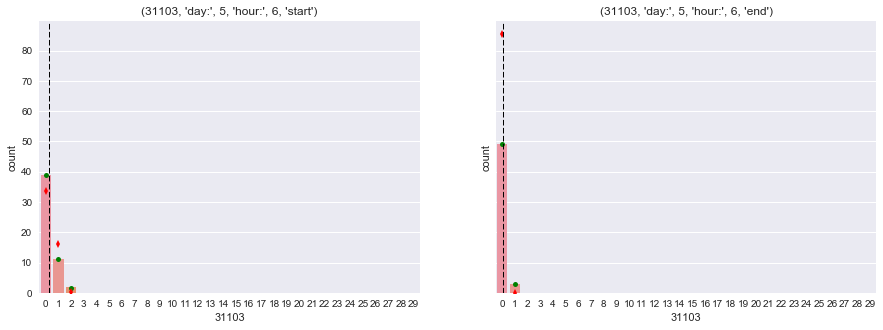

start mean: 1.5288461538461537
end mean: 0.11538461538461539


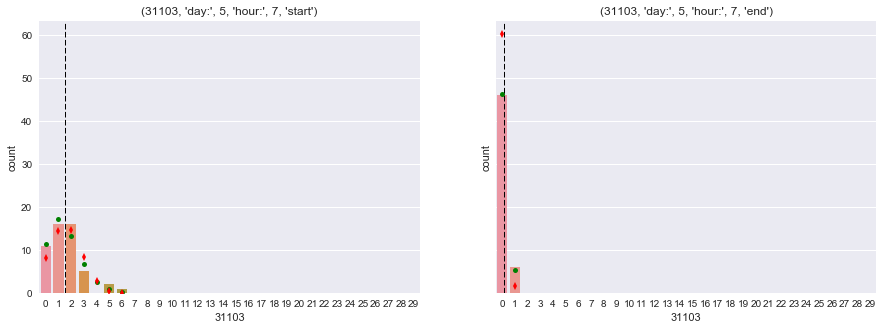

start mean: 1.625
end mean: 0.5961538461538461


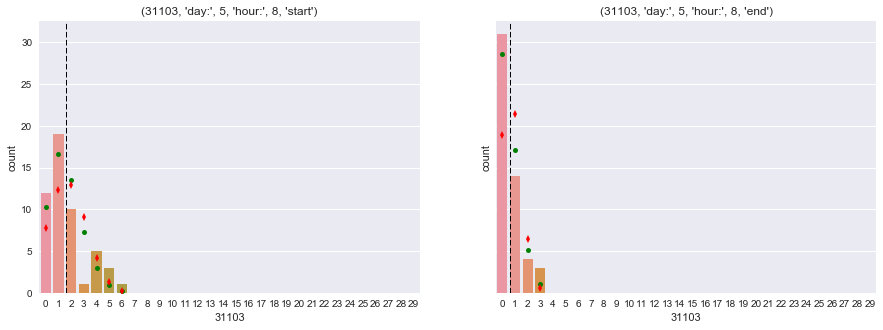

start mean: 3.480769230769231
end mean: 1.2788461538461537


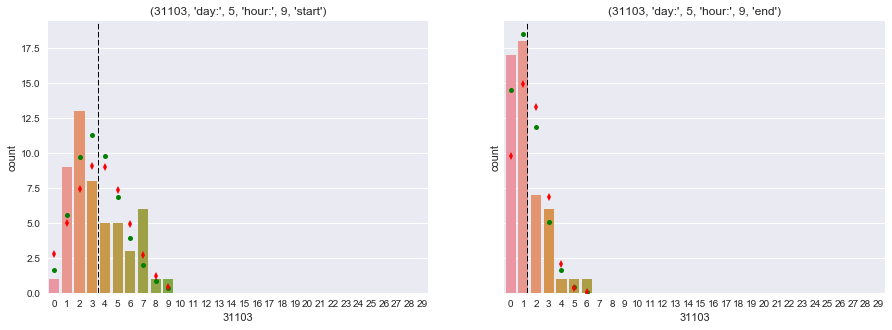

start mean: 4.0673076923076925
end mean: 1.1634615384615385


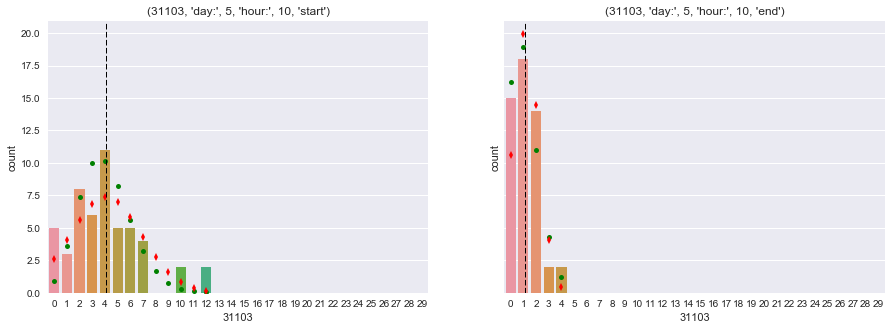

start mean: 4.096153846153846
end mean: 1.8076923076923077


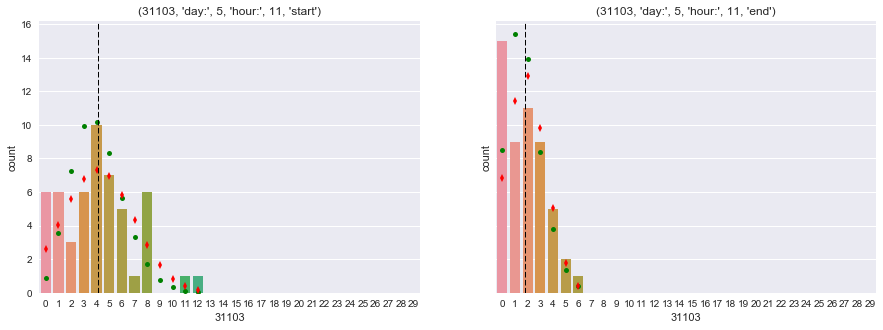

start mean: 4.855769230769231
end mean: 1.7692307692307692


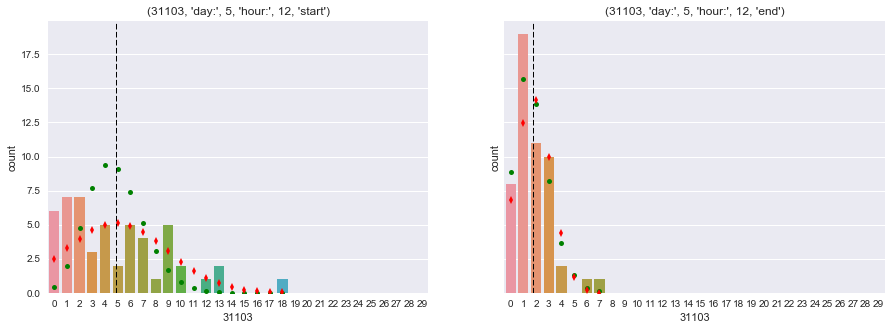

start mean: 4.134615384615385
end mean: 1.8846153846153846


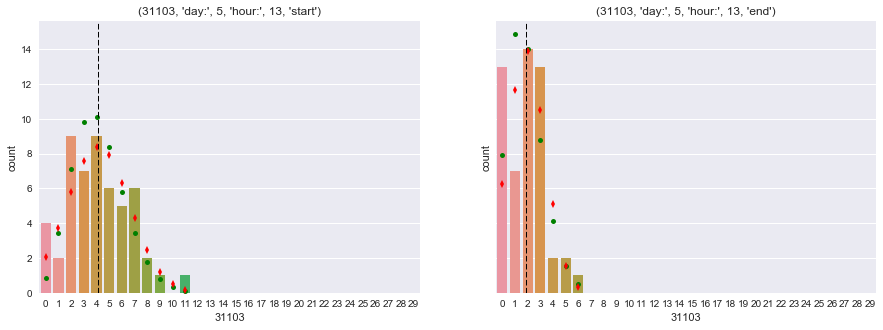

start mean: 3.076923076923077
end mean: 1.5576923076923077


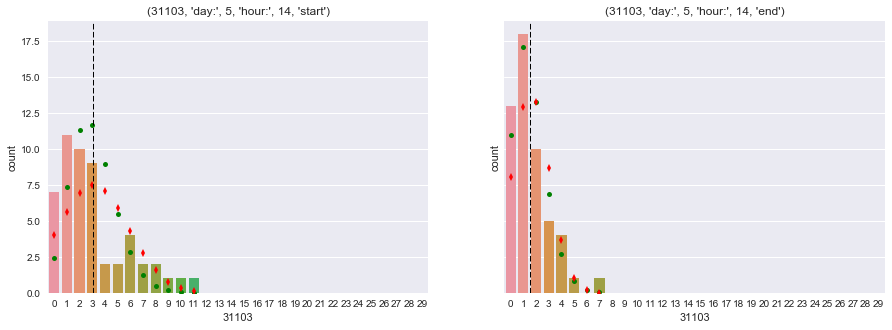

start mean: 2.6153846153846154
end mean: 2.076923076923077


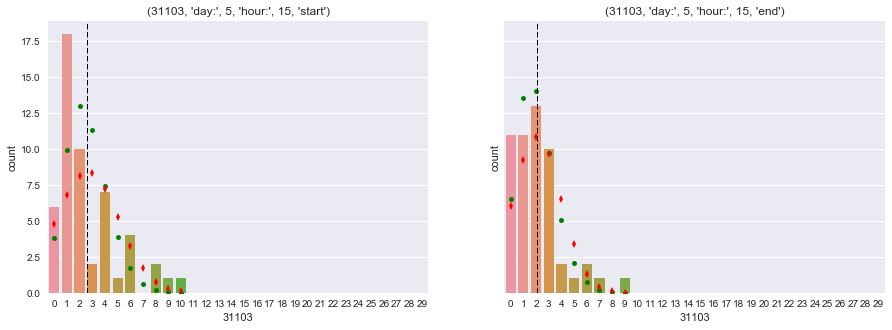

start mean: 2.7884615384615383
end mean: 1.9038461538461537


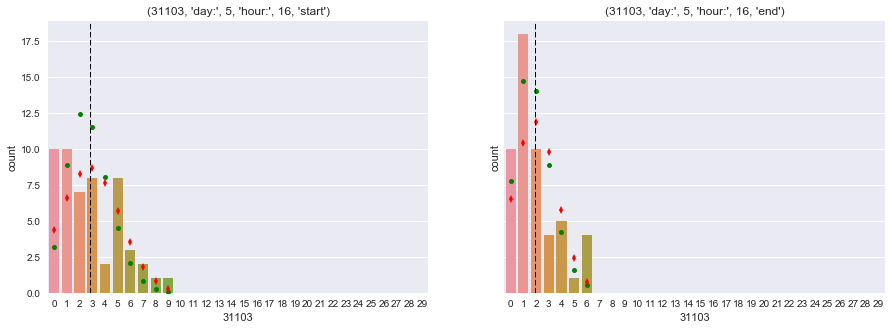

start mean: 3.2211538461538463
end mean: 2.4615384615384617


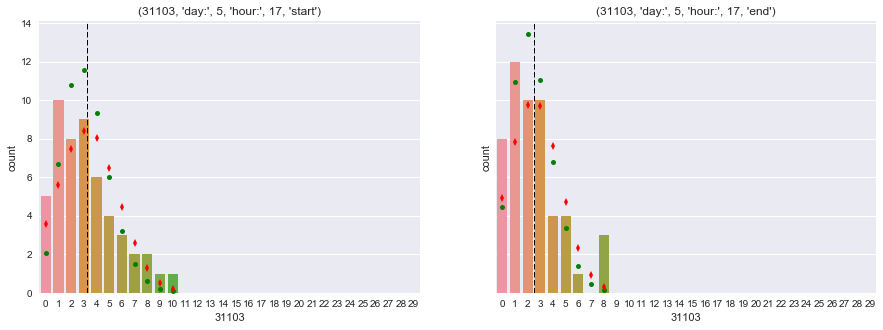

start mean: 3.4901960784313726
end mean: 1.9615384615384615


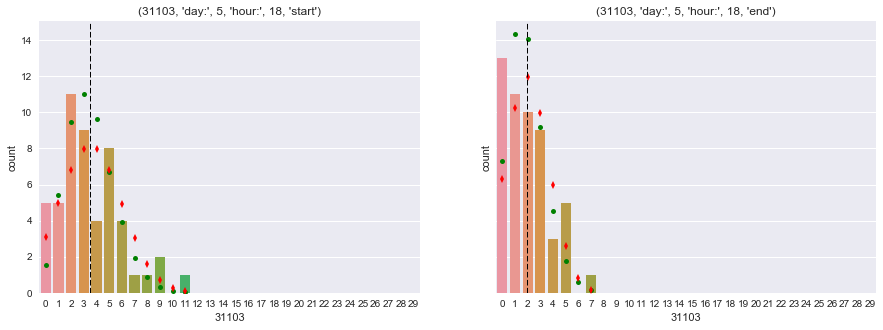

start mean: 2.6176470588235294
end mean: 2.105769230769231


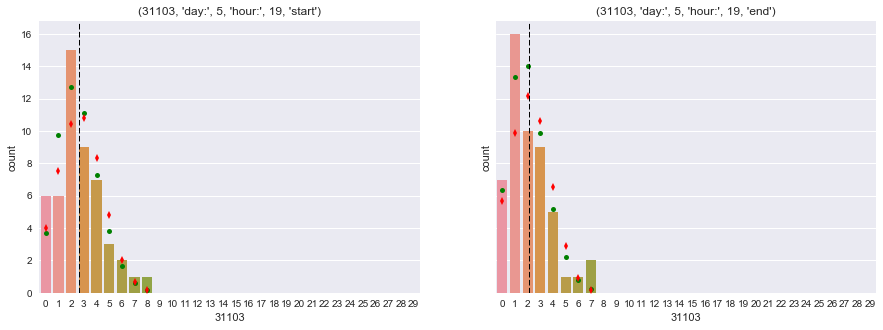

start mean: 2.4901960784313726
end mean: 1.6568627450980393


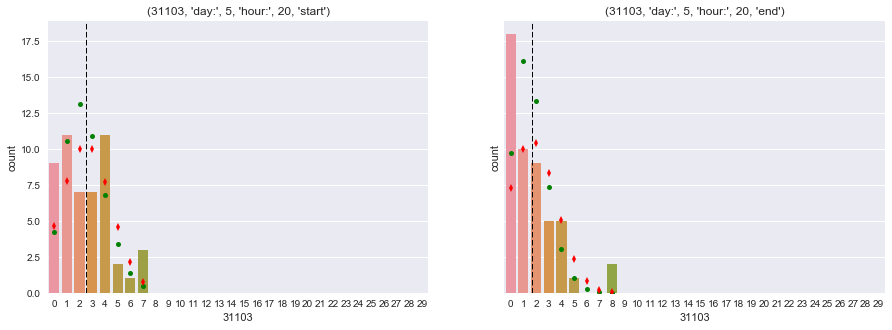

start mean: 2.372549019607843
end mean: 1.7941176470588236


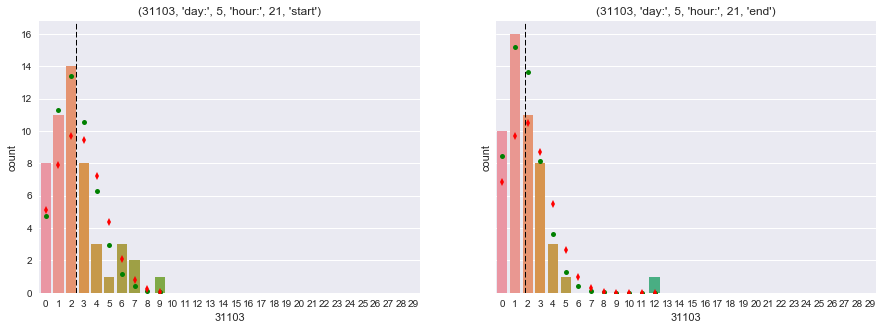

start mean: 2.1862745098039214
end mean: 1.7254901960784315


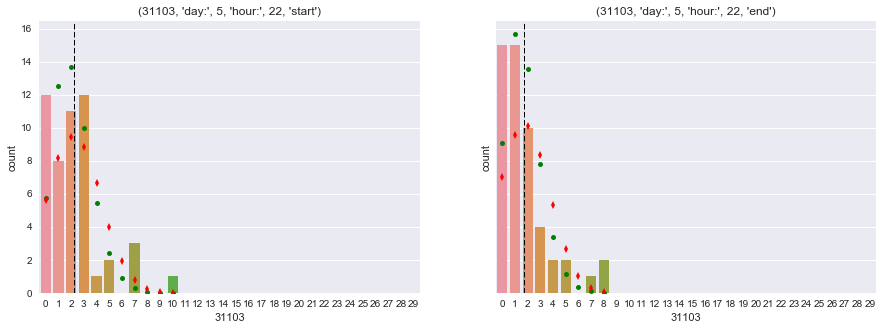

start mean: 1.9215686274509804
end mean: 1.7058823529411764


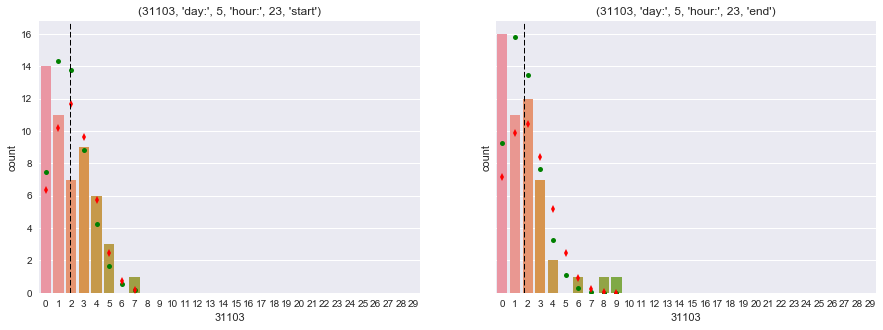

start mean: 1.803921568627451
end mean: 1.5980392156862746


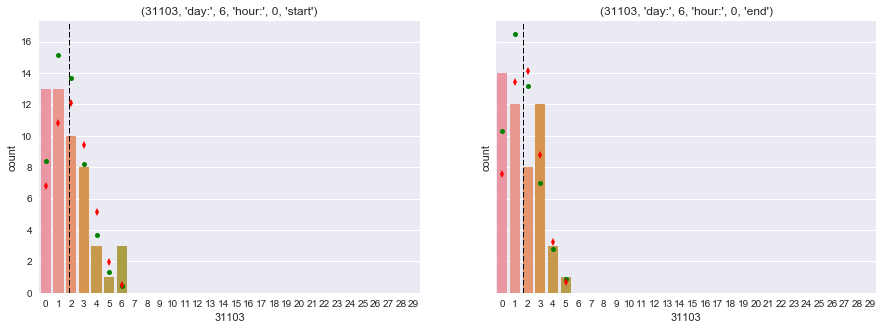

start mean: 1.3529411764705883
end mean: 1.2156862745098038


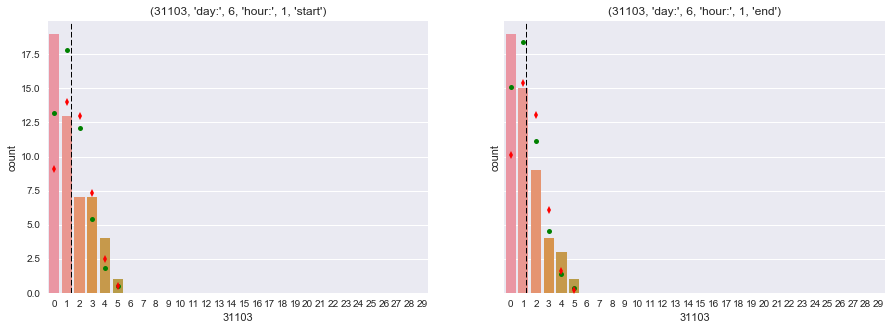

start mean: 1.3
end mean: 0.94


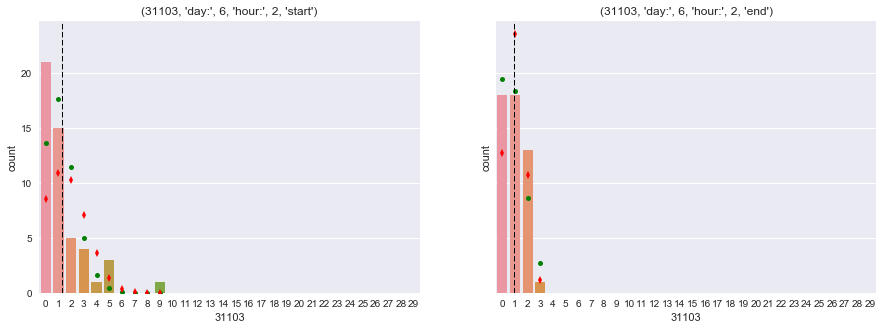

start mean: 0.47058823529411764
end mean: 0.43137254901960786


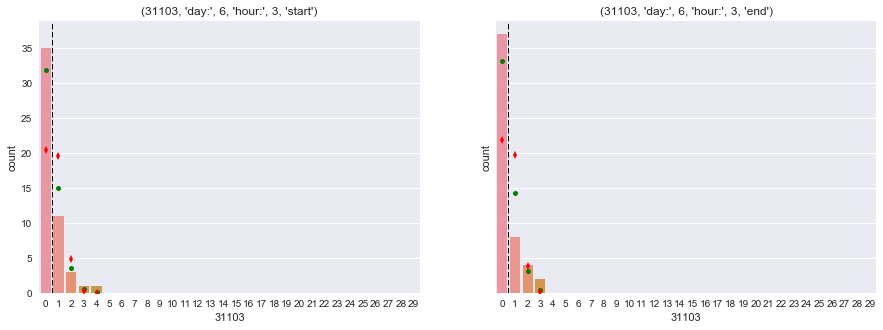

start mean: 0.14285714285714285
end mean: 0.14


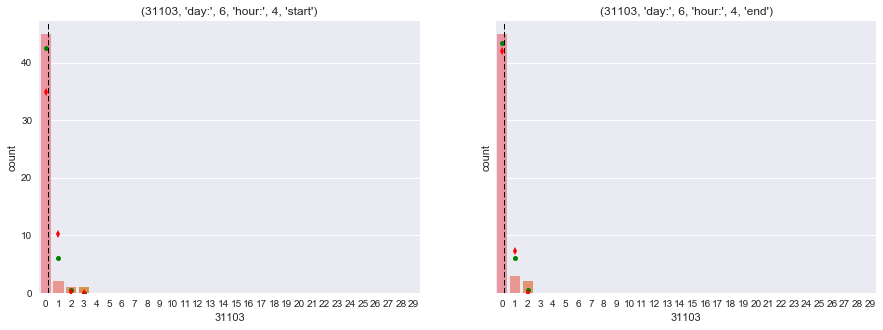

start mean: 0.06666666666666667
end mean: 0.022222222222222223


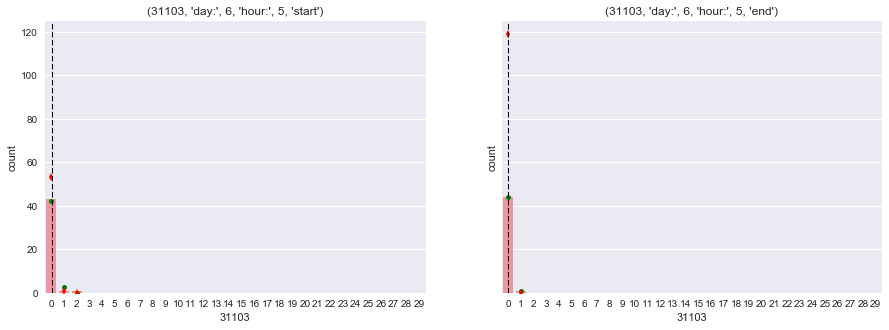

start mean: 0.22
end mean: 0.09803921568627451


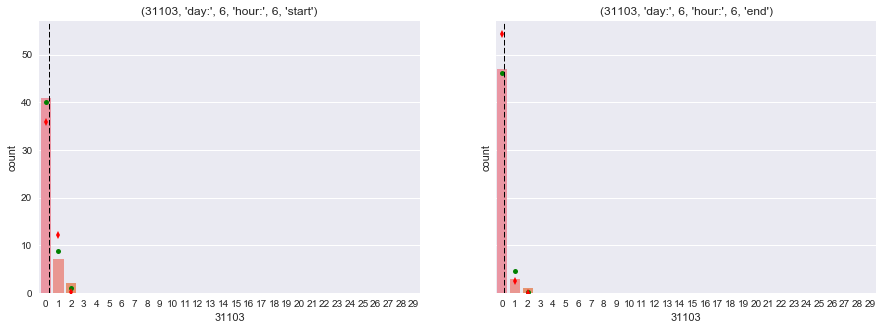

start mean: 0.8653846153846154
end mean: 0.17647058823529413


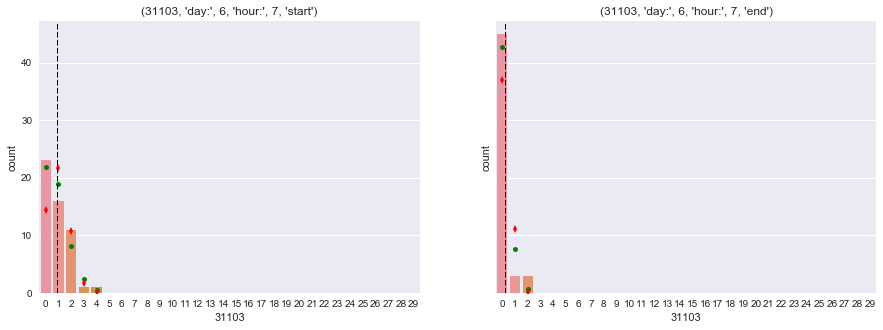

start mean: 1.4807692307692308
end mean: 0.75


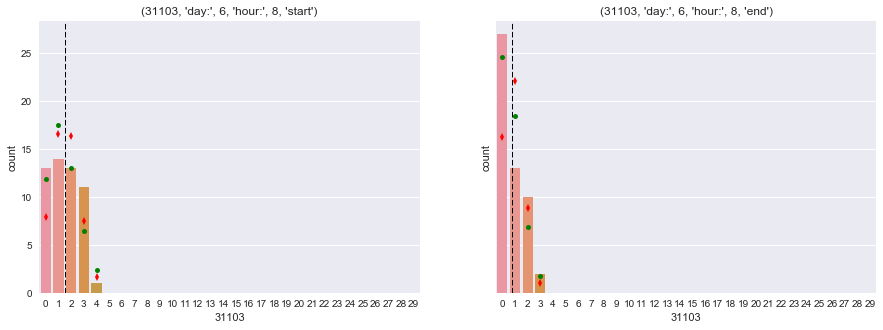

start mean: 3.230769230769231
end mean: 1.5


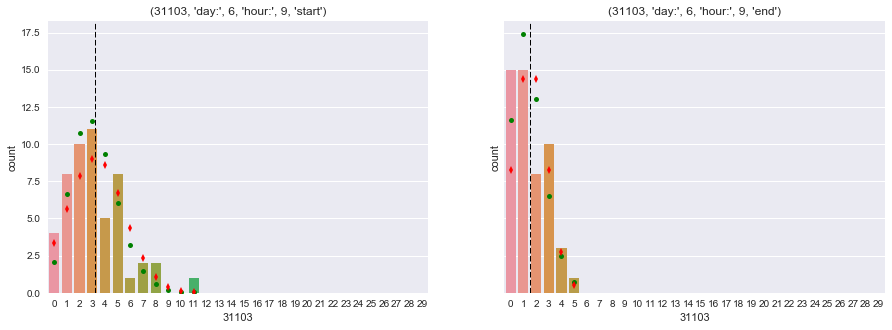

start mean: 4.8076923076923075
end mean: 2.1153846153846154


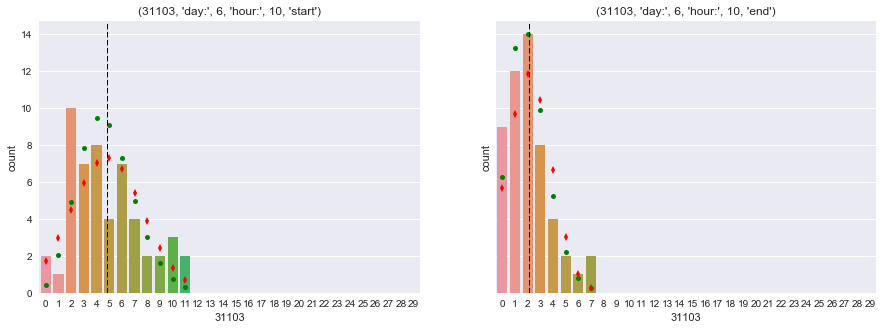

start mean: 5.538461538461538
end mean: 2.5961538461538463


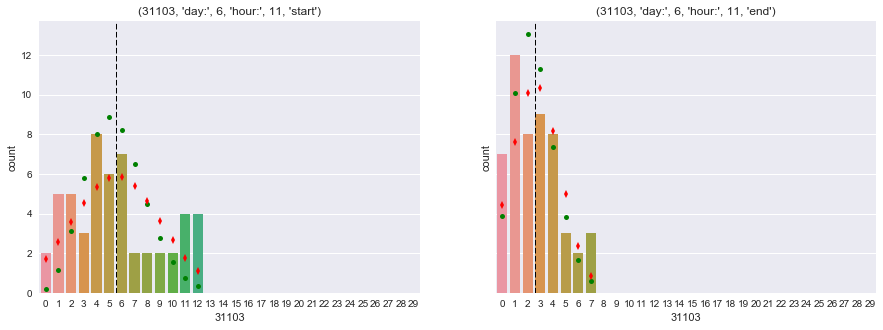

start mean: 5.6923076923076925
end mean: 1.8846153846153846


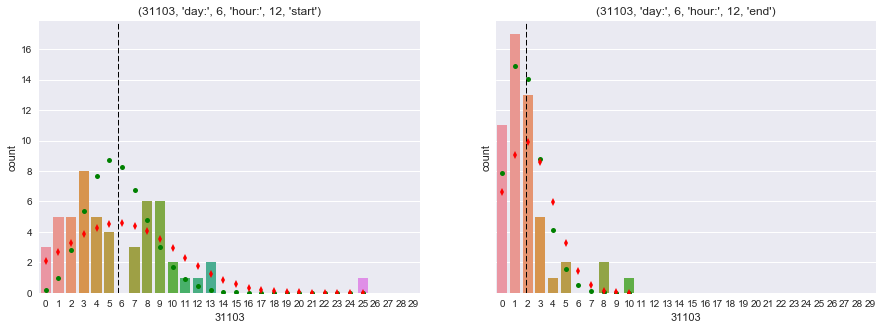

start mean: 4.596153846153846
end mean: 2.0


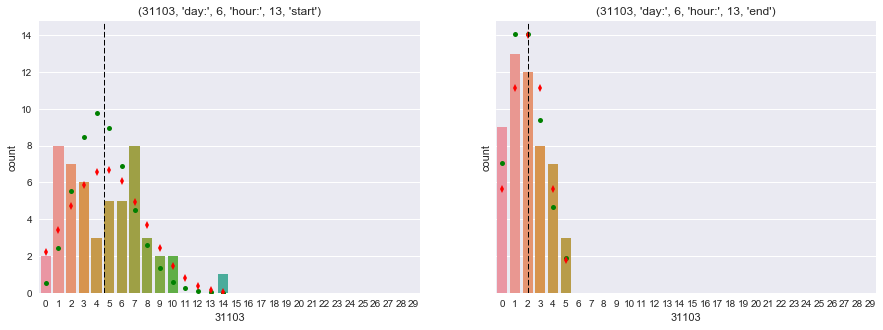

start mean: 3.4423076923076925
end mean: 2.1923076923076925


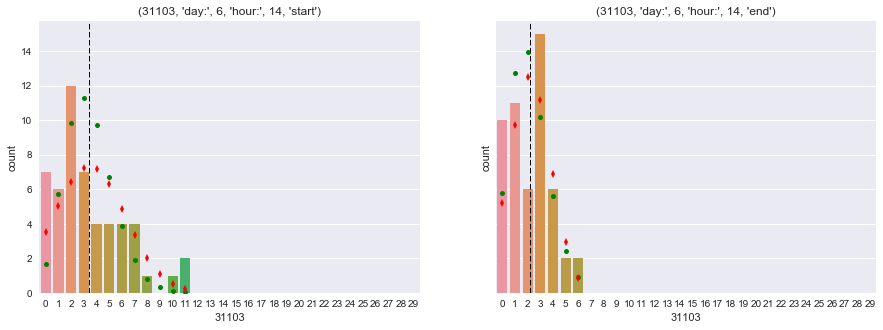

start mean: 2.8846153846153846
end mean: 2.0576923076923075


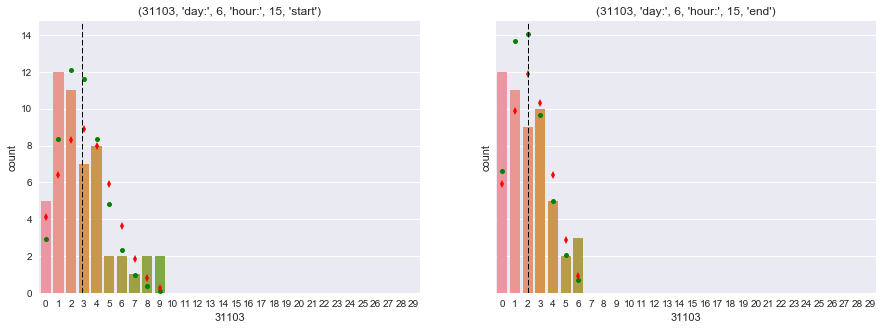

start mean: 2.980769230769231
end mean: 2.4038461538461537


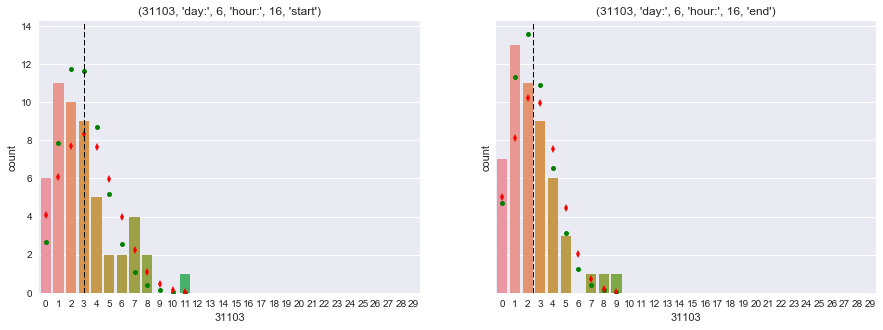

start mean: 3.0
end mean: 2.5576923076923075


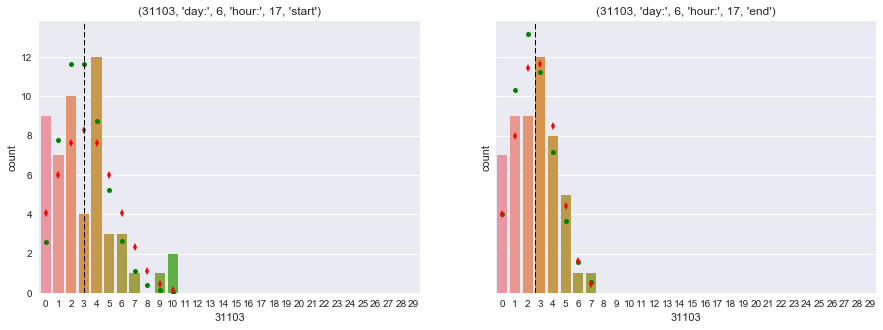

start mean: 3.519230769230769
end mean: 2.6346153846153846


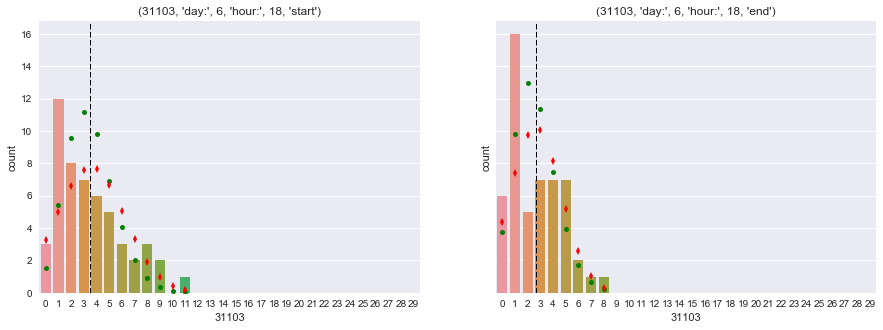

start mean: 3.4615384615384617
end mean: 2.0


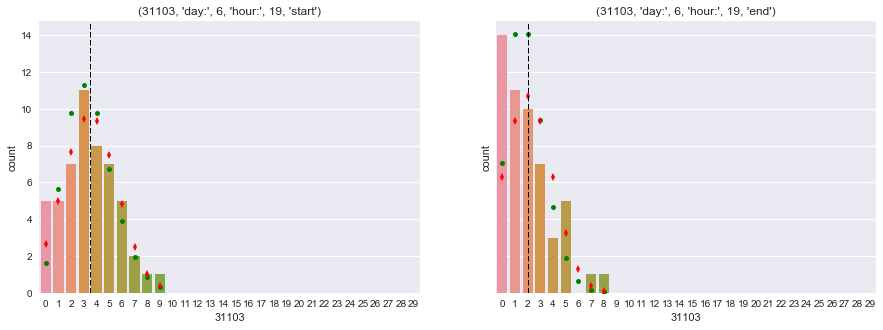

start mean: 2.076923076923077
end mean: 2.2115384615384617


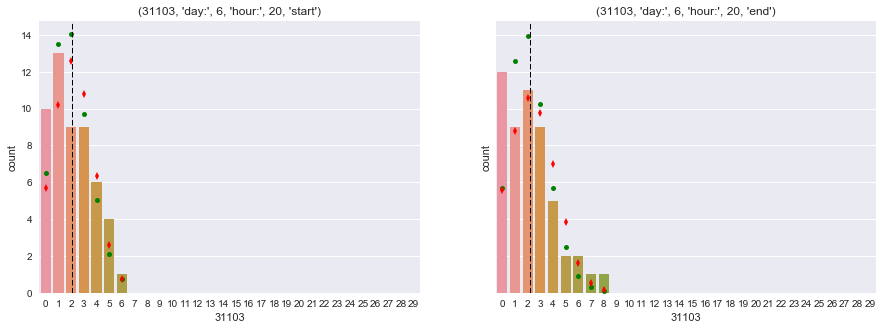

start mean: 2.019230769230769
end mean: 1.7692307692307692


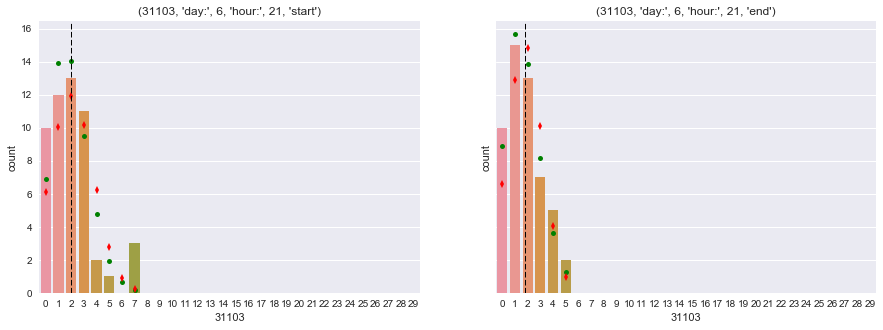

start mean: 1.5
end mean: 1.9423076923076923


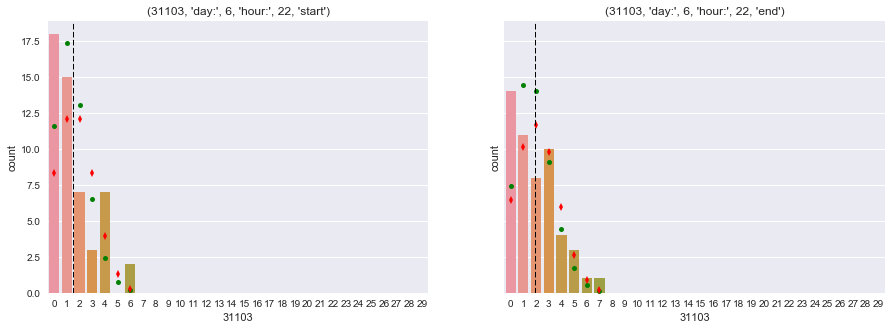

start mean: 1.25
end mean: 1.0


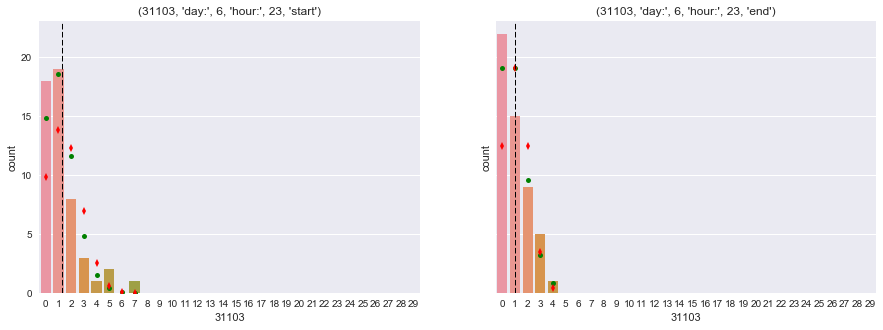

31200
start mean: 1.4038461538461537
end mean: 1.2115384615384615


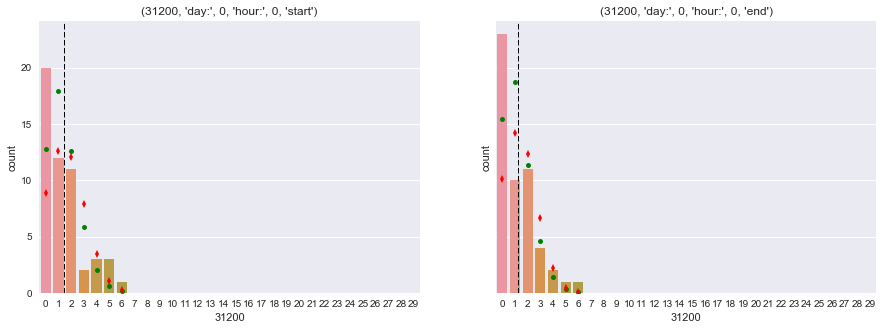

start mean: 0.6346153846153846
end mean: 0.9019607843137255


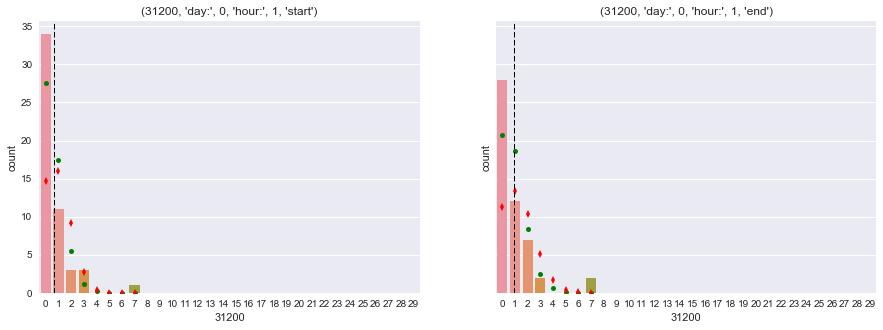

start mean: 0.425531914893617
end mean: 0.4375


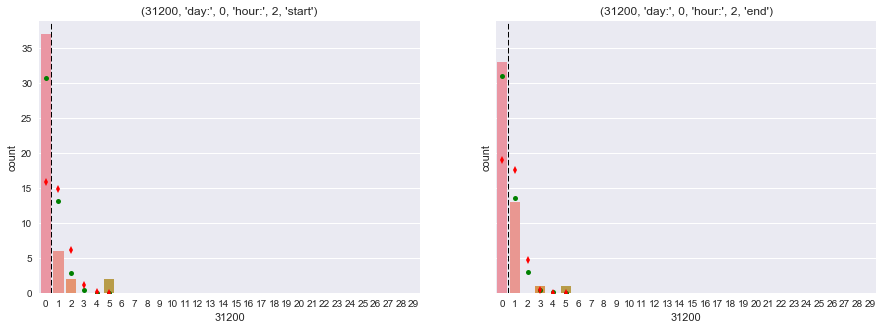

start mean: 0.20833333333333334
end mean: 0.08333333333333333


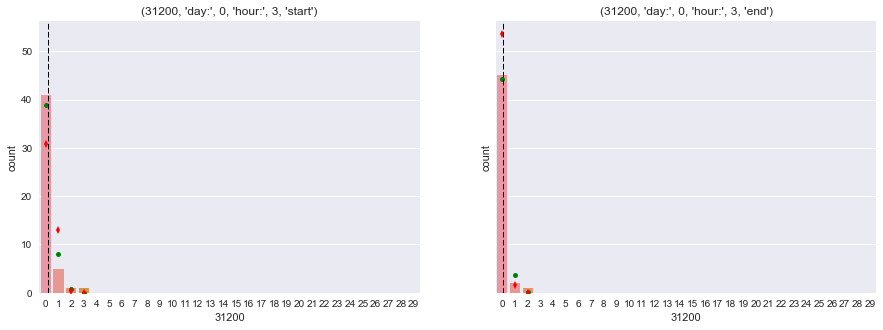

start mean: 0.14583333333333334
end mean: 0.19148936170212766


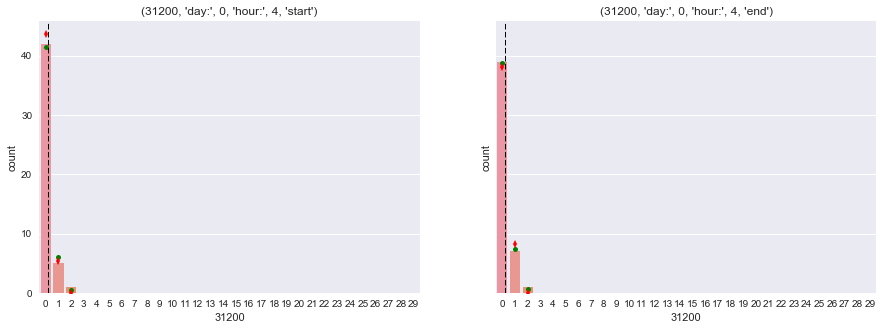

start mean: 0.15384615384615385
end mean: 0.39215686274509803


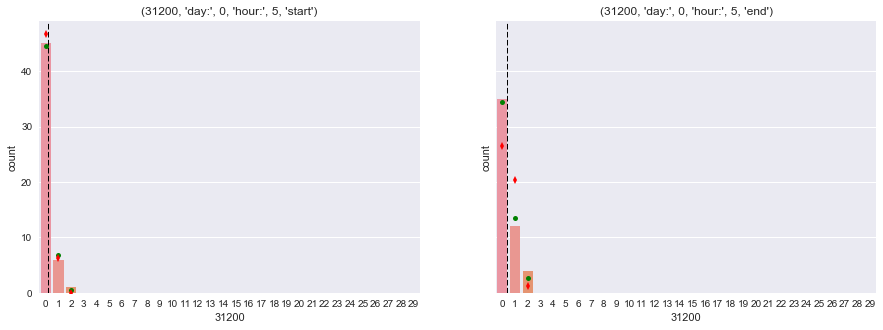

start mean: 1.5192307692307692
end mean: 1.75


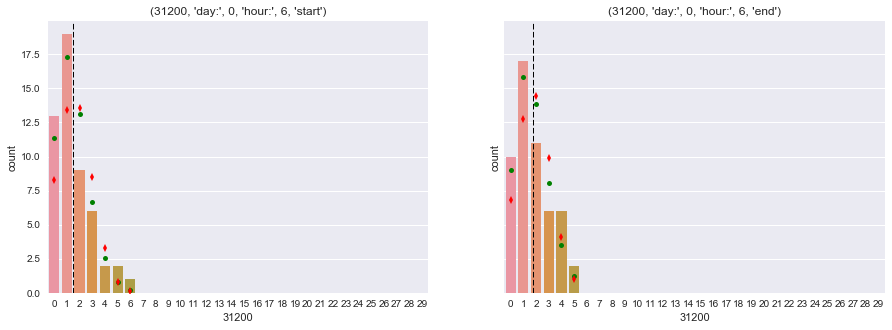

start mean: 2.7115384615384617
end mean: 7.403846153846154


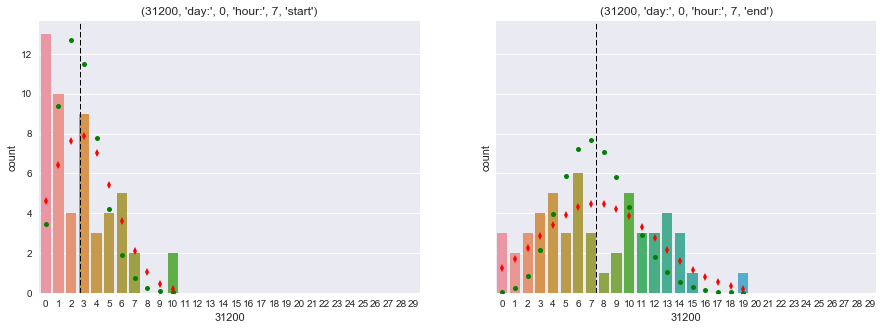

start mean: 10.346153846153847
end mean: 11.615384615384615


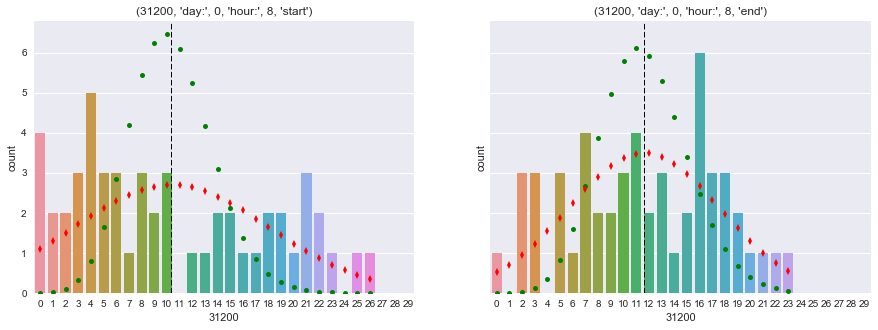

start mean: 8.48076923076923
end mean: 8.173076923076923


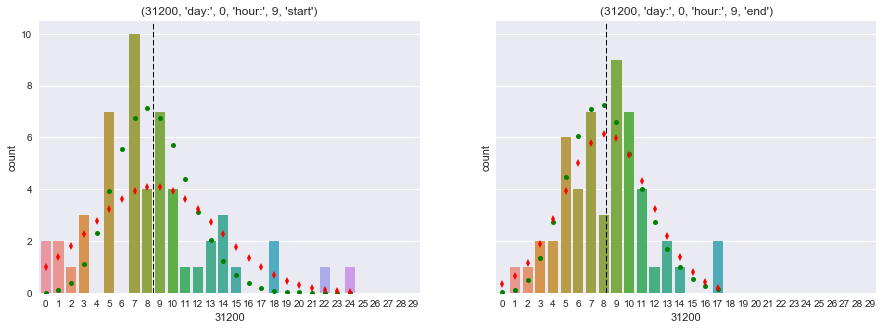

start mean: 5.3076923076923075
end mean: 5.346153846153846


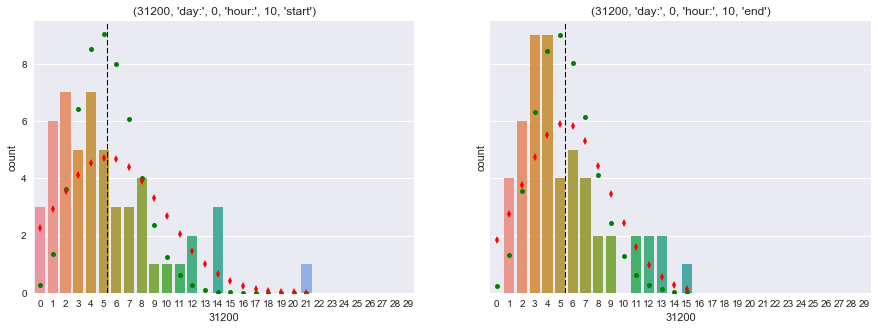

start mean: 5.0
end mean: 5.5


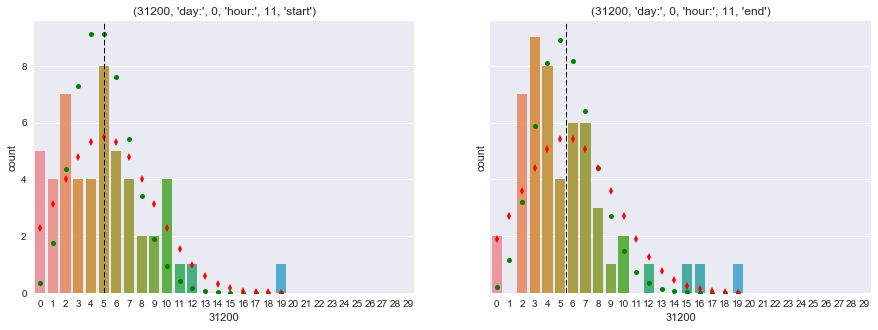

start mean: 6.019230769230769
end mean: 6.326923076923077


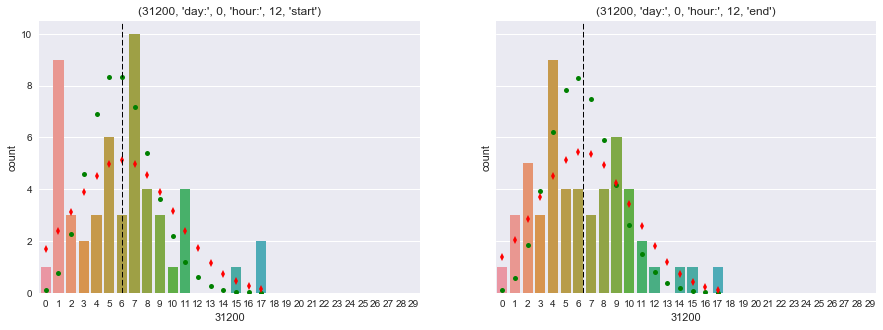

start mean: 6.019230769230769
end mean: 6.173076923076923


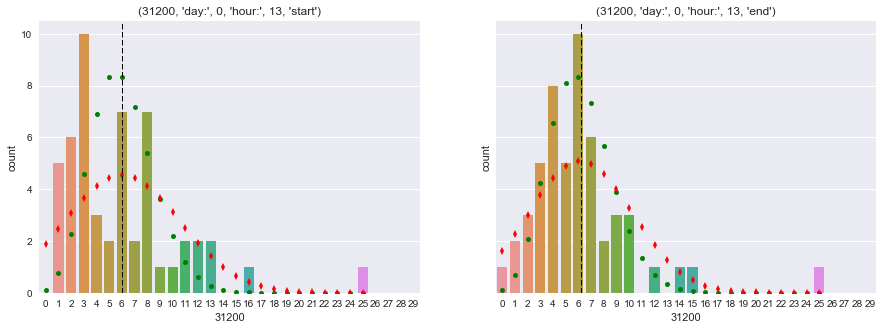

start mean: 5.365384615384615
end mean: 5.923076923076923


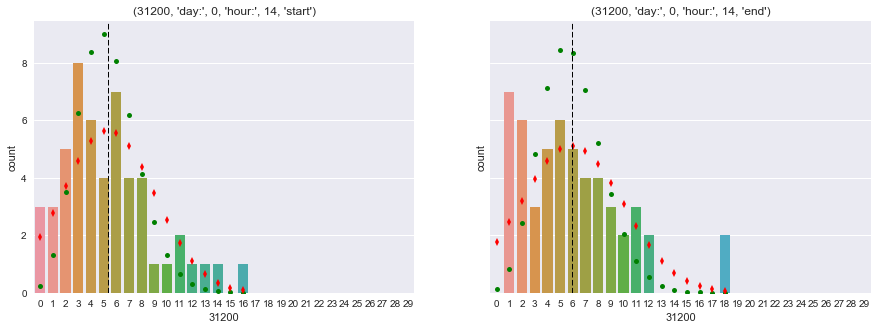

start mean: 5.711538461538462
end mean: 6.0576923076923075


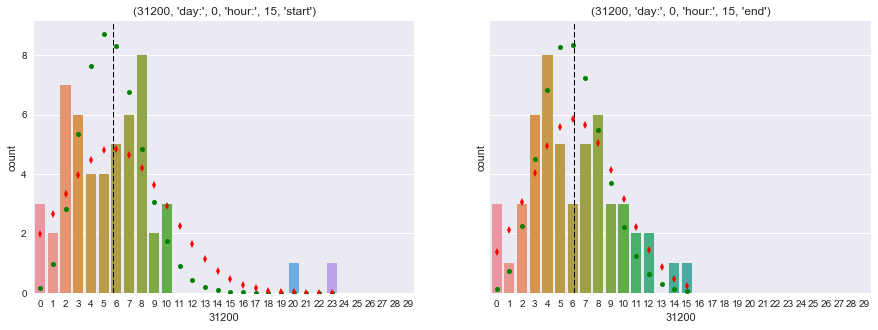

start mean: 6.346153846153846
end mean: 6.6923076923076925


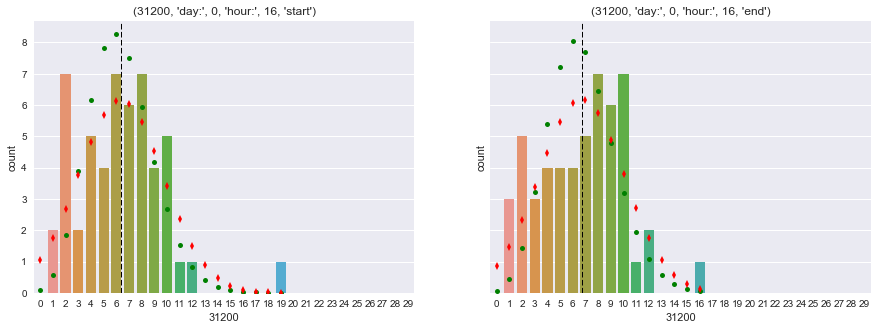

start mean: 14.038461538461538
end mean: 13.538461538461538


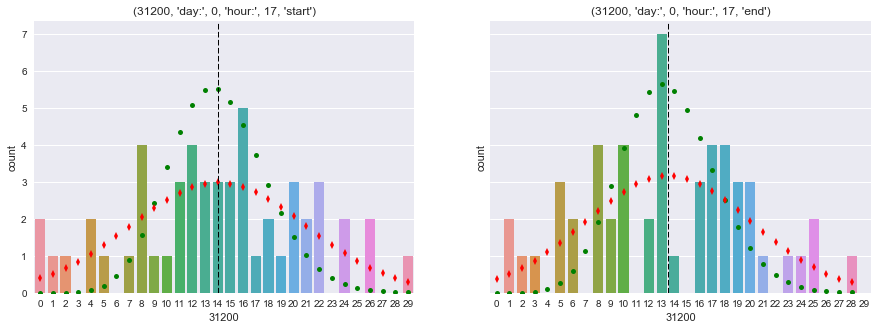

start mean: 16.846153846153847
end mean: 15.346153846153847


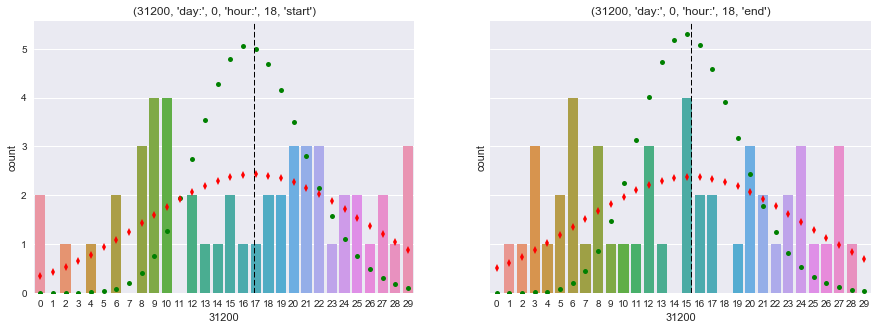

start mean: 11.788461538461538
end mean: 11.98076923076923


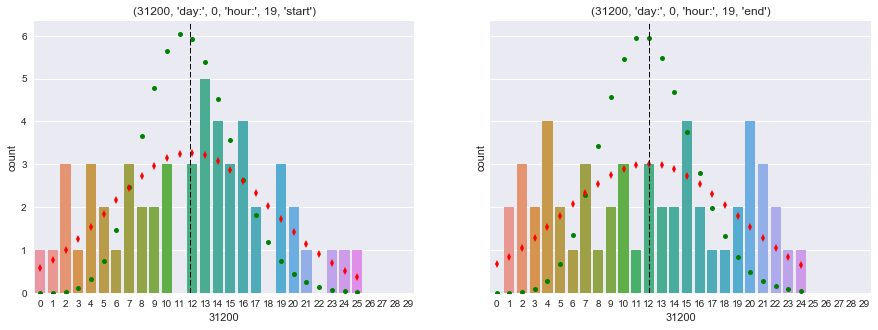

start mean: 8.98076923076923
end mean: 9.788461538461538


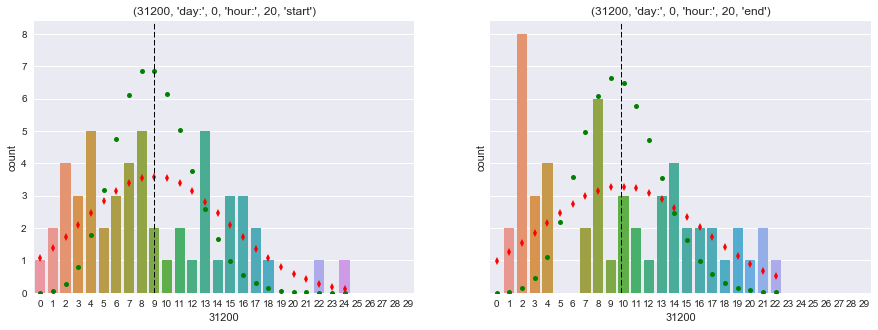

start mean: 8.211538461538462
end mean: 7.153846153846154


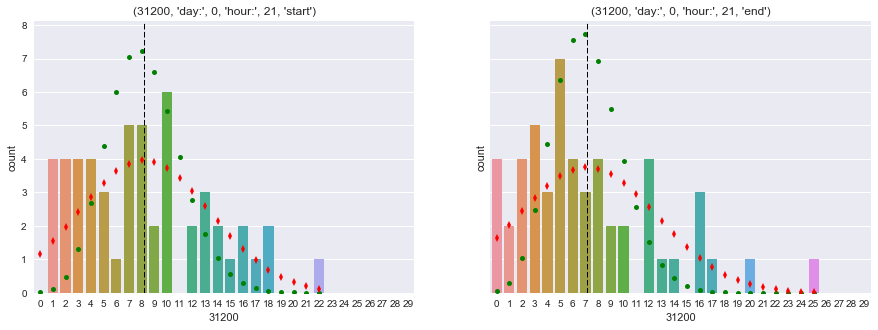

start mean: 5.3076923076923075
end mean: 4.8076923076923075


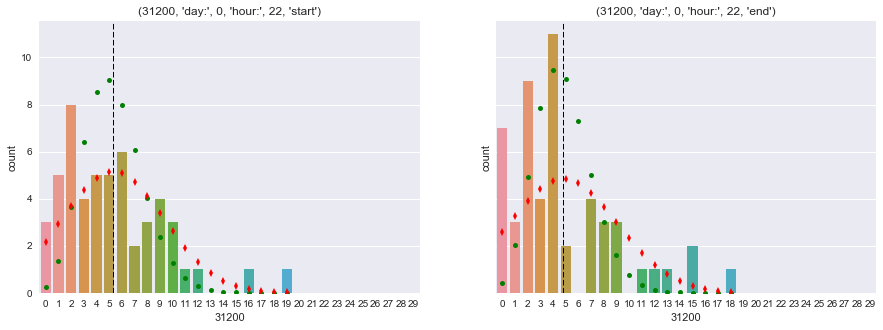

start mean: 2.8076923076923075
end mean: 3.3076923076923075


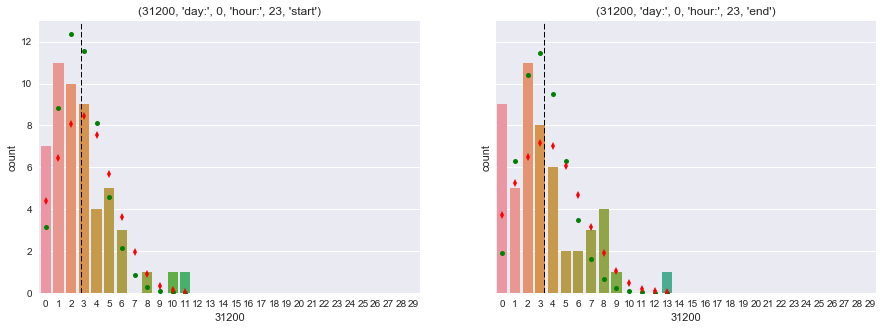

start mean: 1.42
end mean: 1.2156862745098038


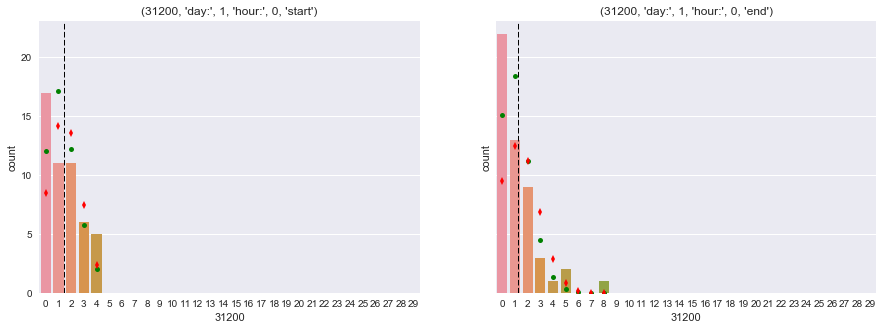

start mean: 0.5510204081632653
end mean: 0.32


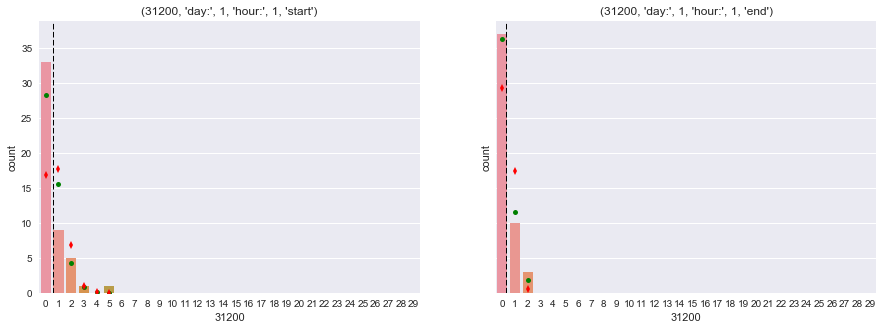

start mean: 0.26
end mean: 0.22448979591836735


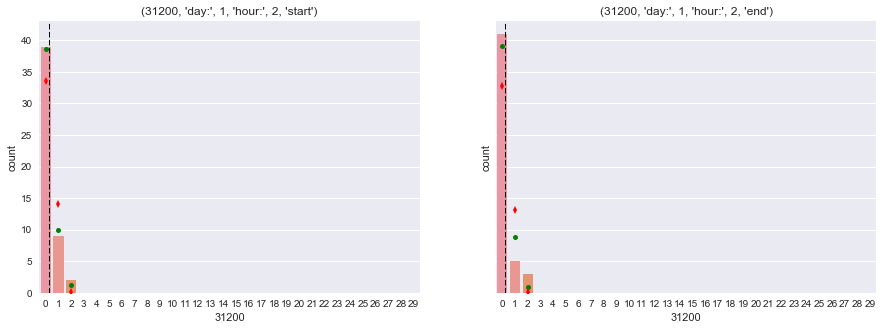

start mean: 0.044444444444444446
end mean: 0.13043478260869565


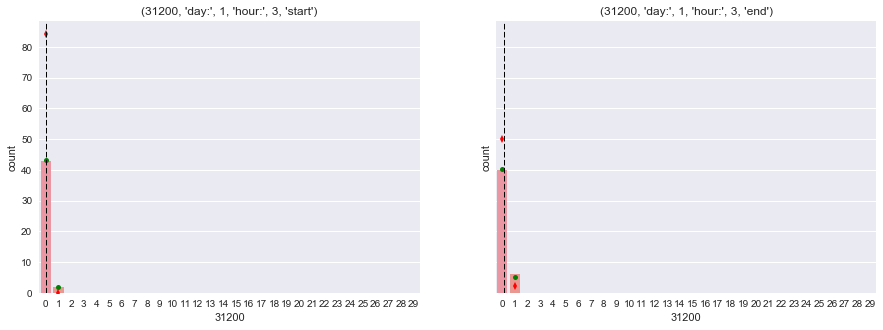

start mean: 0.041666666666666664
end mean: 0.2553191489361702


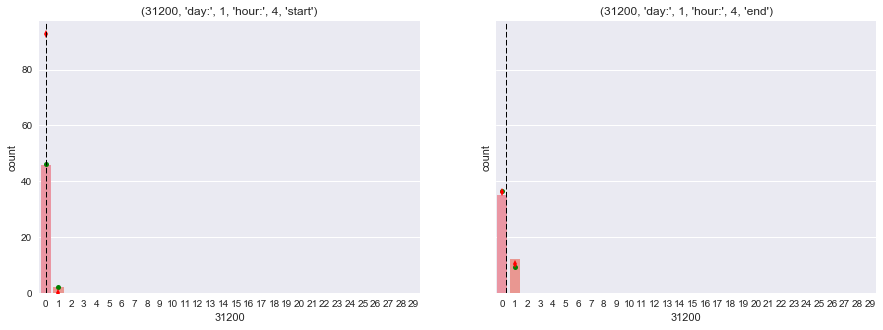

start mean: 0.1
end mean: 0.52


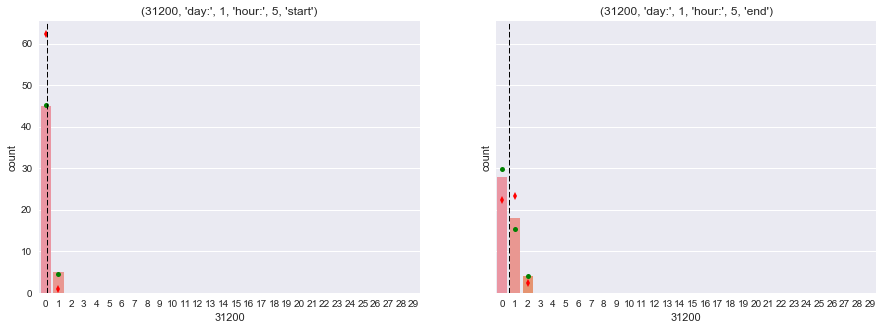

start mean: 1.607843137254902
end mean: 3.1372549019607843


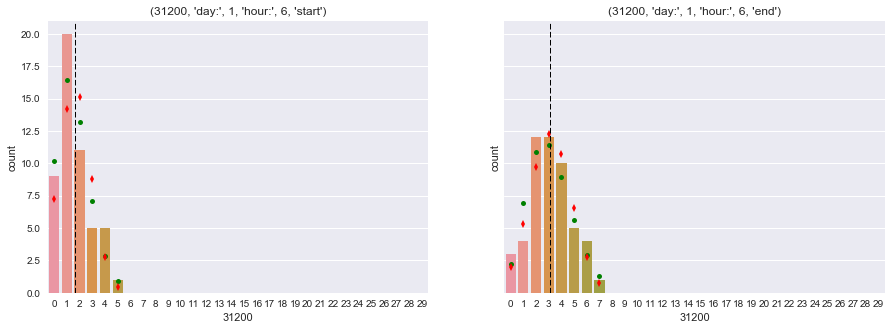

start mean: 3.6666666666666665
end mean: 10.0


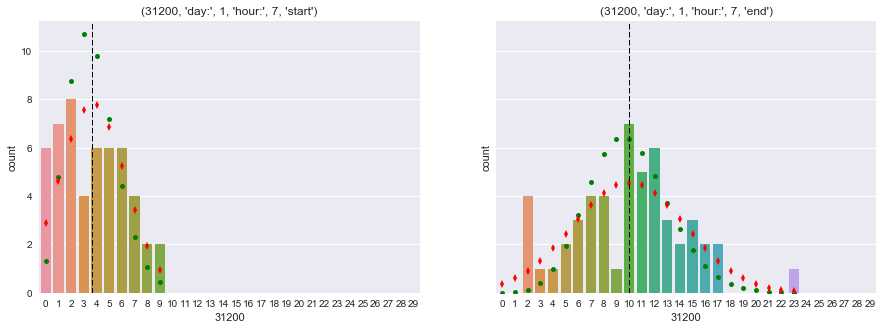

start mean: 11.92156862745098
end mean: 13.705882352941176


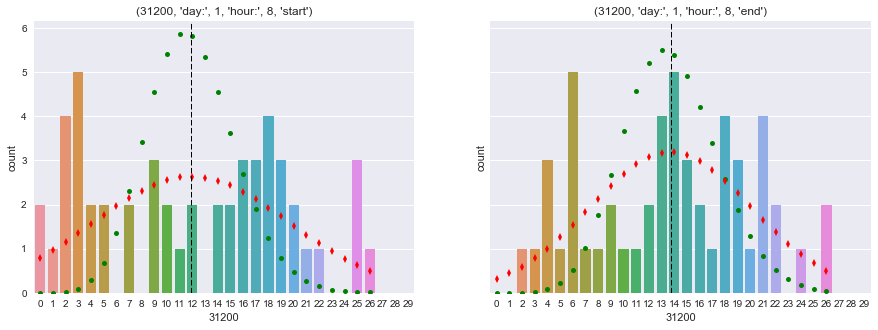

start mean: 8.745098039215685
end mean: 8.72549019607843


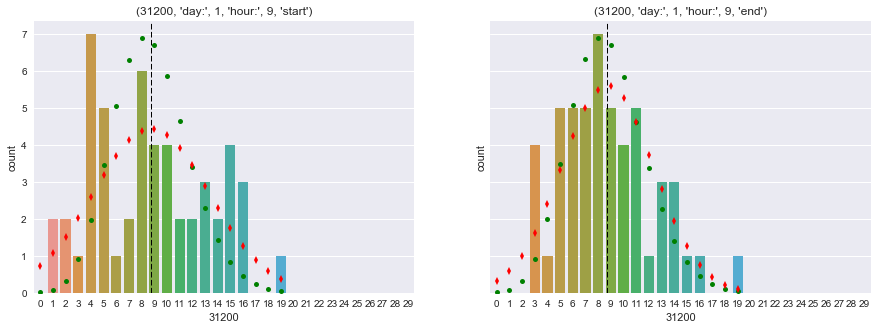

start mean: 4.647058823529412
end mean: 4.784313725490196


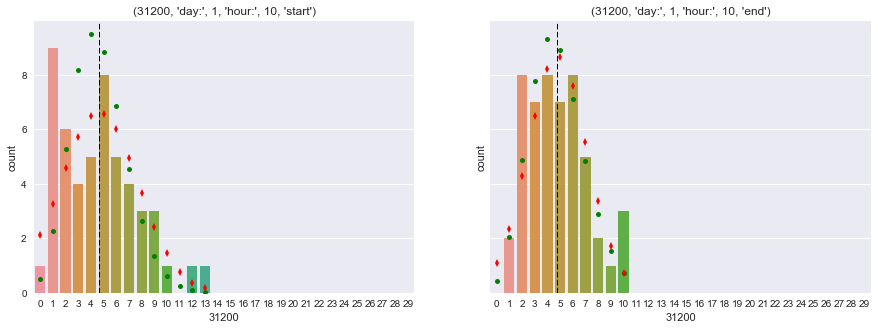

start mean: 3.372549019607843
end mean: 4.823529411764706


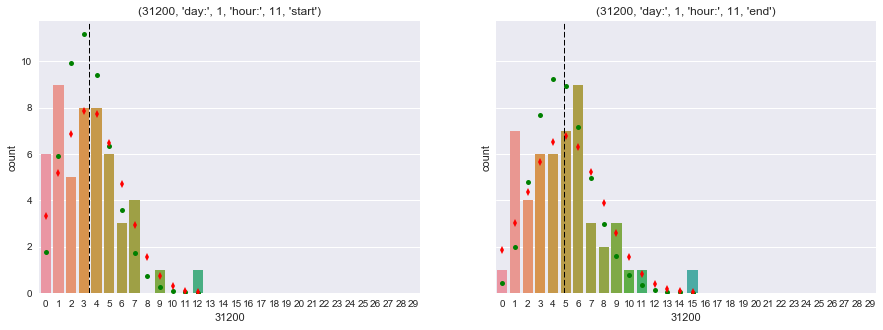

start mean: 4.615384615384615
end mean: 5.9411764705882355


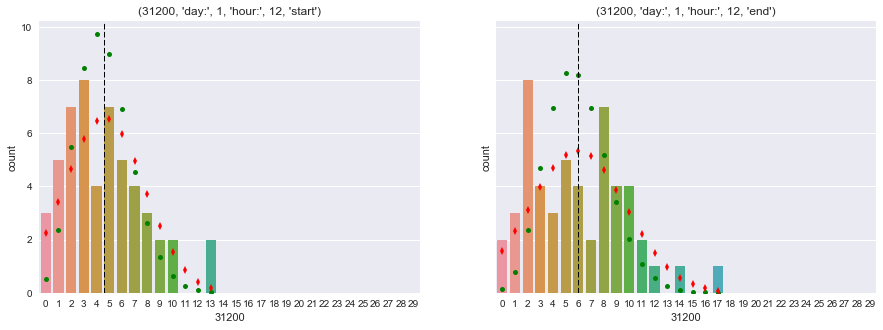

start mean: 5.596153846153846
end mean: 5.865384615384615


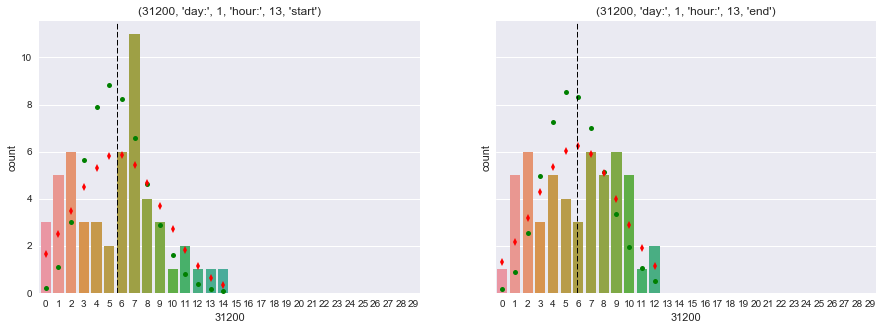

start mean: 5.596153846153846
end mean: 4.846153846153846


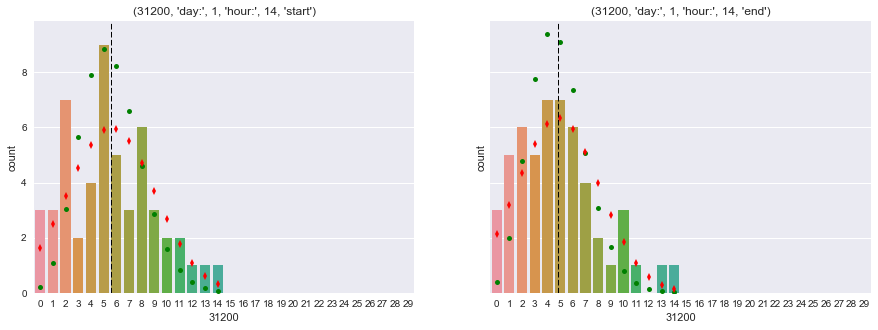

start mean: 5.269230769230769
end mean: 6.211538461538462


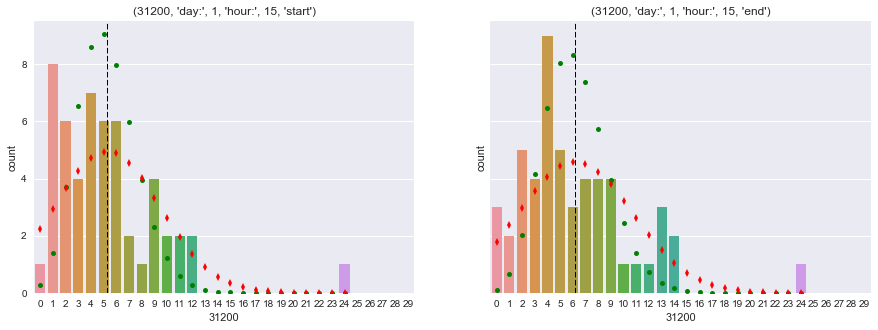

start mean: 6.5
end mean: 6.846153846153846


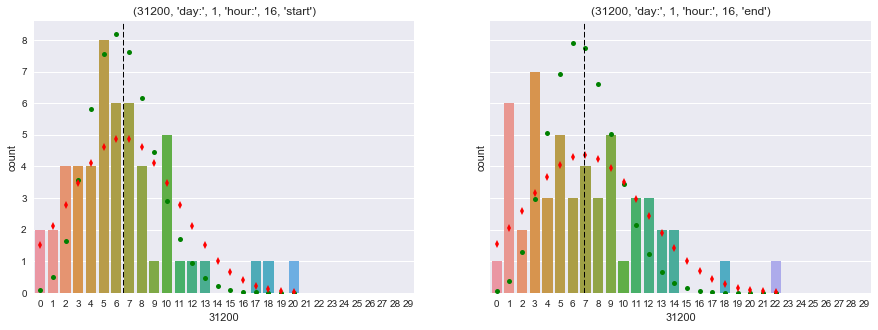

start mean: 14.923076923076923
end mean: 14.365384615384615


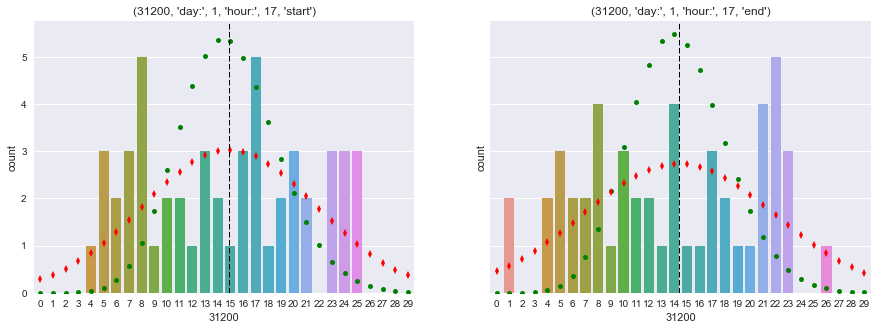

start mean: 19.346153846153847
end mean: 17.057692307692307


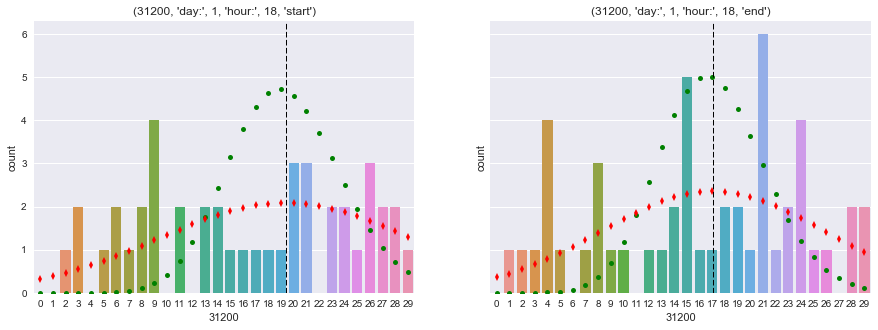

start mean: 12.307692307692308
end mean: 13.25


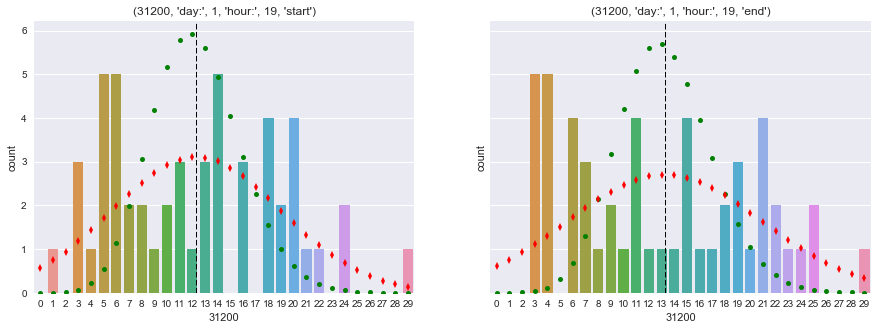

start mean: 10.692307692307692
end mean: 10.615384615384615


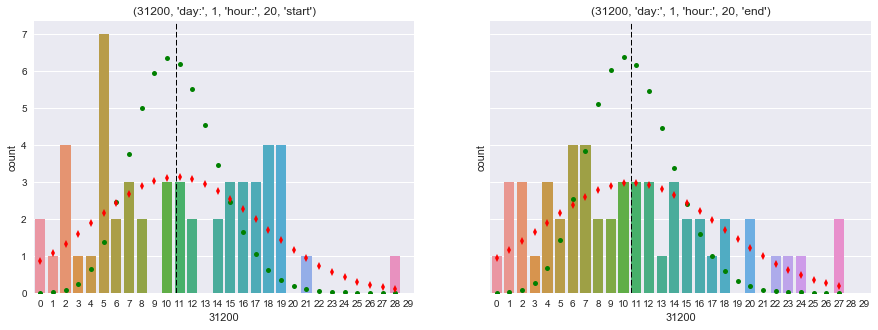

start mean: 8.403846153846153
end mean: 7.0


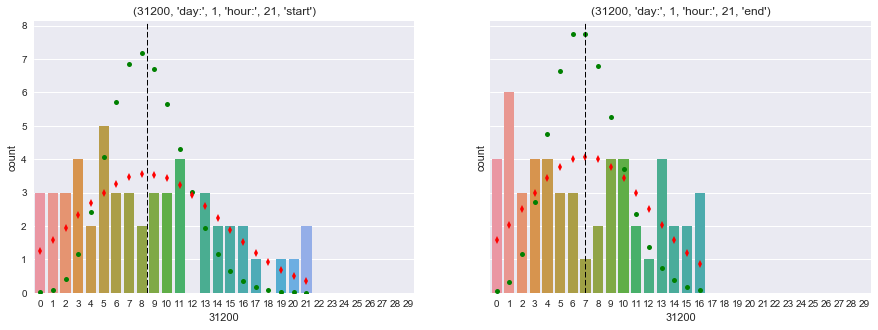

start mean: 6.115384615384615
end mean: 4.865384615384615


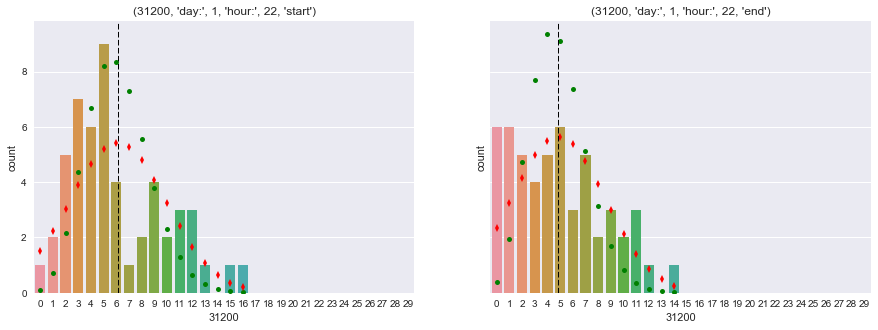

start mean: 3.423076923076923
end mean: 2.673076923076923


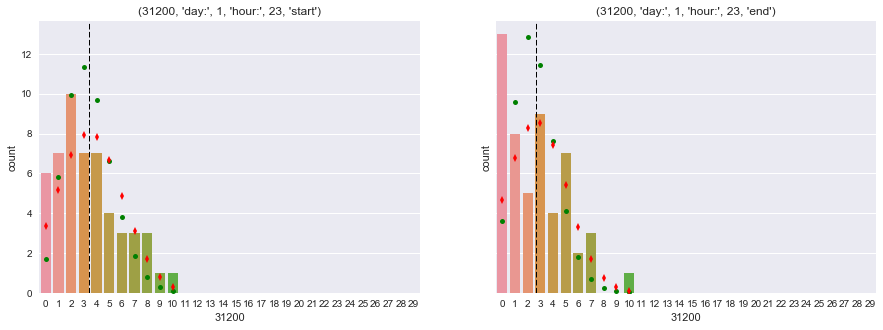

start mean: 1.1346153846153846
end mean: 1.6538461538461537


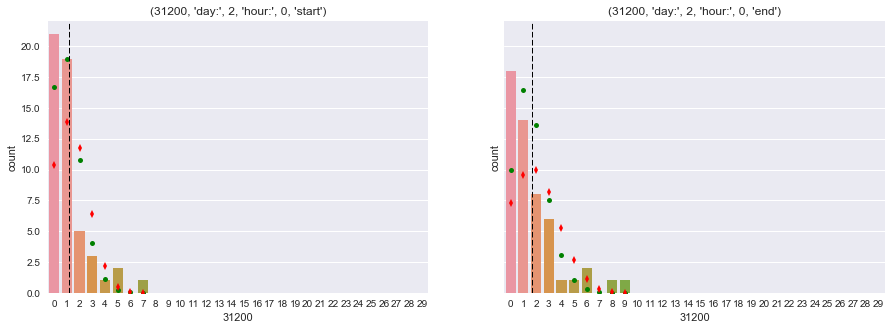

start mean: 0.4807692307692308
end mean: 0.4807692307692308


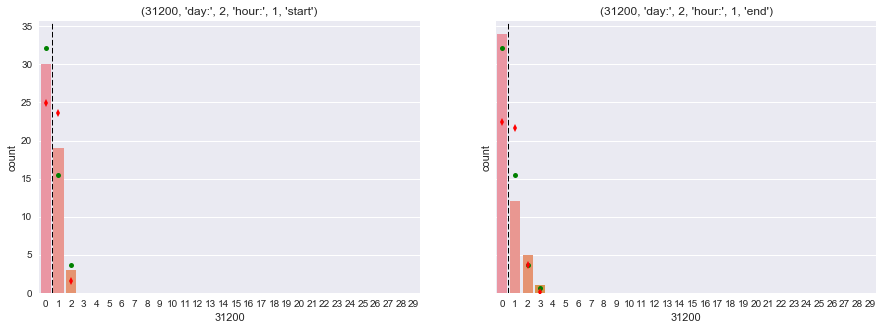

start mean: 0.34
end mean: 0.27450980392156865


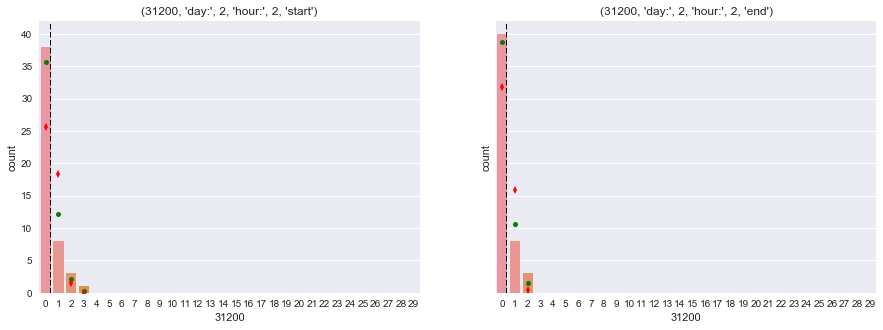

start mean: 0.1276595744680851
end mean: 0.19148936170212766


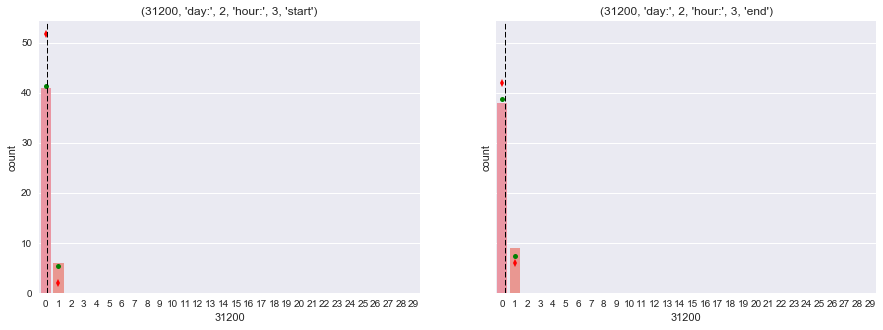

start mean: 0.021739130434782608
end mean: 0.2727272727272727


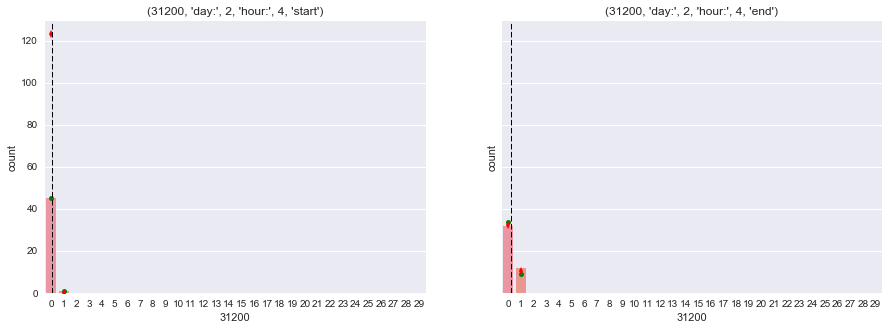

start mean: 0.07692307692307693
end mean: 0.5


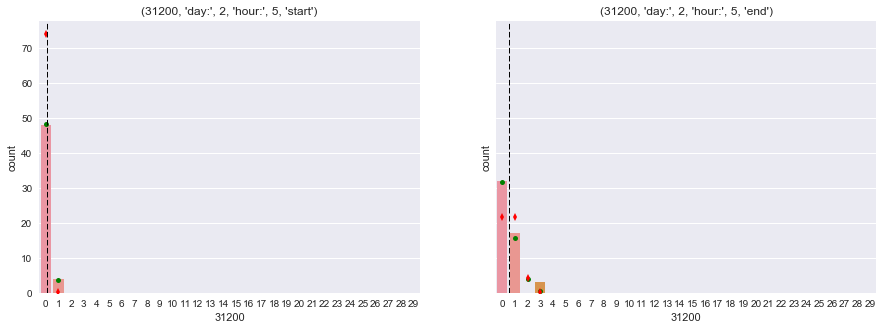

start mean: 1.75
end mean: 2.0576923076923075


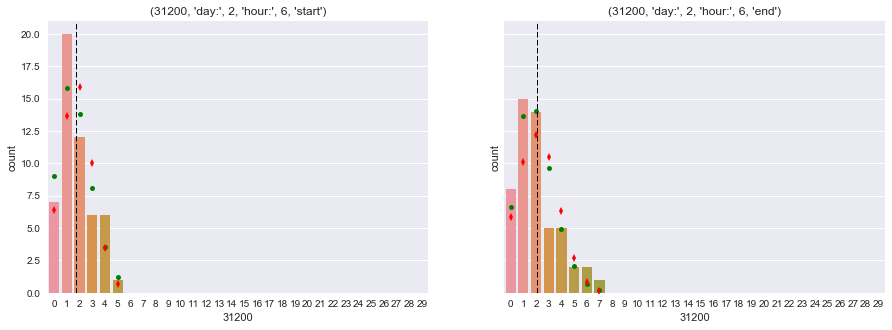

start mean: 3.480769230769231
end mean: 9.48076923076923


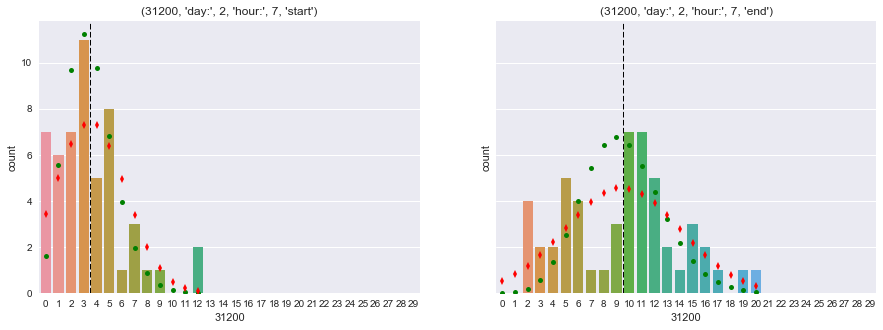

start mean: 10.673076923076923
end mean: 12.807692307692308


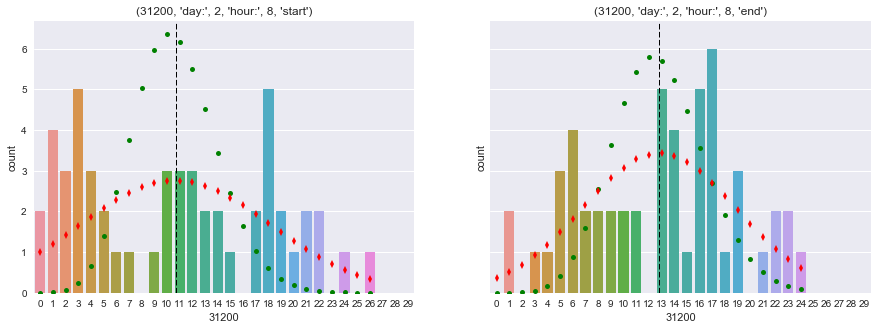

start mean: 8.038461538461538
end mean: 8.692307692307692


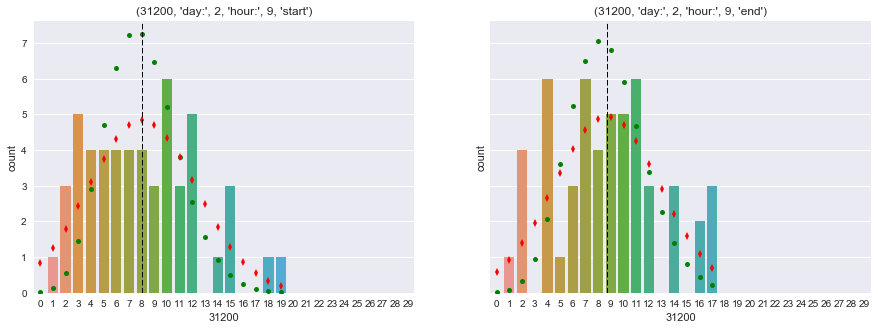

start mean: 4.826923076923077
end mean: 5.076923076923077


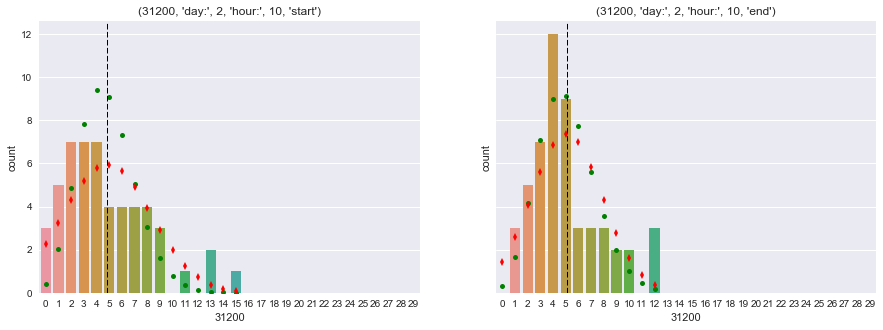

start mean: 4.25
end mean: 4.884615384615385


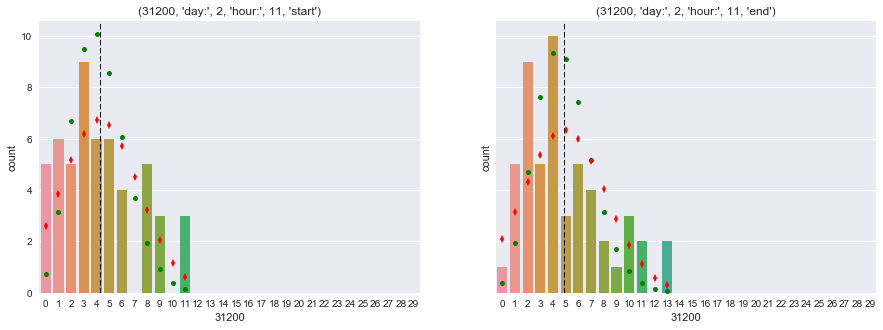

start mean: 4.096153846153846
end mean: 6.3076923076923075


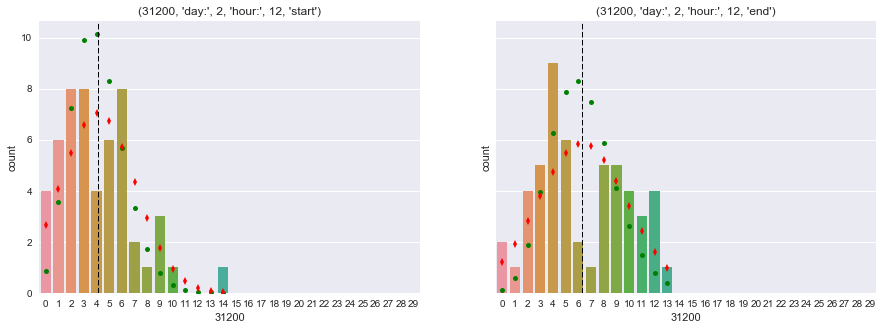

start mean: 5.365384615384615
end mean: 4.865384615384615


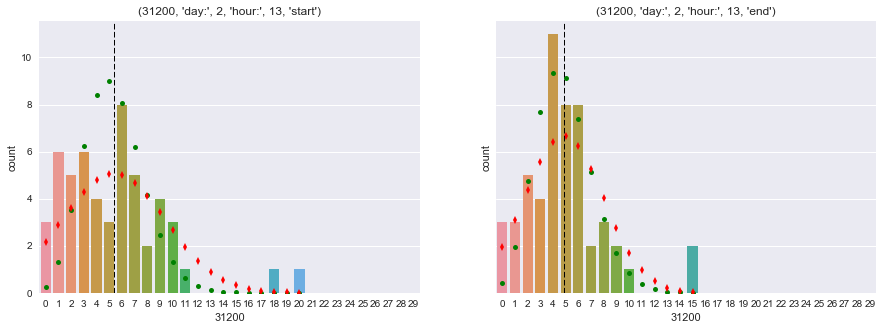

start mean: 4.634615384615385
end mean: 4.923076923076923


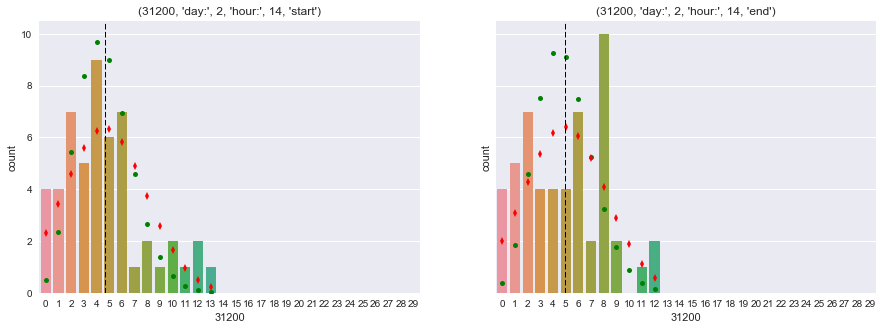

start mean: 4.673076923076923
end mean: 5.5576923076923075


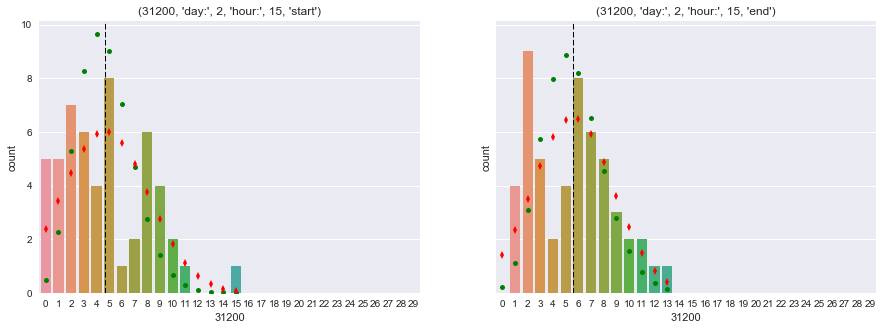

start mean: 4.826923076923077
end mean: 5.403846153846154


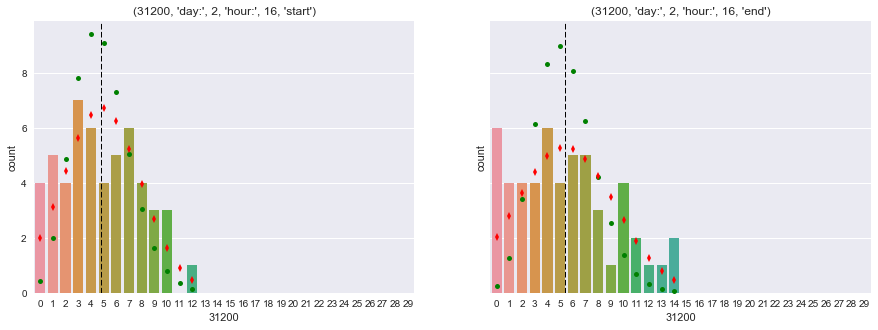

start mean: 13.884615384615385
end mean: 13.326923076923077


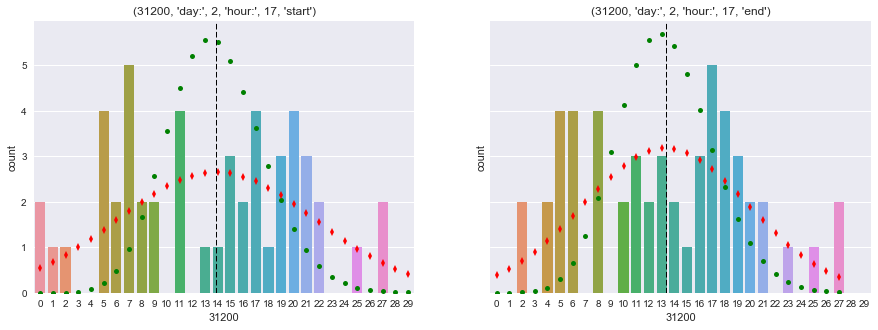

start mean: 14.196078431372548
end mean: 13.76923076923077


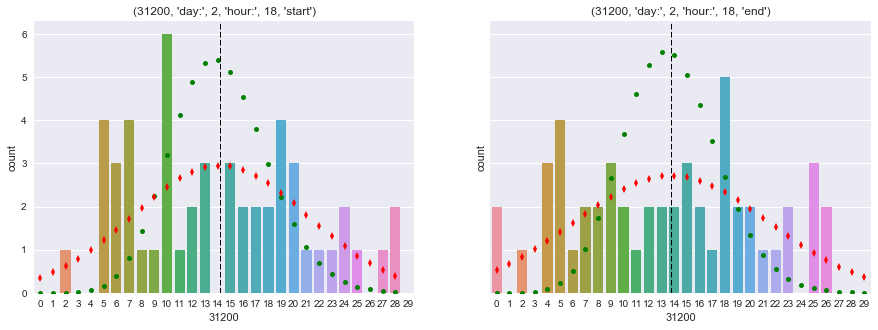

start mean: 11.176470588235293
end mean: 12.117647058823529


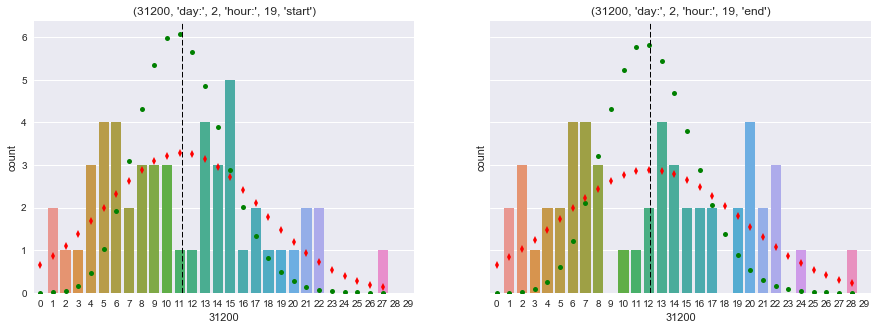

start mean: 9.352941176470589
end mean: 8.764705882352942


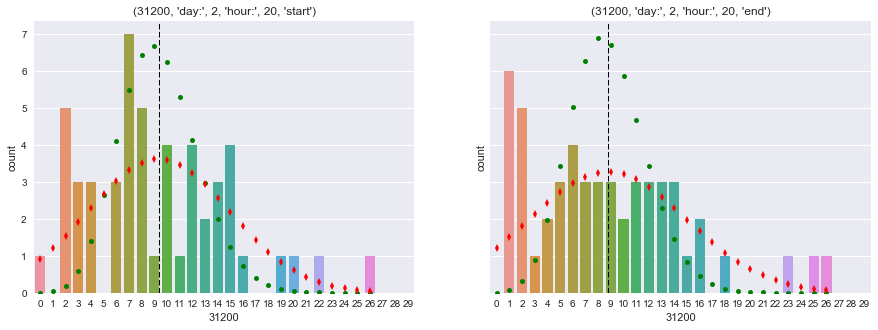

start mean: 7.607843137254902
end mean: 6.0


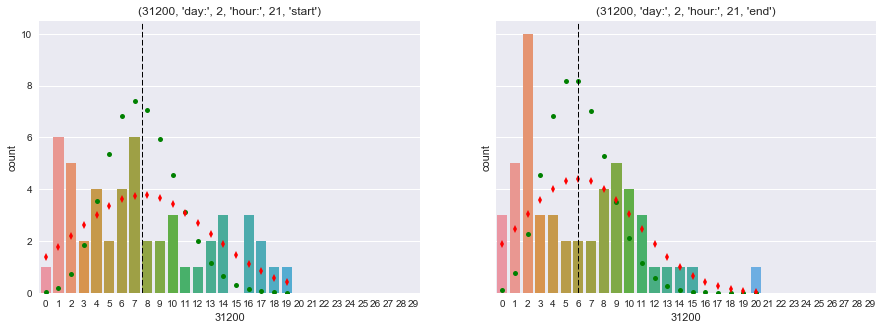

start mean: 5.882352941176471
end mean: 5.03921568627451


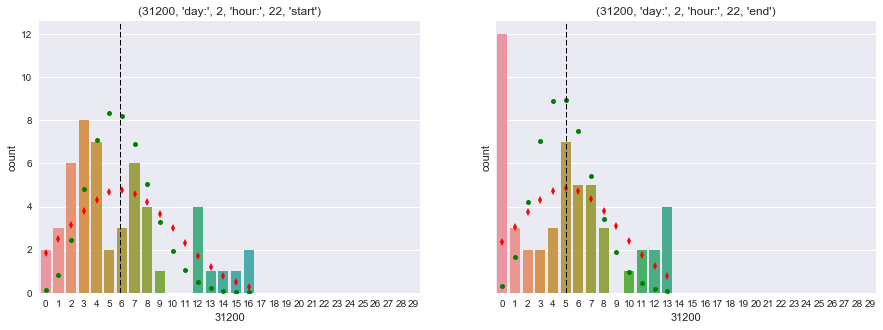

start mean: 3.372549019607843
end mean: 3.5098039215686274


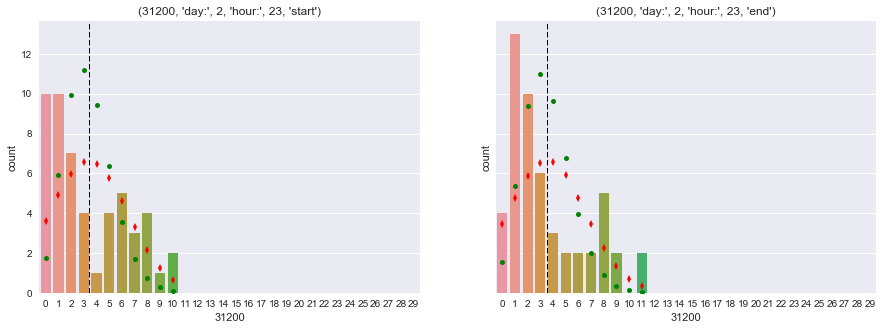

start mean: 1.6470588235294117
end mean: 1.6862745098039216


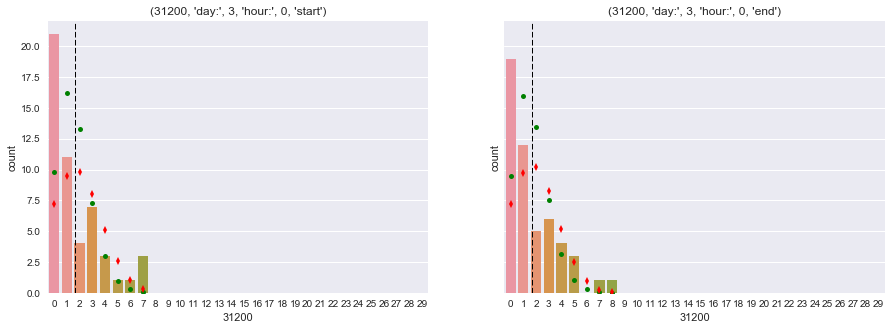

start mean: 0.6862745098039216
end mean: 0.7450980392156863


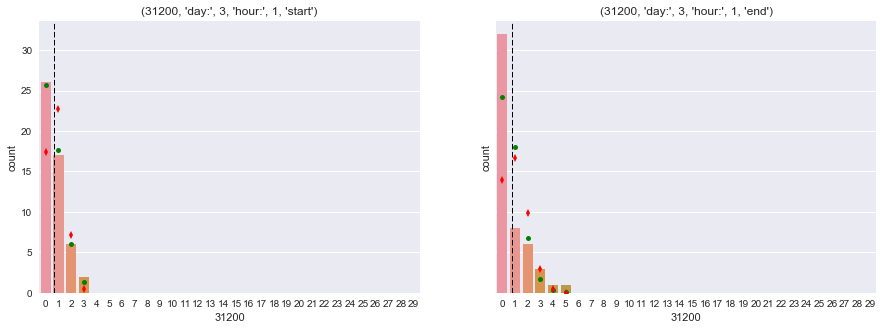

start mean: 0.4
end mean: 0.6078431372549019


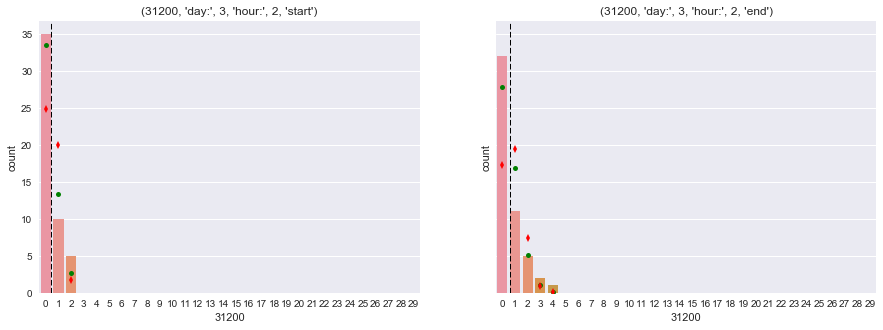

start mean: 0.08333333333333333
end mean: 0.2127659574468085


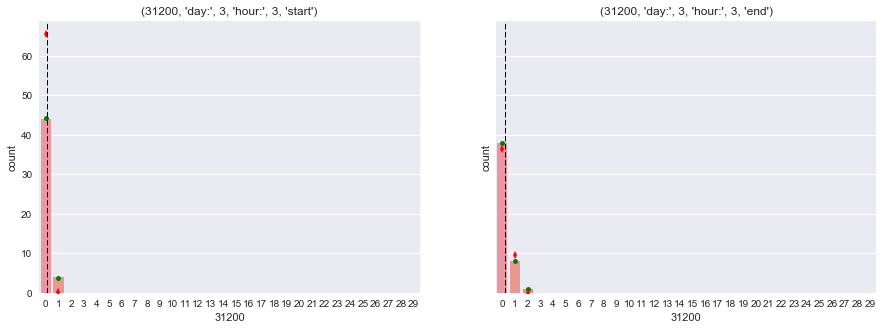

start mean: 0.0625
end mean: 0.3404255319148936


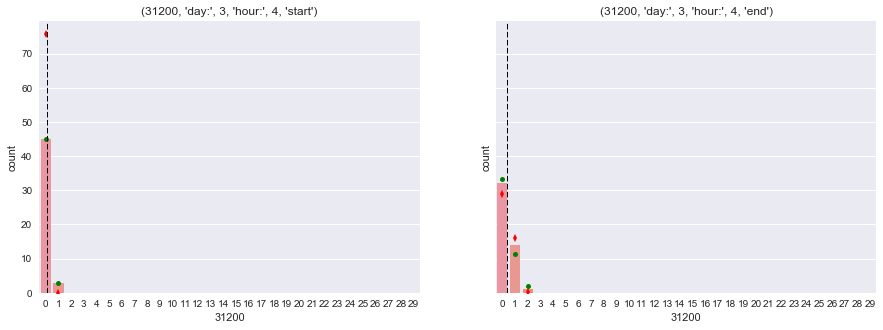

start mean: 0.21568627450980393
end mean: 0.7450980392156863


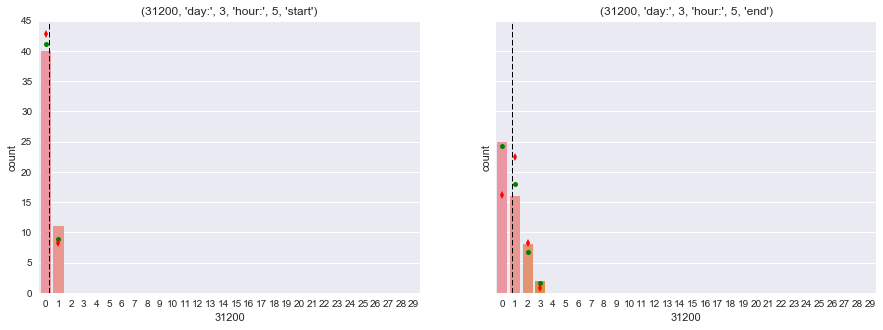

start mean: 1.9215686274509804
end mean: 2.9607843137254903


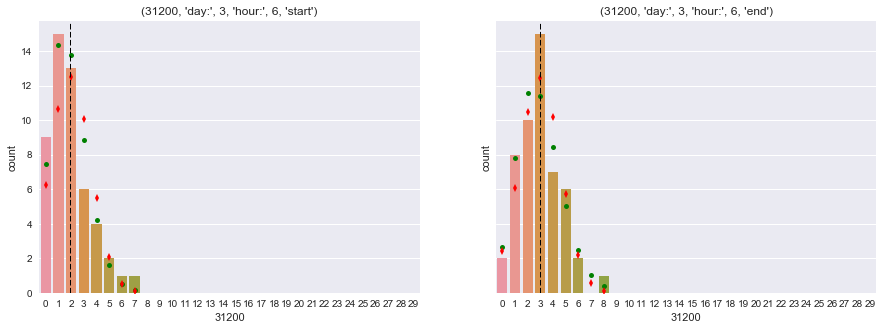

start mean: 3.392156862745098
end mean: 8.470588235294118


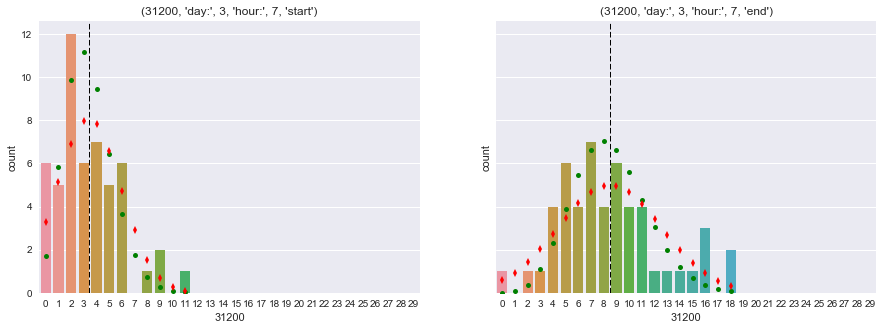

start mean: 10.627450980392156
end mean: 13.098039215686274


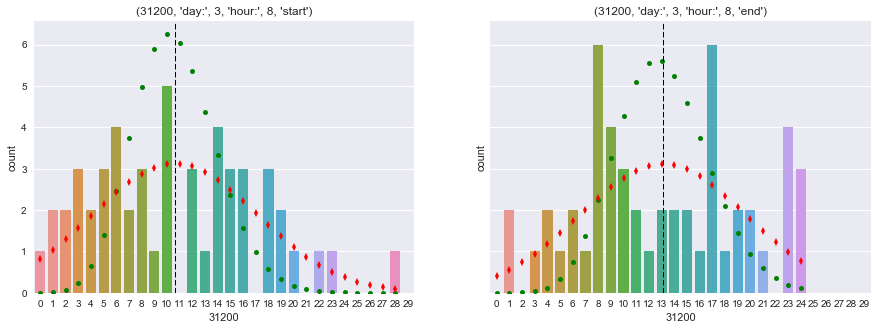

start mean: 8.470588235294118
end mean: 9.843137254901961


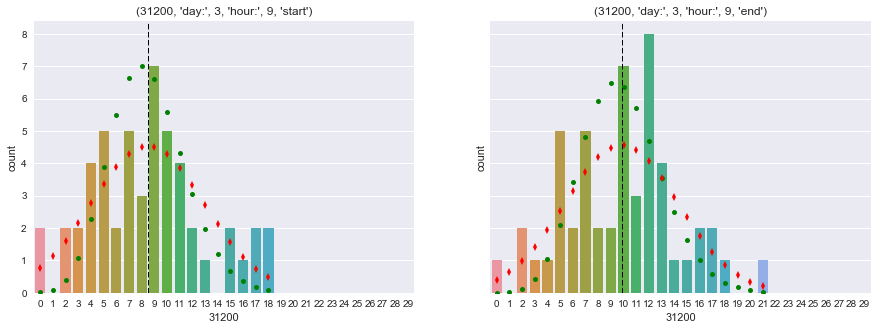

start mean: 4.0
end mean: 3.843137254901961


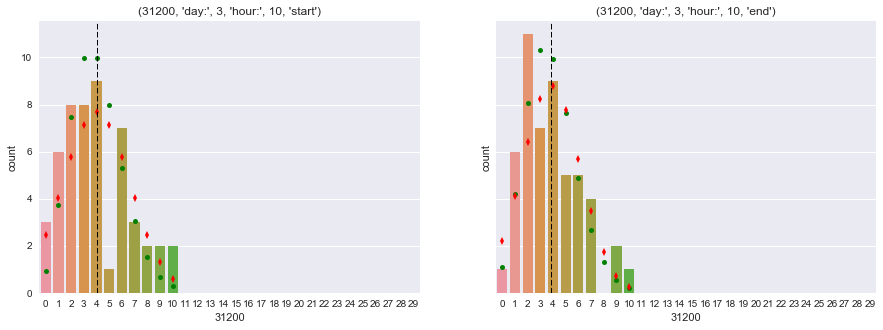

start mean: 4.568627450980392
end mean: 5.529411764705882


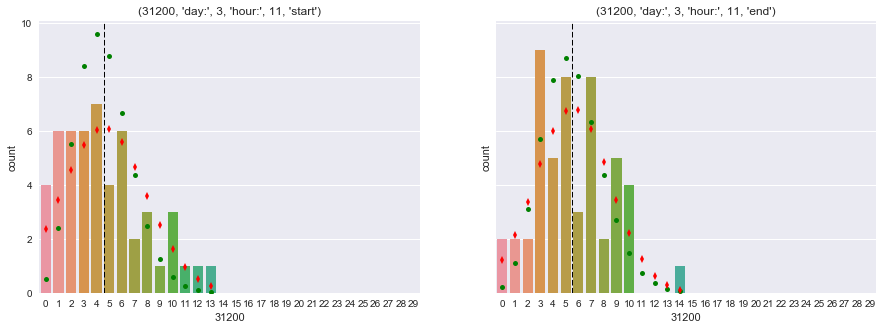

start mean: 5.431372549019608
end mean: 5.470588235294118


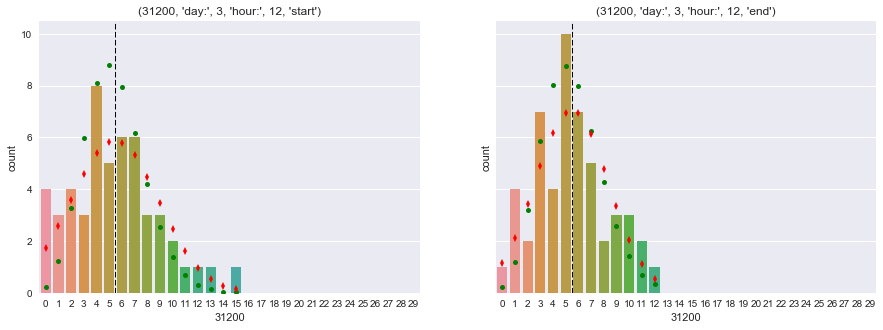

start mean: 5.705882352941177
end mean: 5.882352941176471


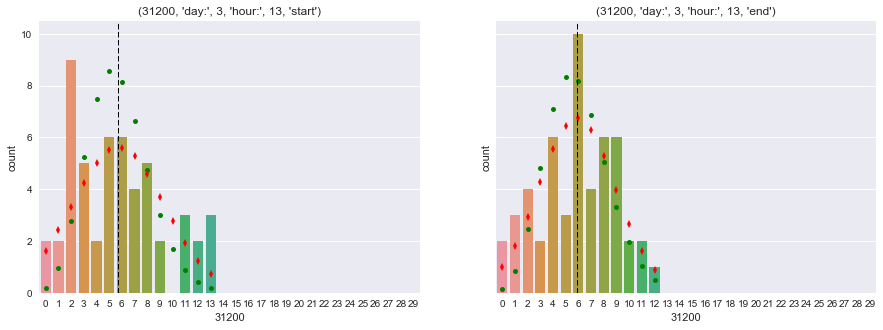

start mean: 5.392156862745098
end mean: 5.470588235294118


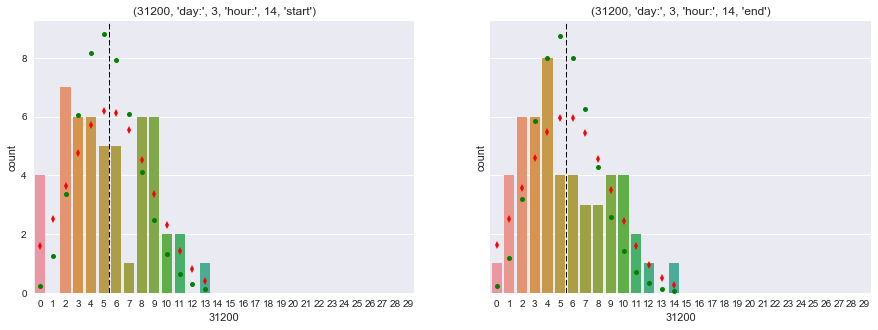

start mean: 4.96078431372549
end mean: 4.705882352941177


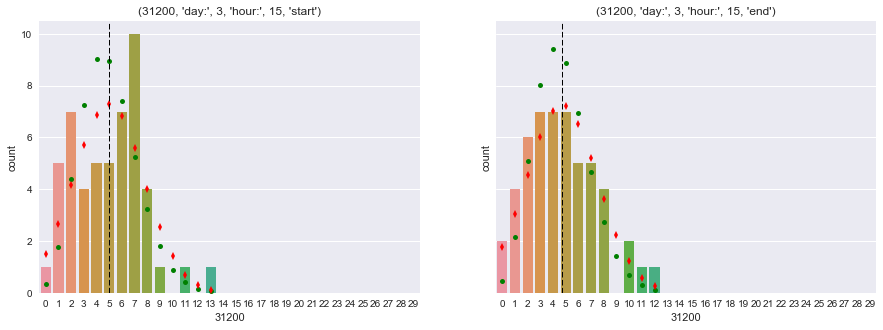

start mean: 6.3076923076923075
end mean: 7.173076923076923


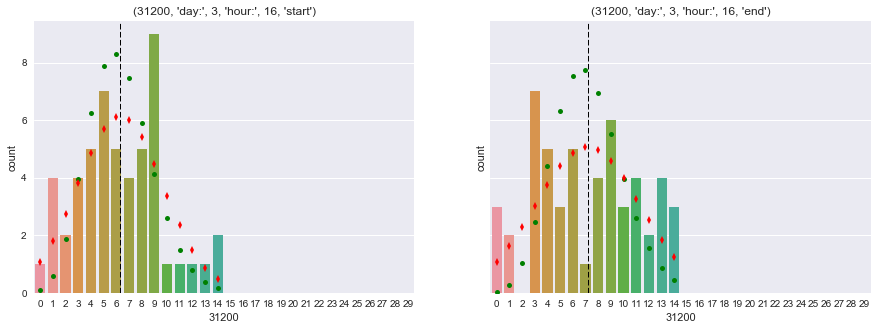

start mean: 13.76923076923077
end mean: 13.326923076923077


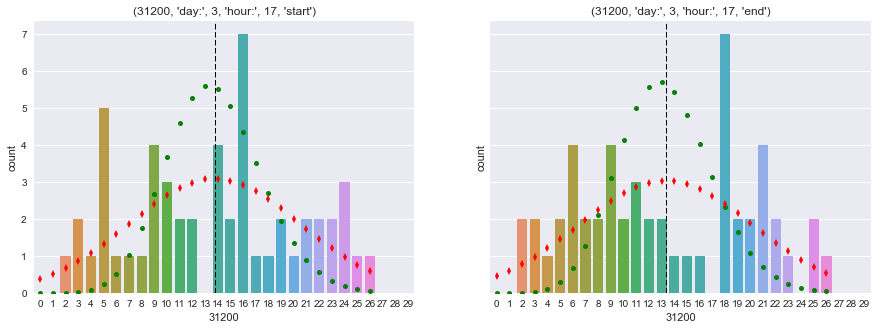

start mean: 15.653846153846153
end mean: 15.942307692307692


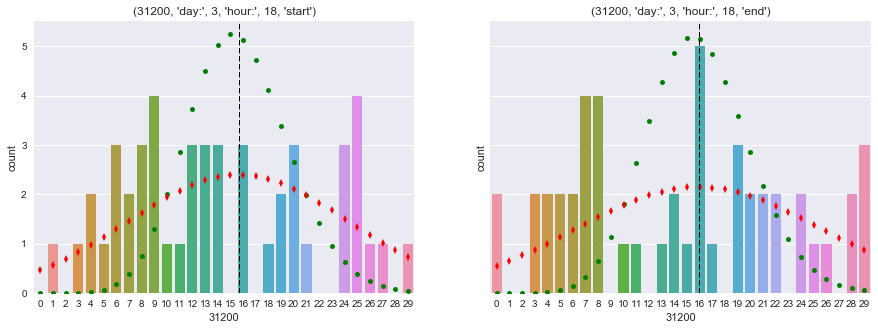

start mean: 11.23076923076923
end mean: 13.173076923076923


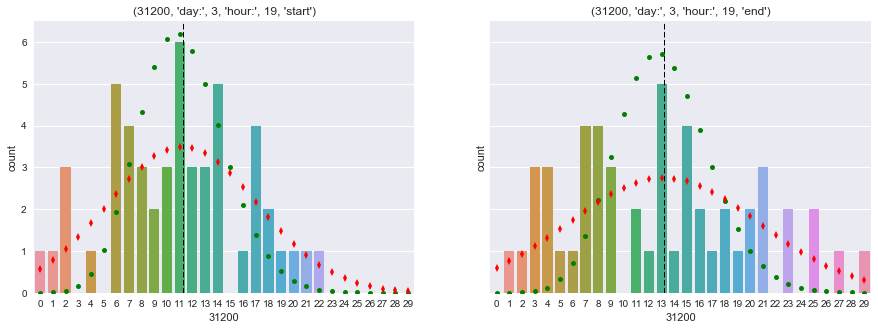

start mean: 10.596153846153847
end mean: 9.384615384615385


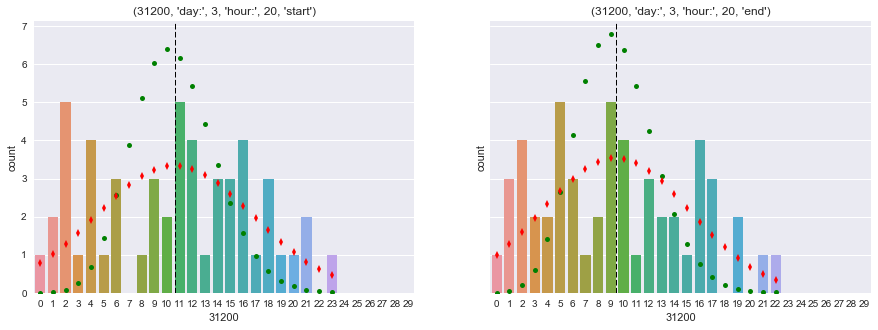

start mean: 8.192307692307692
end mean: 7.461538461538462


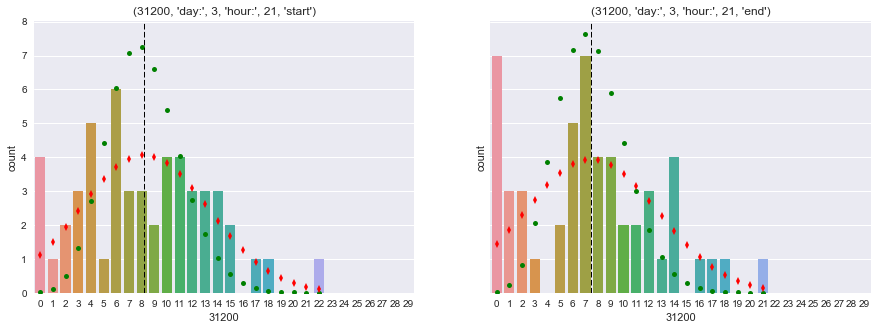

start mean: 5.576923076923077
end mean: 4.826923076923077


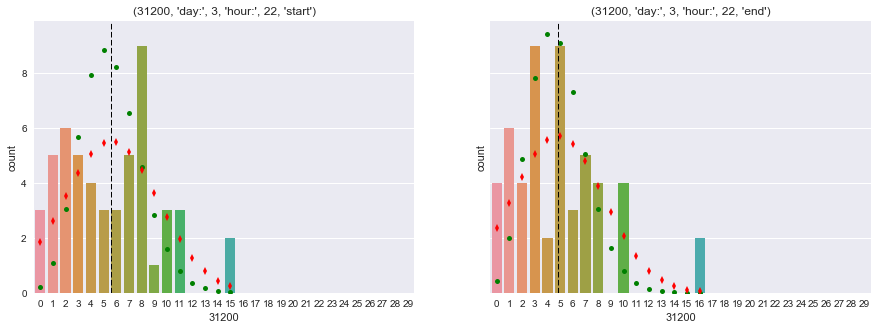

start mean: 4.884615384615385
end mean: 3.7115384615384617


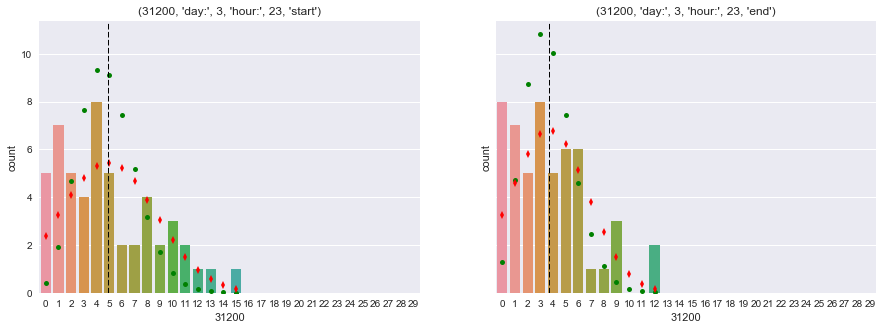

start mean: 2.480769230769231
end mean: 2.0


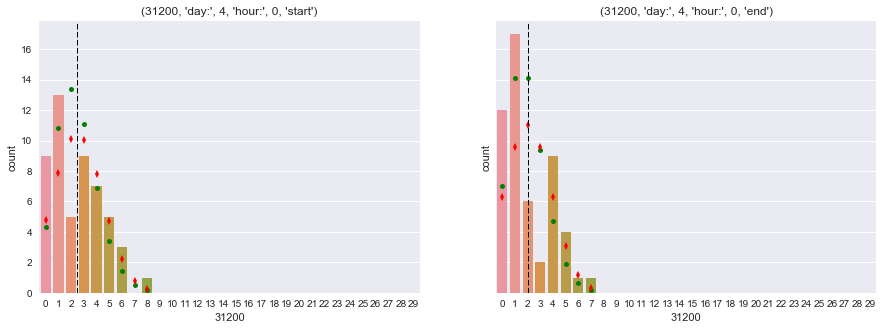

start mean: 1.3076923076923077
end mean: 0.8461538461538461


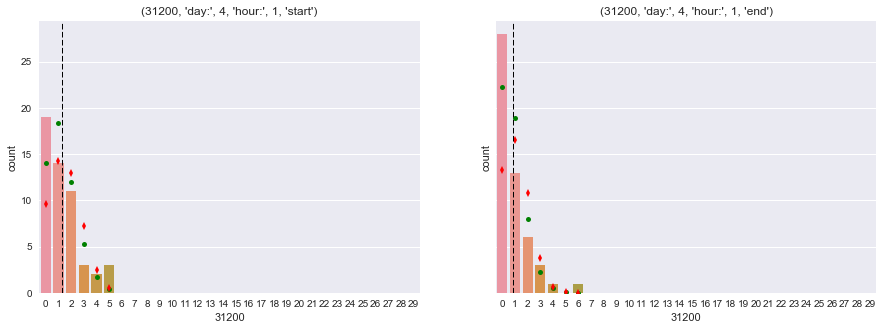

start mean: 0.5961538461538461
end mean: 0.4423076923076923


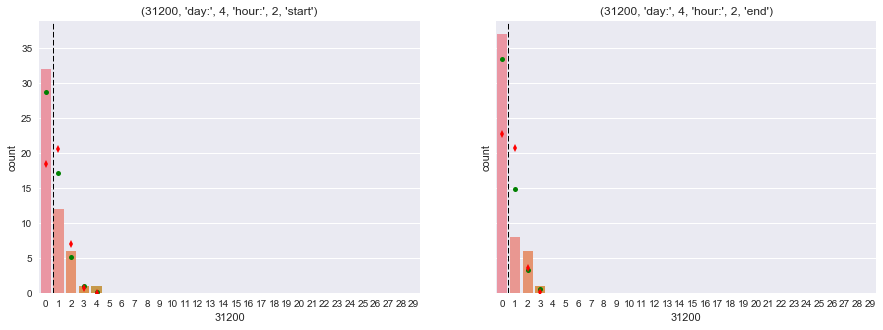

start mean: 0.24
end mean: 0.22448979591836735


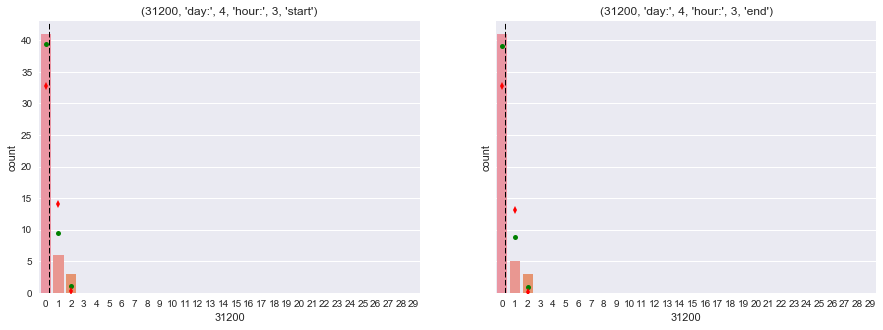

start mean: 0.06666666666666667
end mean: 0.26666666666666666


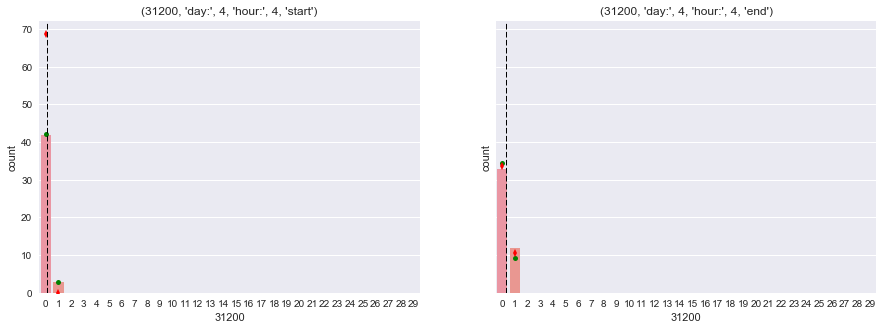

start mean: 0.07692307692307693
end mean: 0.5961538461538461


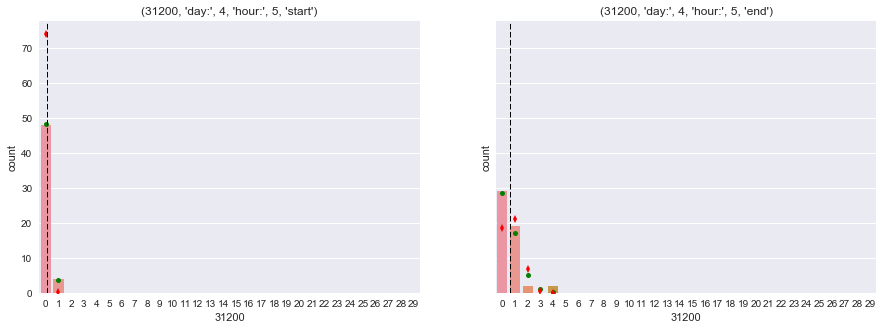

start mean: 1.6730769230769231
end mean: 2.3076923076923075


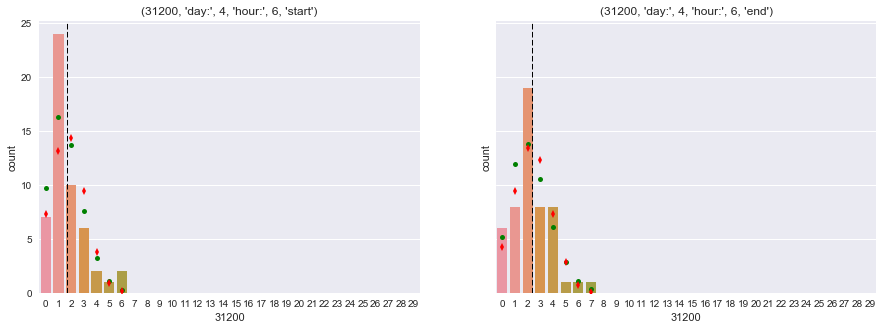

start mean: 3.3653846153846154
end mean: 8.51923076923077


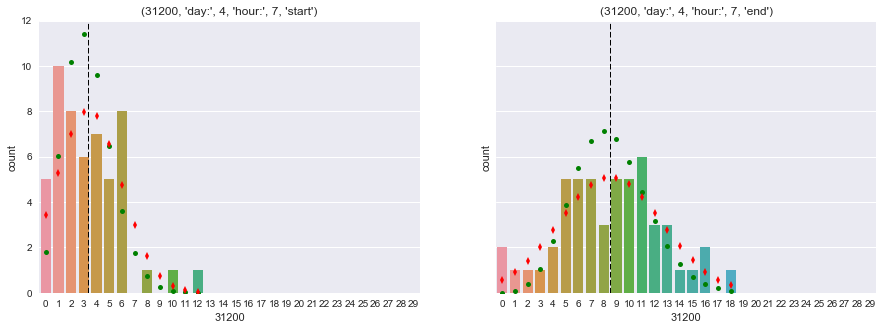

start mean: 8.173076923076923
end mean: 13.846153846153847


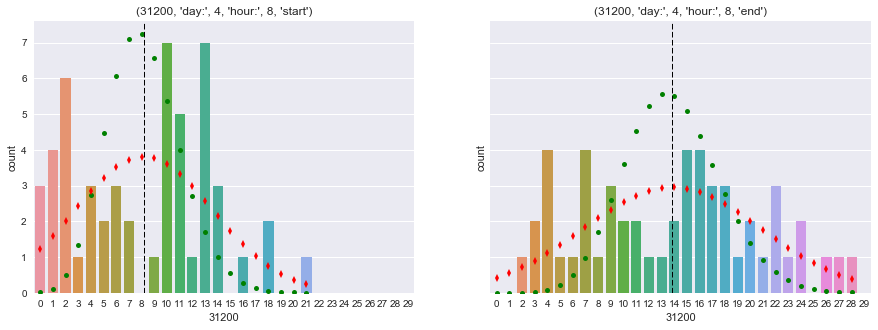

start mean: 9.25
end mean: 10.0


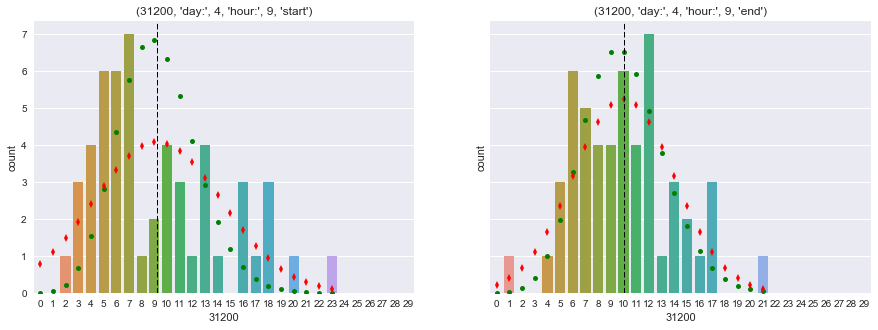

start mean: 5.038461538461538
end mean: 5.269230769230769


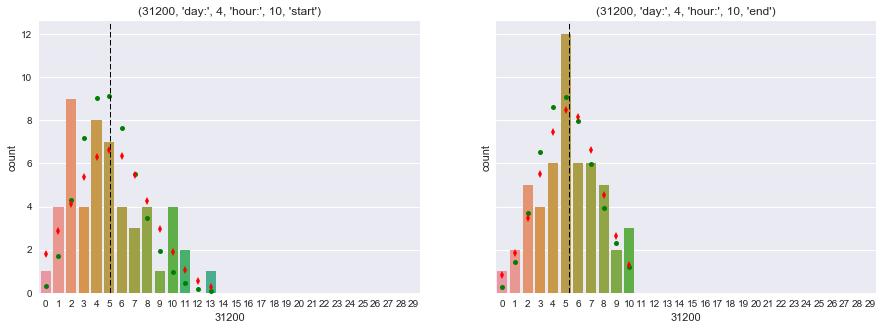

start mean: 4.846153846153846
end mean: 5.3076923076923075


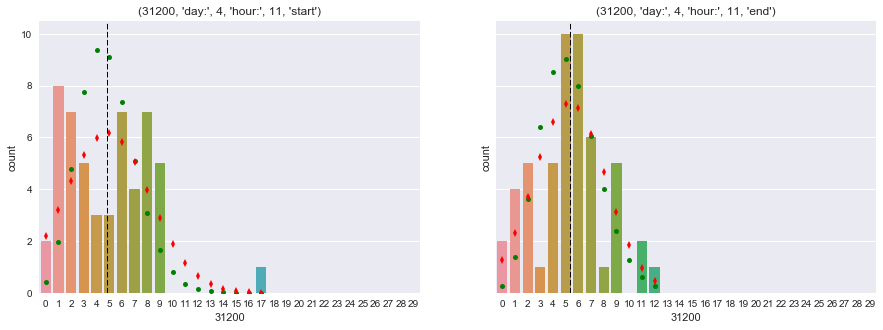

start mean: 6.269230769230769
end mean: 7.788461538461538


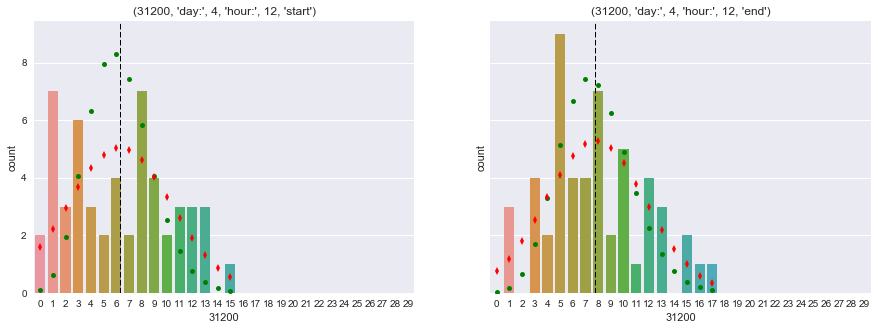

start mean: 7.230769230769231
end mean: 6.9423076923076925


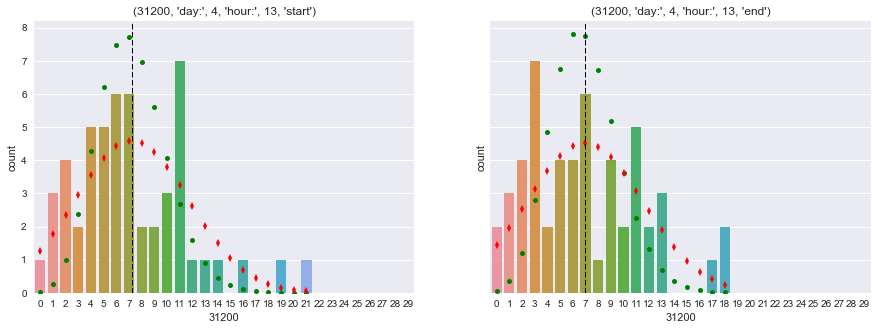

start mean: 6.730769230769231
end mean: 7.25


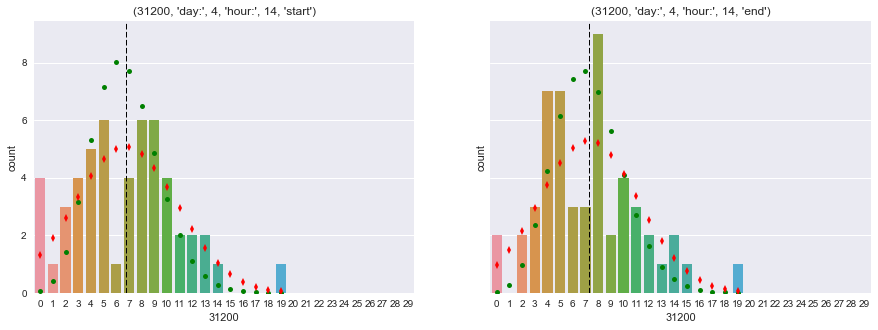

start mean: 6.8076923076923075
end mean: 7.326923076923077


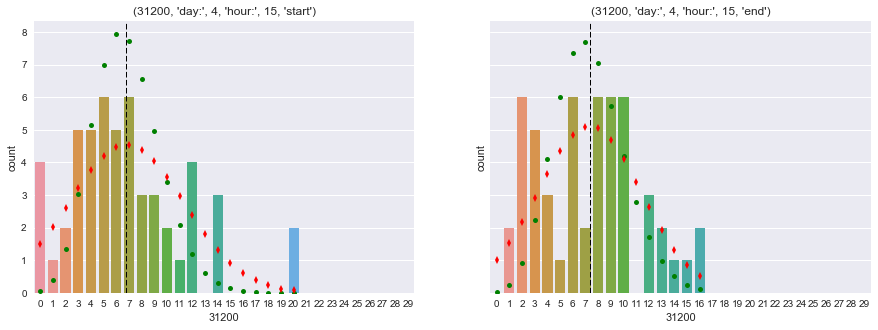

start mean: 7.865384615384615
end mean: 8.01923076923077


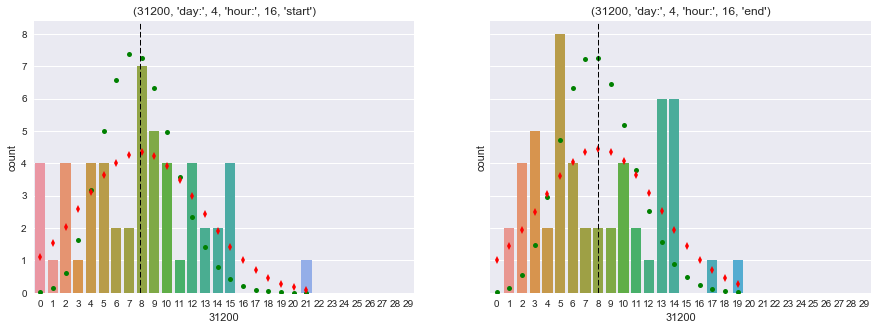

start mean: 13.653846153846153
end mean: 13.846153846153847


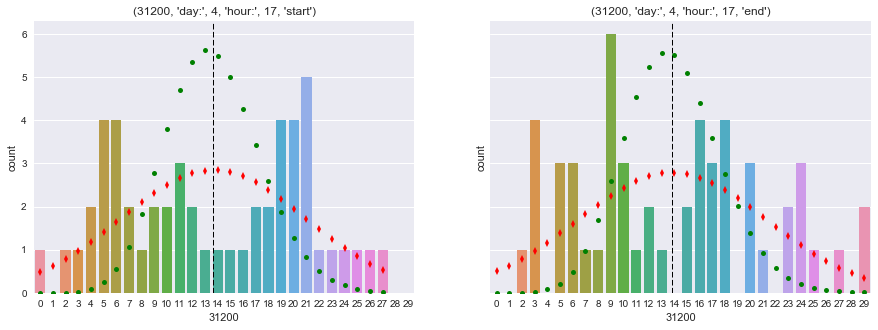

start mean: 13.23076923076923
end mean: 14.365384615384615


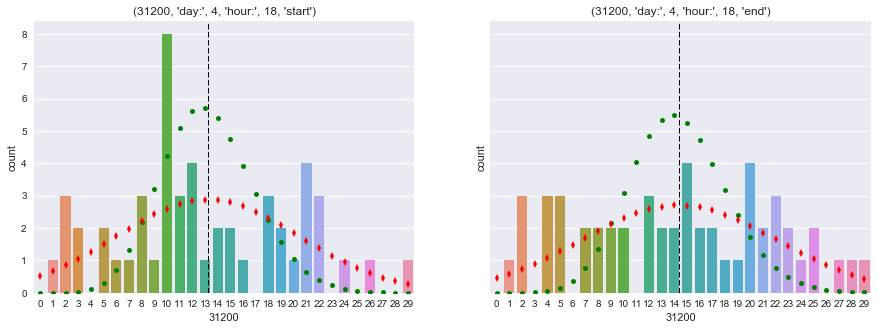

start mean: 8.5
end mean: 11.173076923076923


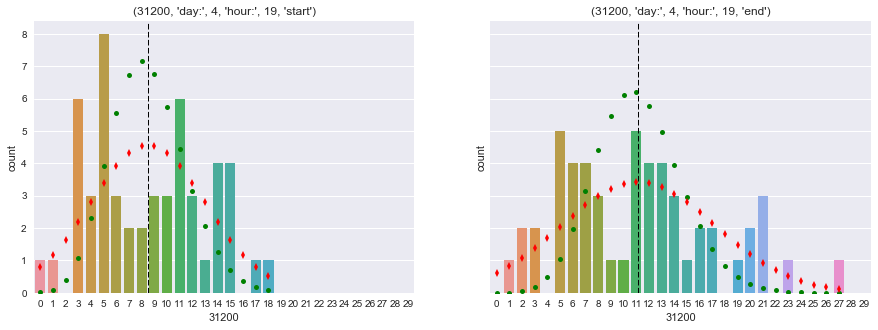

start mean: 6.903846153846154
end mean: 8.384615384615385


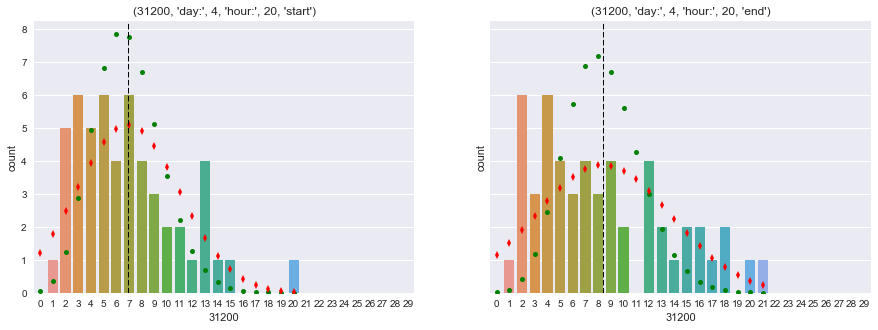

start mean: 5.8076923076923075
end mean: 6.346153846153846


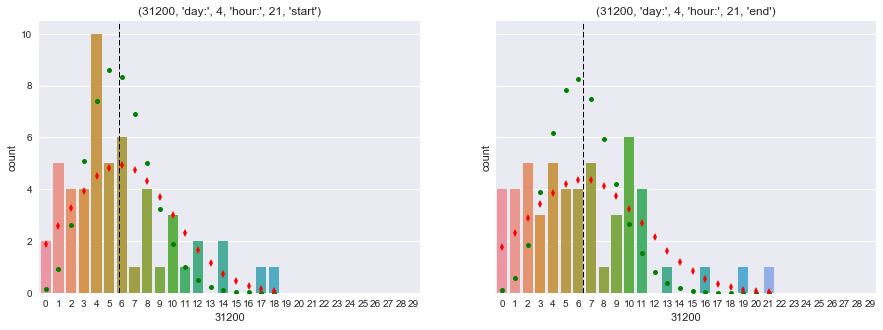

start mean: 4.846153846153846
end mean: 5.461538461538462


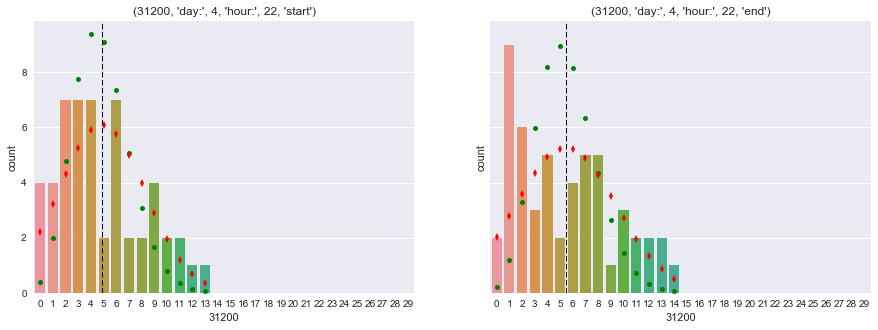

start mean: 4.980769230769231
end mean: 4.3076923076923075


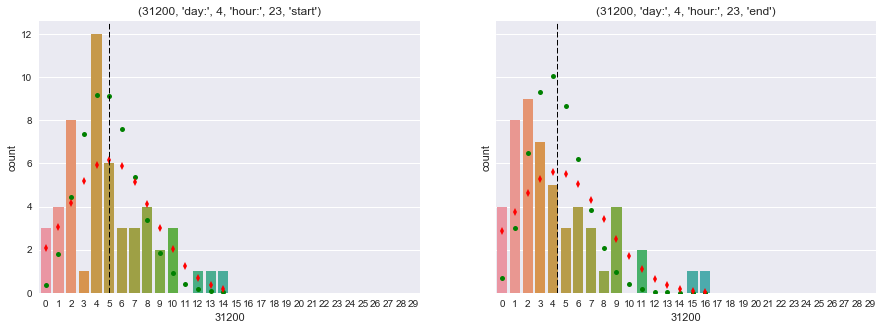

start mean: 4.298076923076923
end mean: 3.355769230769231


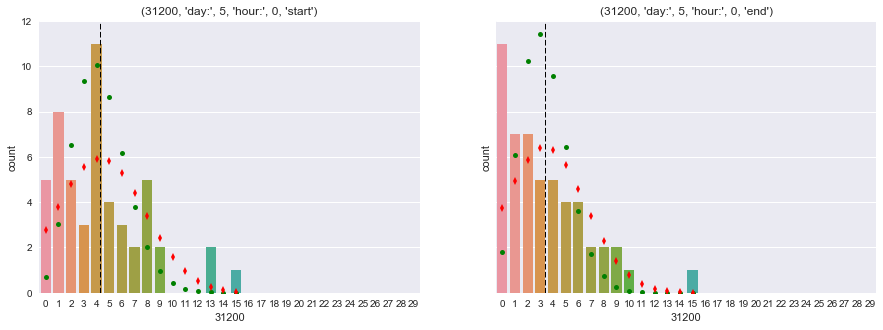

start mean: 2.7884615384615383
end mean: 1.9903846153846154


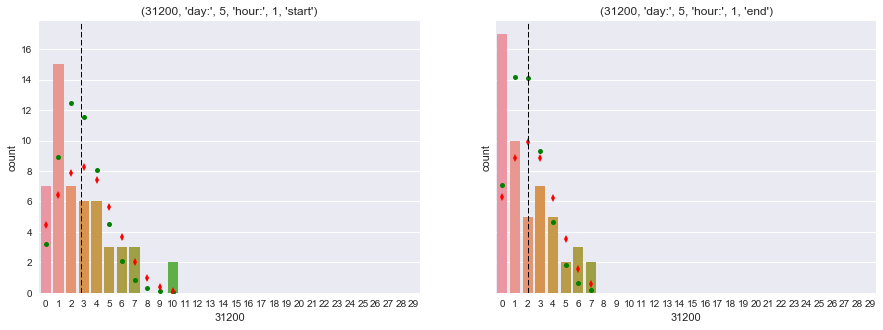

start mean: 2.0384615384615383
end mean: 1.8942307692307692


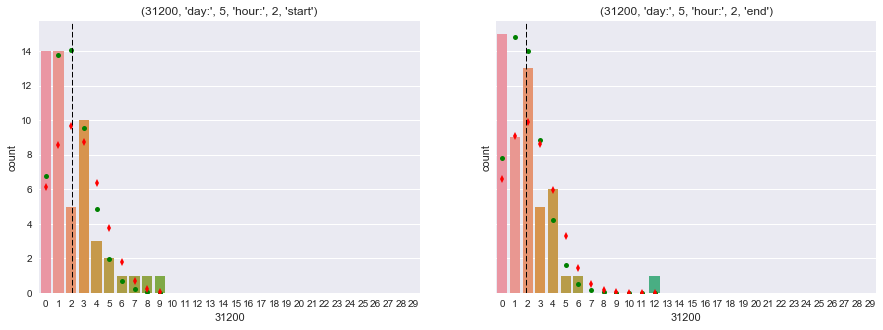

start mean: 1.2019230769230769
end mean: 0.7692307692307693


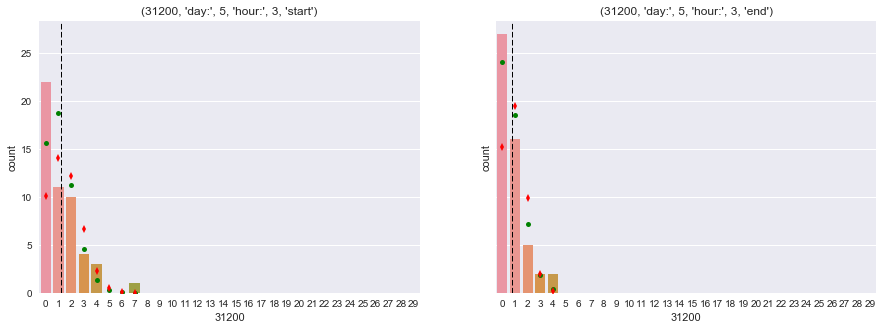

start mean: 0.17307692307692307
end mean: 0.3076923076923077


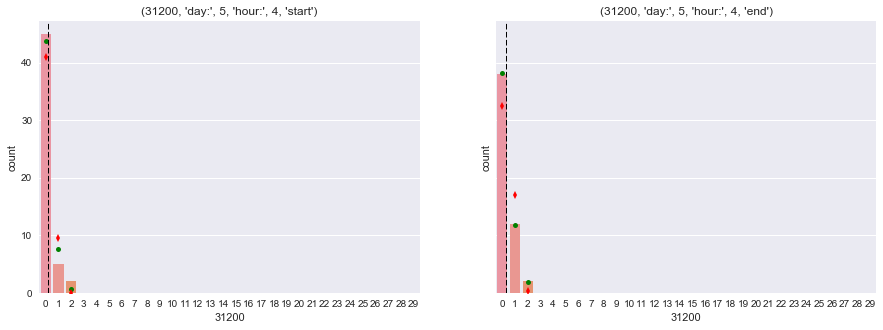

start mean: 0.14
end mean: 0.23529411764705882


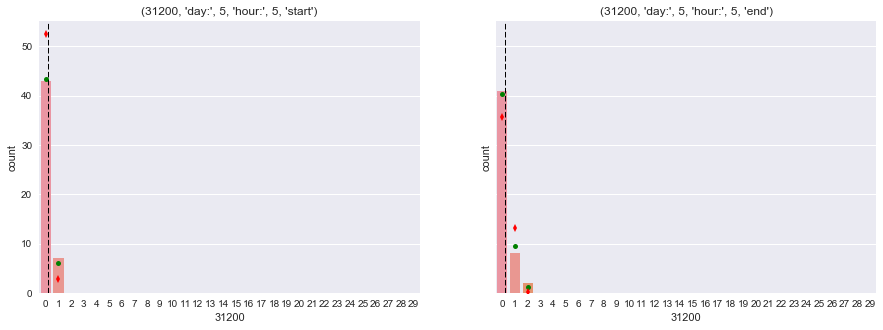

start mean: 0.19230769230769232
end mean: 0.5769230769230769


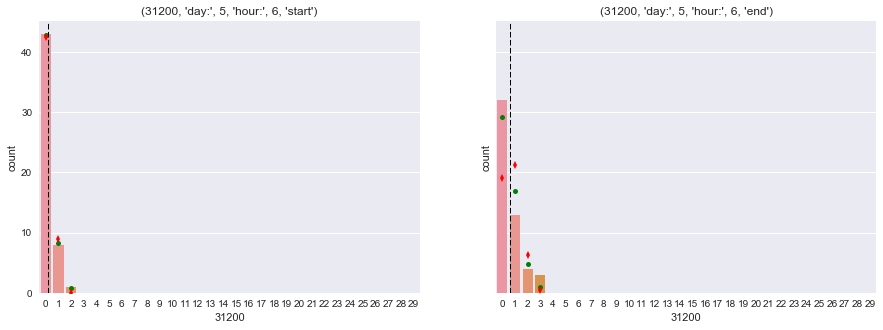

start mean: 0.7307692307692307
end mean: 1.4711538461538463


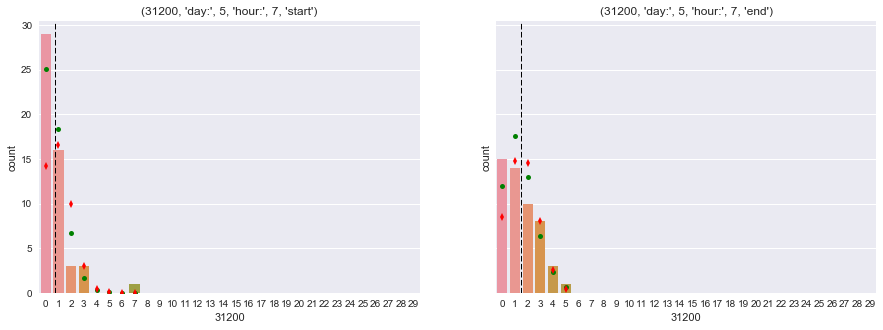

start mean: 1.6730769230769231
end mean: 3.5


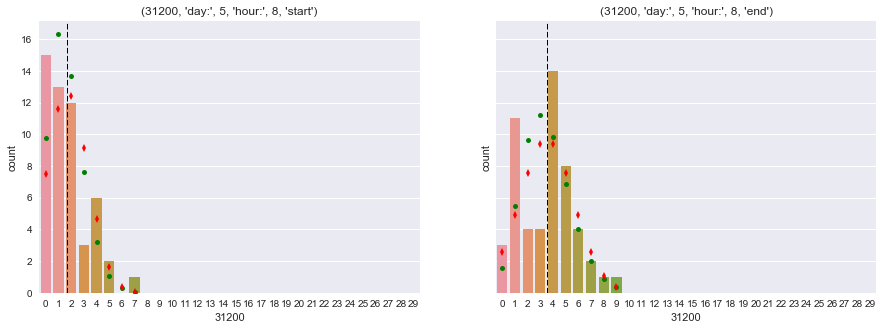

start mean: 4.009615384615385
end mean: 5.25


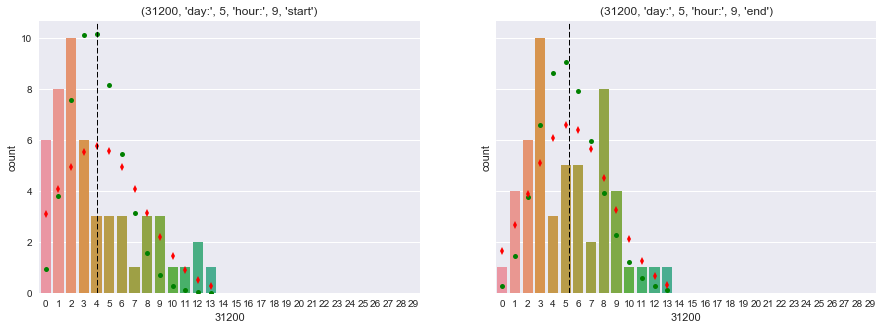

start mean: 7.336538461538462
end mean: 7.9326923076923075


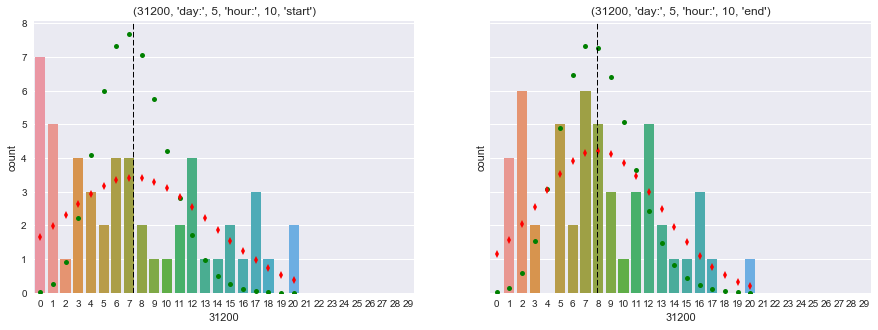

start mean: 9.278846153846153
end mean: 9.548076923076923


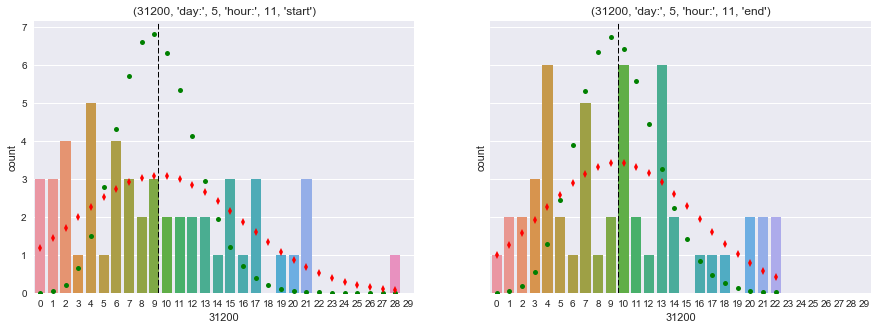

start mean: 11.423076923076923
end mean: 11.653846153846153


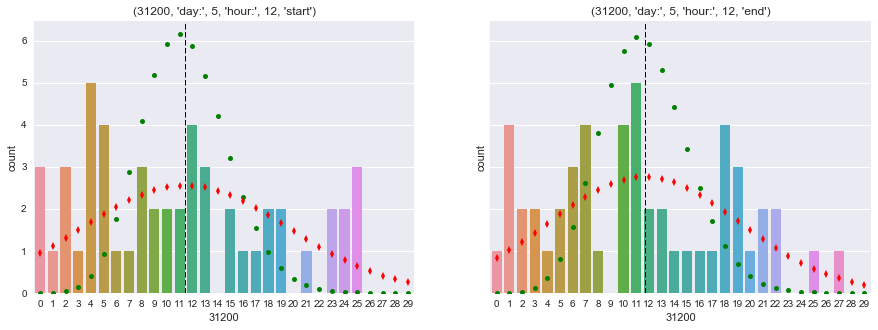

start mean: 11.163461538461538
end mean: 11.442307692307692


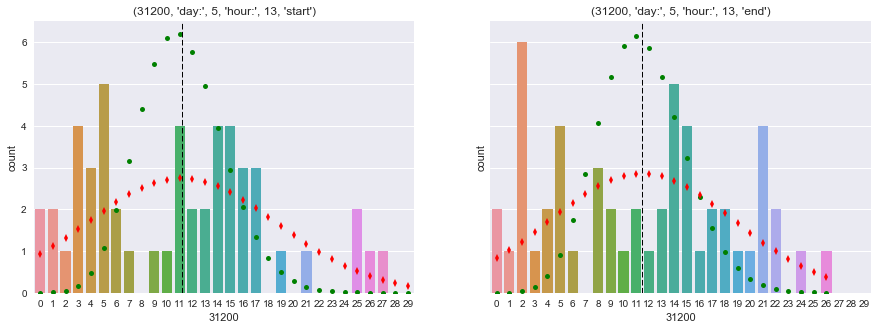

start mean: 12.60576923076923
end mean: 12.884615384615385


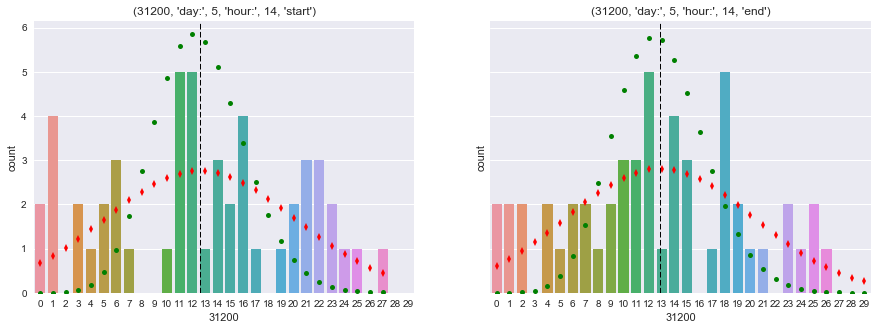

start mean: 12.057692307692308
end mean: 12.259615384615385


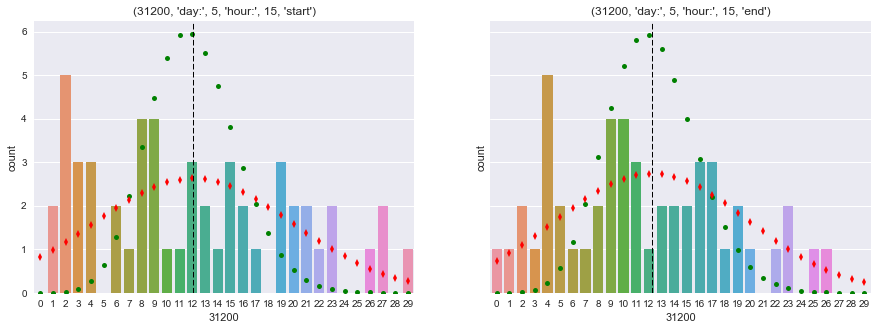

start mean: 11.240384615384615
end mean: 12.423076923076923


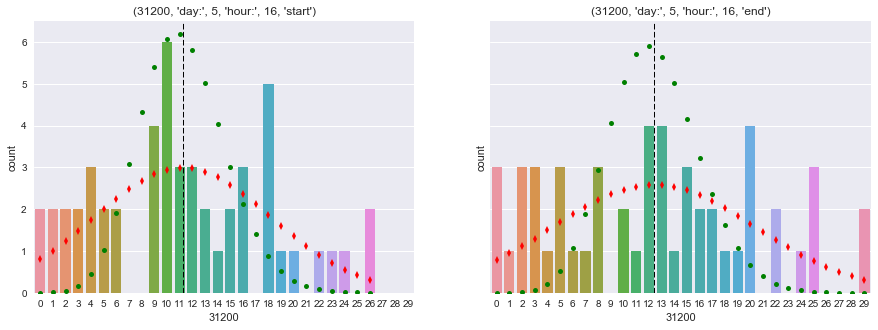

start mean: 9.48076923076923
end mean: 12.221153846153847


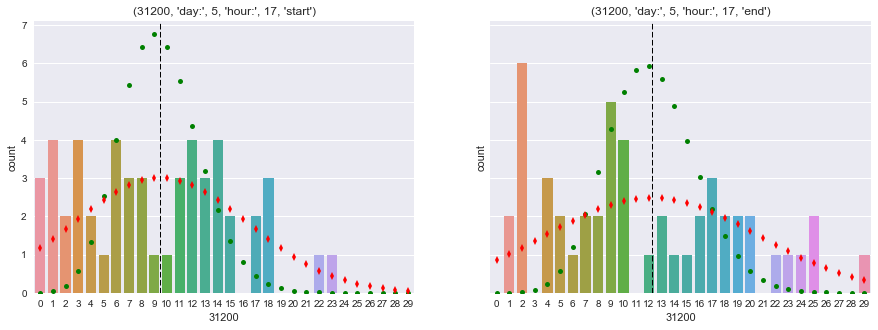

start mean: 8.313725490196079
end mean: 10.490384615384615


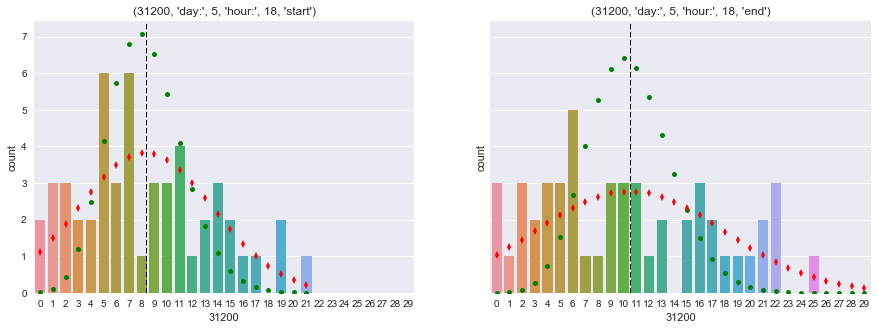

start mean: 7.872549019607843
end mean: 9.403846153846153


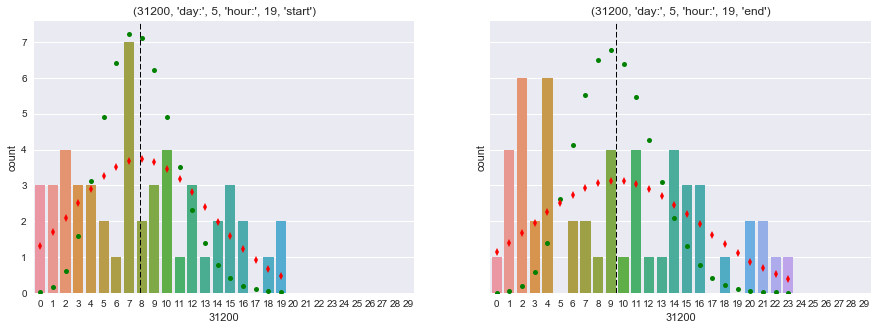

start mean: 6.715686274509804
end mean: 7.098039215686274


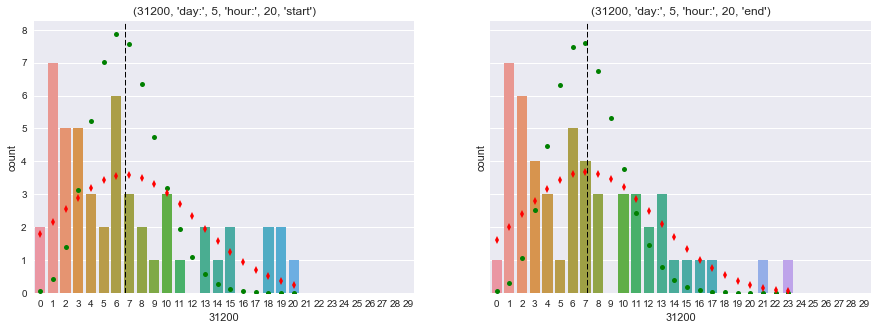

start mean: 4.676470588235294
end mean: 6.352941176470588


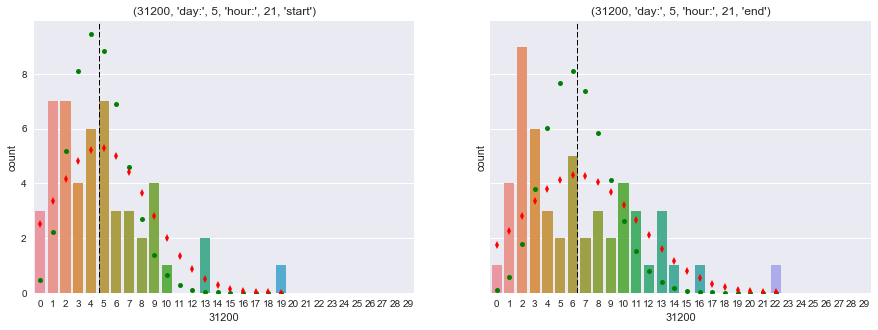

start mean: 4.764705882352941
end mean: 5.333333333333333


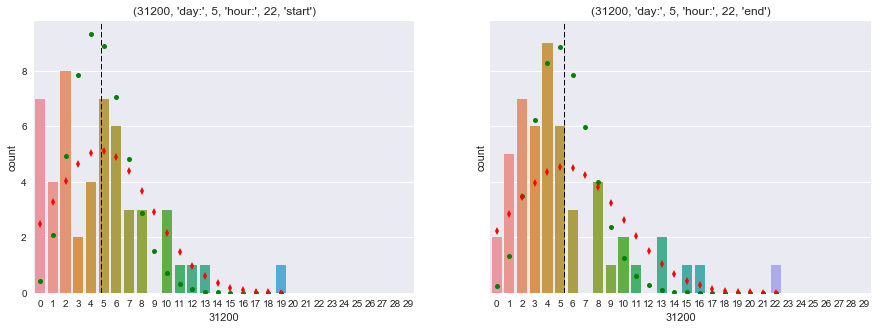

start mean: 3.9313725490196076
end mean: 4.098039215686274


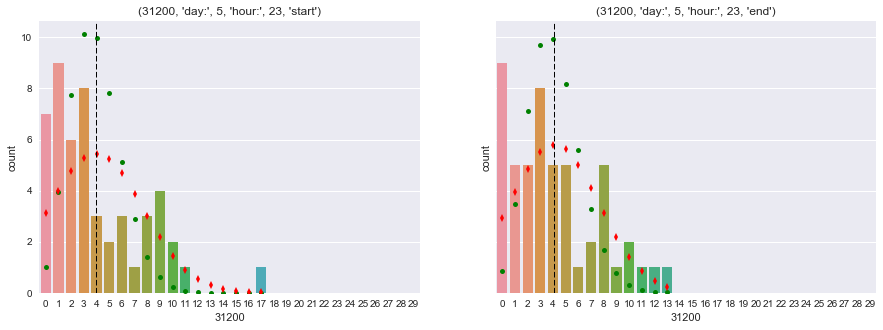

start mean: 3.2941176470588234
end mean: 3.0784313725490198


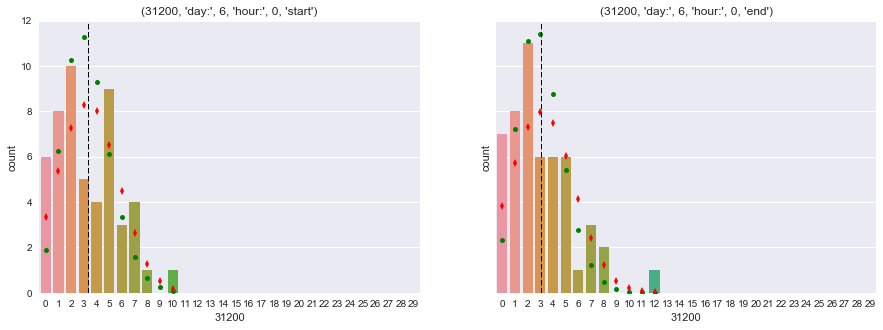

start mean: 3.196078431372549
end mean: 2.156862745098039


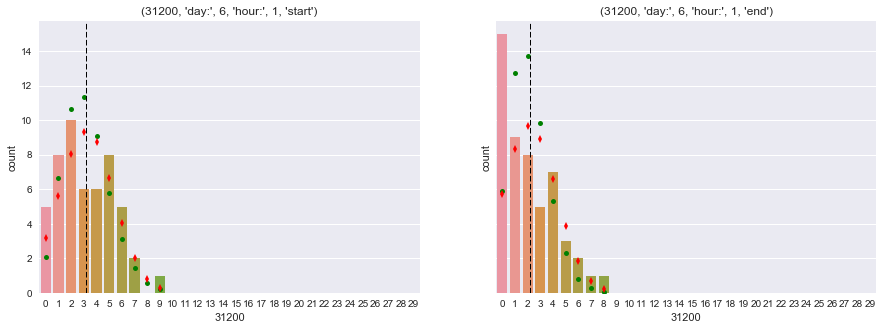

start mean: 2.72
end mean: 1.96


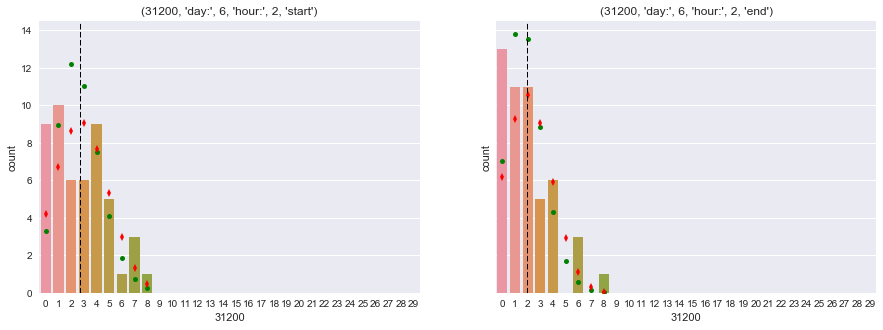

start mean: 1.588235294117647
end mean: 1.0392156862745099


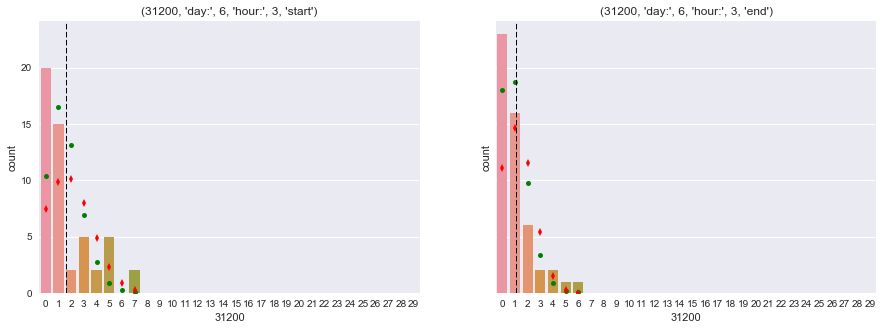

start mean: 0.22448979591836735
end mean: 0.2


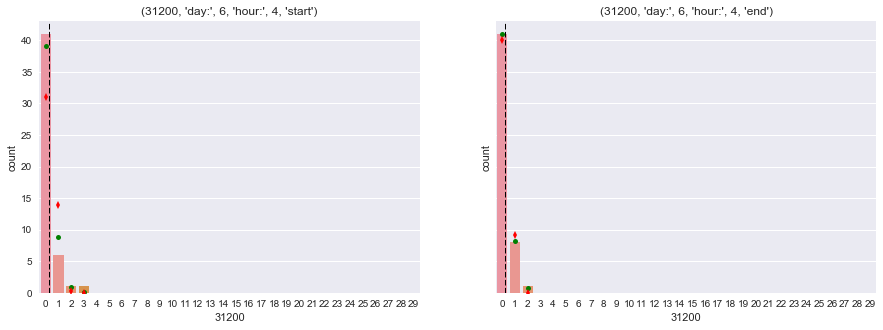

start mean: 0.15555555555555556
end mean: 0.3111111111111111


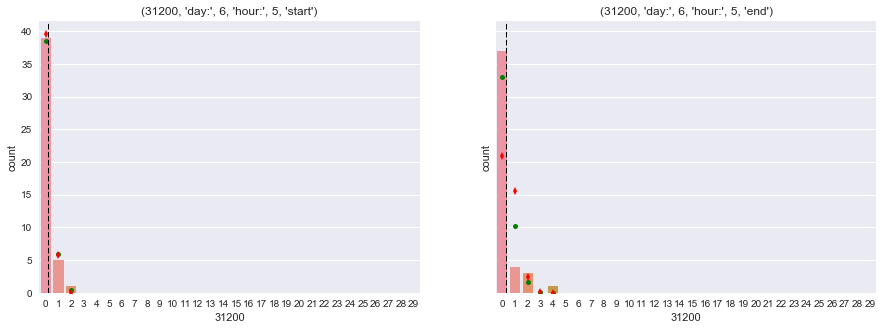

start mean: 0.18
end mean: 0.1568627450980392


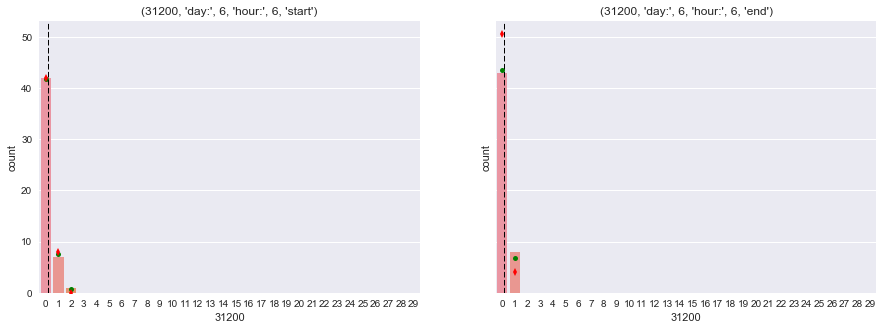

start mean: 0.6923076923076923
end mean: 0.9215686274509803


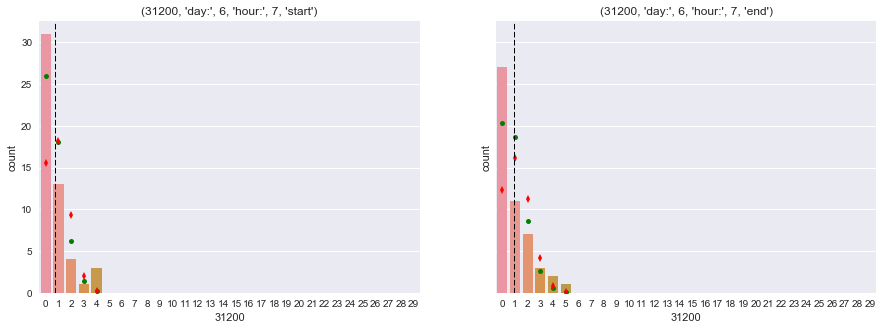

start mean: 1.9615384615384615
end mean: 3.7115384615384617


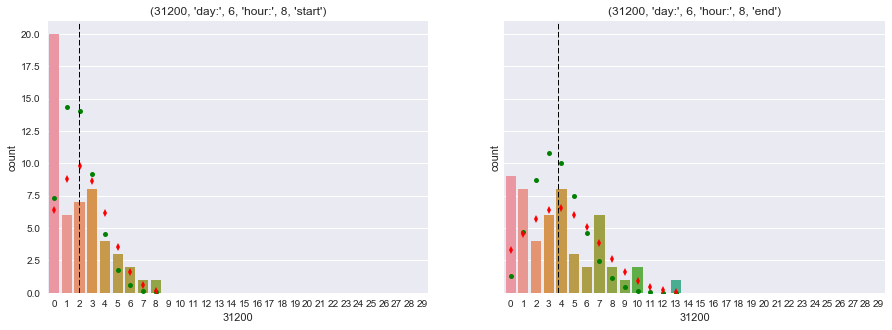

start mean: 5.134615384615385
end mean: 9.346153846153847


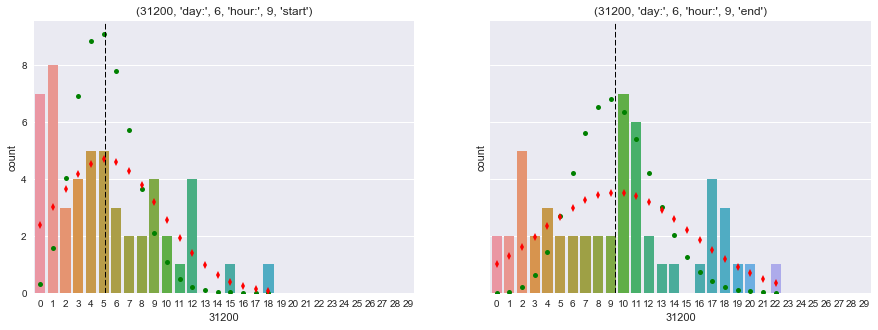

start mean: 10.48076923076923
end mean: 14.75


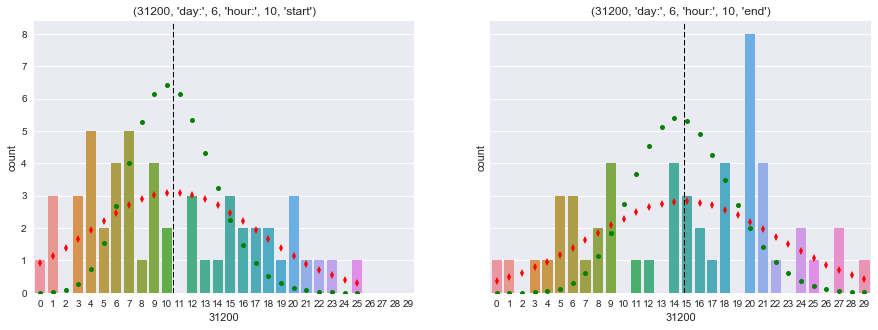

start mean: 12.346153846153847
end mean: 15.173076923076923


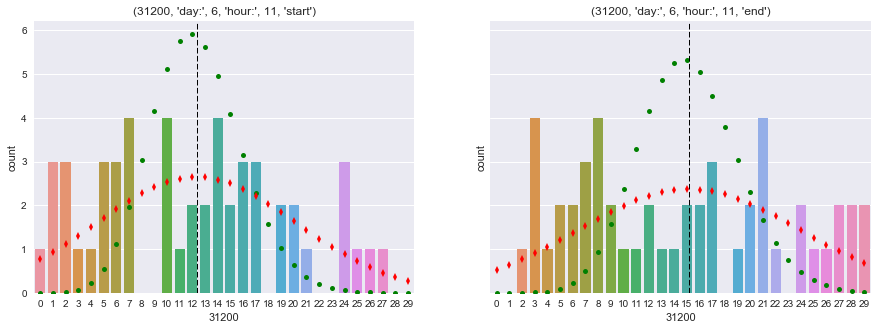

start mean: 17.134615384615383
end mean: 15.846153846153847


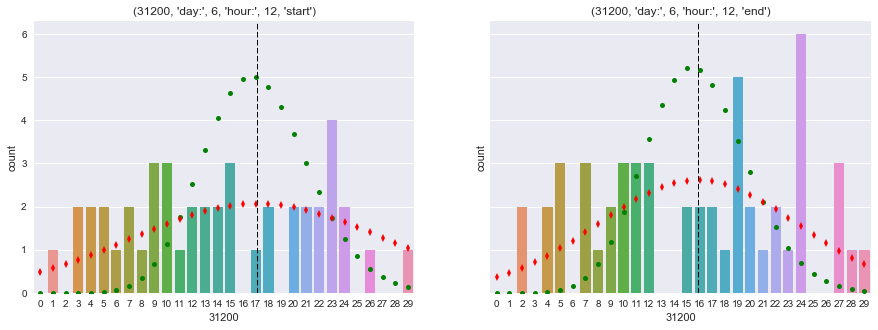

start mean: 13.25
end mean: 13.884615384615385


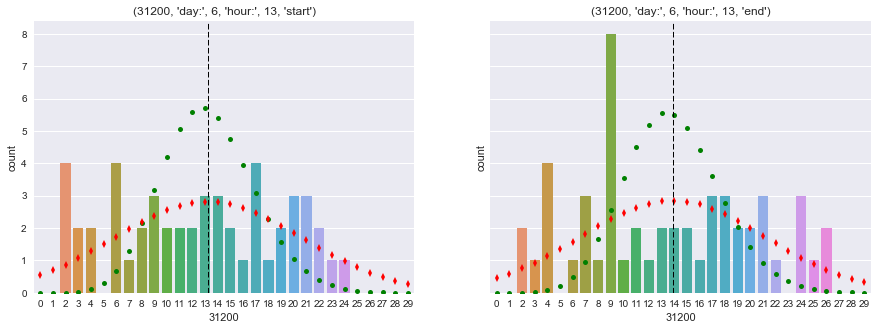

start mean: 11.25
end mean: 12.25


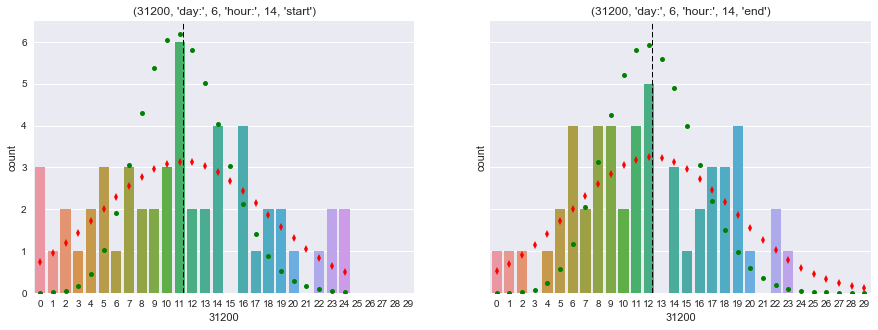

start mean: 11.192307692307692
end mean: 12.076923076923077


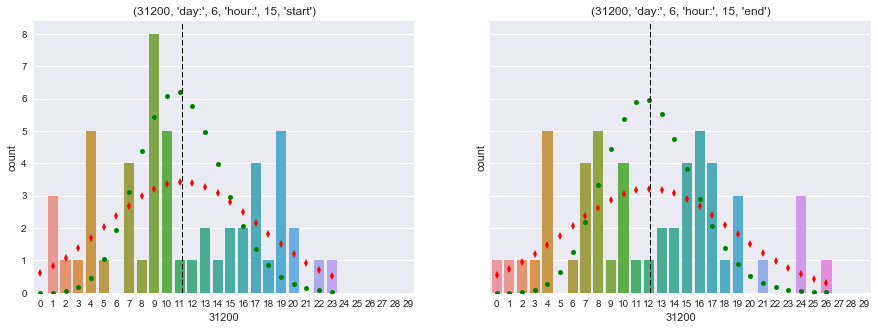

start mean: 10.807692307692308
end mean: 12.48076923076923


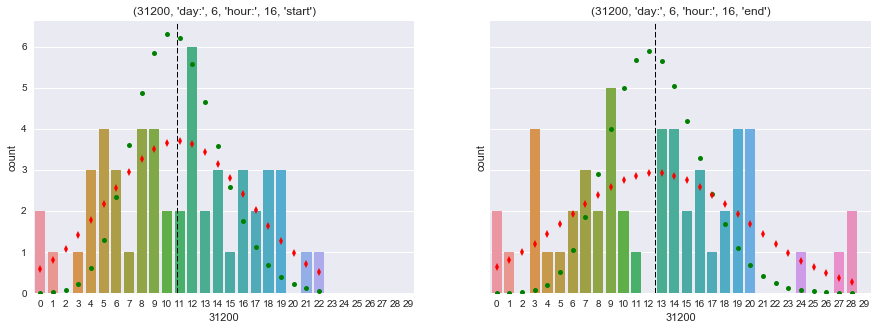

start mean: 9.5
end mean: 11.201923076923077


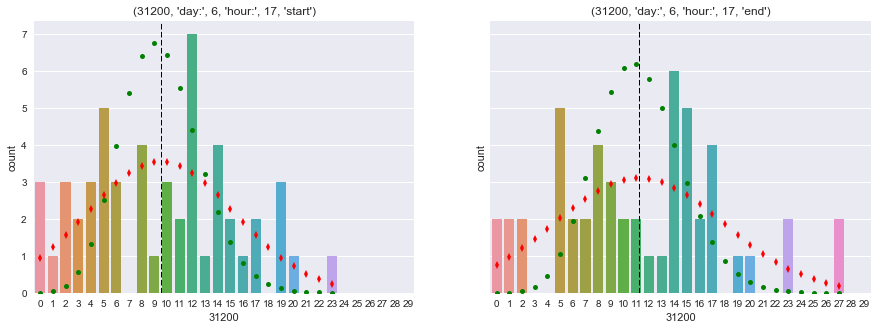

start mean: 7.865384615384615
end mean: 11.211538461538462


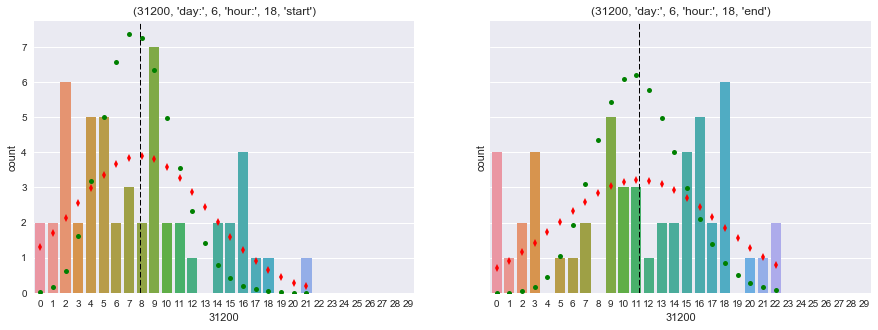

start mean: 7.884615384615385
end mean: 8.634615384615385


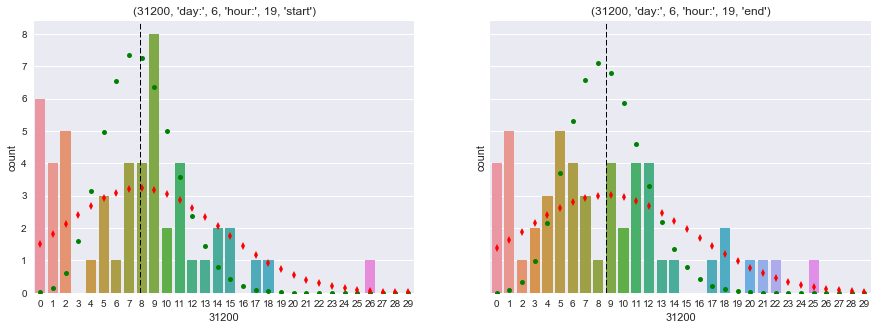

start mean: 5.6923076923076925
end mean: 7.019230769230769


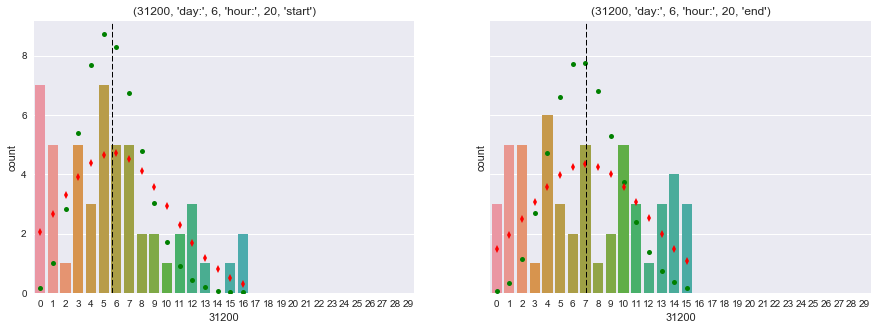

start mean: 5.288461538461538
end mean: 5.115384615384615


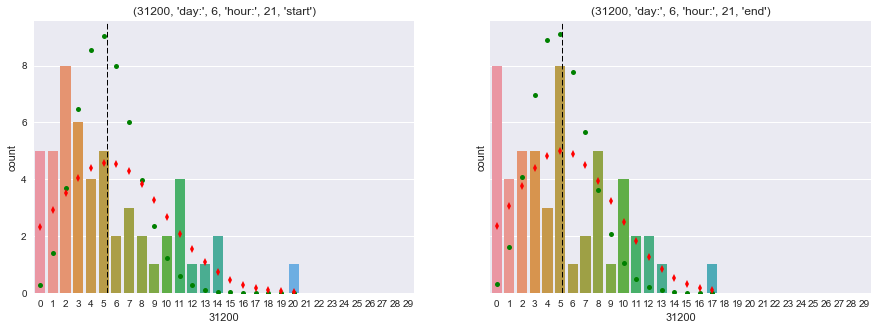

start mean: 3.6153846153846154
end mean: 3.7115384615384617


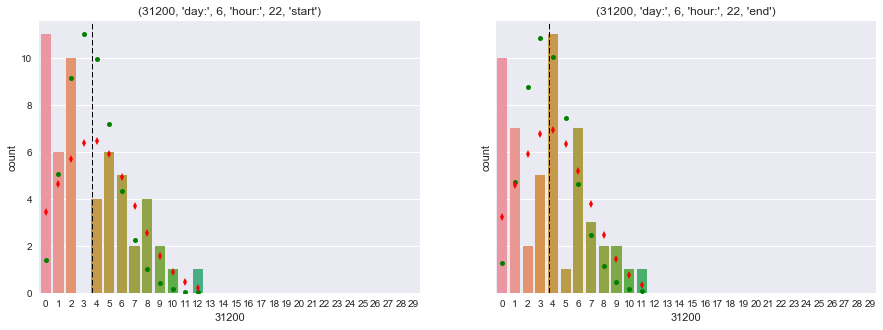

start mean: 2.5961538461538463
end mean: 2.0576923076923075


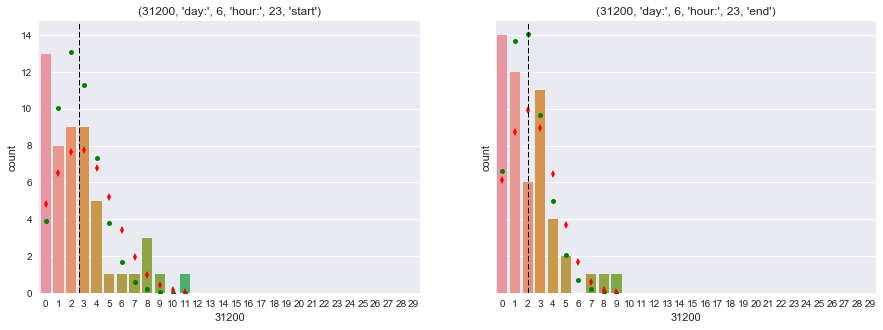

In [27]:
# histograms per site/day of week/hour of day

for site in sample_sites: 
    group_site_start_day = df_hourly_start[[site,'hourofday','dayofweek','weekofyear']].fillna(0).groupby('dayofweek')
    group_site_end_day = df_hourly_end[[site,'hourofday','dayofweek','weekofyear']].fillna(0).groupby('dayofweek')
    print(site)
    for idx,group in group_site_start_day:
        group_end = group_site_end_day.get_group(idx)
        
        df_start_site_day = group.pivot_table(values=site,index=['weekofyear','hourofday'],fill_value=0).reset_index()
        df_end_site_day = group_end.pivot_table(values=site,index=['weekofyear','hourofday'],fill_value=0).reset_index()

        for idx2,group2 in df_start_site_day.groupby(['hourofday']):
            group2_end = df_end_site_day.groupby(['hourofday']).get_group(idx2)
            f, (ax1,ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,5))
            bin_count_start = np.max(df_start_site_day[site]) - np.min(df_start_site_day[site]) + 1
            bin_count_end = np.max(df_end_site_day[site]) - np.min(df_end_site_day[site]) + 1
            
            print('start mean:', group2[site].mean())
            print('end mean:', group2_end[site].mean())            
            sns.countplot(x=site,data=group2,order=np.arange(0,30),ax=ax1)
            
            #sns.distplot(group2[site],bins=bin_count_start,kde=False,ax=ax1)
            
            k = np.arange(0,np.max(group2[site].values)+1)
            
            ax1.plot(k, poisson.pmf(k, group2[site].mean())*len(group2[site]), 'go', markersize=5)
            ax1.plot(k, norm.pdf(k,group2[site].mean(),group2[site].std())*len(group2[site]),'rd',markersize=5)
            ax1.axvline(group2[site].mean(), color='k', linestyle='dashed', linewidth=1)
            ax1.set_title((site,'day:',idx,'hour:',idx2,'start'))

            k = np.arange(0,np.max(group2_end[site].values)+1)
            sns.countplot(x=site,data=group2_end,order=np.arange(0,30),ax=ax2)
            #sns.distplot(group2_end[site],bins=bin_count_end,kde=False,ax=ax2)
            ax2.plot(k, poisson.pmf(k, group2_end[site].mean())*len(group2_end[site]), 'go', markersize=5)
            ax2.plot(k, norm.pdf(k,group2_end[site].mean(),group2_end[site].std())*len(group2_end[site]),'rd',markersize=5)
            #ax2.plot(k, norm.pdf(k,k.mean(),k.mean()))
            ax2.axvline(group2_end[site].mean(), color='k', linestyle='dashed', linewidth=1)
            ax2.set_title((site,'day:',idx,'hour:',idx2,'end'))

            plt.show()